In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from util_functions import list_subjects, load_file, starting_run, finished_run

### Notebook Parameters

In [2]:
full_df = load_file('data_meta_pickled/data_raw_pickled_df.pickle')
stim_dict = {}
prev_stim_data = []
stim_length_data=[]

### Notebook Functions

In [3]:
def get_average_neuron_values(subject):
    subject_df = load_file('data_raw_pickled/' + subject + '_CellRespZ.pickle')
    return subject_df.sum(axis=1)/subject_df.shape[1]

In [4]:
def split_stimulus_occurances(timepoints):
    timeseries_labels=[]
    last_value = -2
    last_label_value = -2
    #looping through stimulus timepoints
    for time in timepoints:
        if time != last_value + 1:
            timeseries_labels.append([])
        last_value = time
        timeseries_labels[-1].append(last_value)
    return pd.DataFrame(timeseries_labels)

In [5]:
def find_prior_stimulus(split_stimulus_df, stimulus_progression):
    return split_stimulus_df[0].apply(lambda val: stimulus_progression[val-1])

In [6]:
def transform_df_to_neuron_values(split_stimulus_df, avg_neuron_values):
    return split_stimulus_df.applymap(lambda val: val if math.isnan(val) else avg_neuron_values[int(val)])

In [7]:
def boxplot_data_stim_length(transformed_df, subject, stimulus):
    length_agg = []
    last_val_count = transformed_df.shape[0]
    ret_data = []
    for col in transformed_df.columns:
        dataset = transformed_df[col].dropna()
        if dataset.size < last_val_count:
            length_agg.append([int(col), last_val_count - dataset.size])
            last_val_count = dataset.size
        ret_data.append(list(dataset))
    length_agg.append([transformed_df.shape[1], last_val_count])
    stim_length_data.append({
        'stimulus': stimulus,
        'subject': subject,
        'length_counts': length_agg,
        'data': ret_data
    })

In [8]:
def boxplot_data_prev_stim(transformed_df, stim_list, subject, stimulus):
    transformed_df = transformed_df.dropna(axis='columns')
    if transformed_df.shape[1] > 5:
        transformed_df = transformed_df[[0,1,2,3,4,5]].copy()
    transformed_df['stim'] = stim_list
    groups = transformed_df.groupby('stim')
    ret_data = []
    stimulus_values = []
    for group in groups:
        ret_data.append(list(group[1][0:5].sum(axis=1)))
        stimulus_values.append(group[0])
    prev_stim_data.append({
        'stimulus': stimulus,
        'subject': subject,
        'data': ret_data,
        'labels': stimulus_values
    })

In [9]:
def plot_stim_length_data(subject, stimulus, data, counts):
    print(pd.DataFrame(counts, columns=['Length', 'Count']))
    fig_1, ax_1 = plt.subplots(figsize=(20,5))
    ax_1.set_title('Activity Levels of Neurons at Different Stimulus Timepoints for ' + subject + ' stimulus_' + stimulus)
    ax_1.set_xlabel('Timepoint (Relative to Stimulus Start)')
    ax_1.set_ylabel('Average Neuron Value')
    ax_1.boxplot(data)
    plt.show()

In [10]:
def plot_prev_stim_data(subject, stimulus, data, labels):
    fig_1, ax_1 = plt.subplots(figsize=(20,5))
    ax_1.set_title('Influence of Previous Stimulus on Neuron Activity for ' + subject + ' stimulus_' + stimulus)
    ax_1.set_xlabel('Prior Stimulus Number')
    ax_1.set_ylabel('Average Neuron Value (for up to first 2.5 seconds of stimulus)')
    ax_1.boxplot(data, labels=labels)
    plt.show()

### Main Code Execution

In [11]:
#Populate stim_dict
for subject in list_subjects():
    stim_dict[subject] = {
        'stimulus_keys': load_file('data_raw_pickled/' + subject + '_mat_dict.pickle')['stim_full'][0],
        'average_neuron_values': get_average_neuron_values(subject)
    }

In [12]:
#Analyze stimulus data
for row in full_df.itertuples():
    if row.stimulus != None:
        split_stimulus_df = split_stimulus_occurances(row.timepoints)
        stim_list = find_prior_stimulus(split_stimulus_df, stim_dict[row.subject]['stimulus_keys'])
        transformed_df = transform_df_to_neuron_values(split_stimulus_df, stim_dict[row.subject]['average_neuron_values'])
        boxplot_data_stim_length(transformed_df, row.subject, row.stimulus)
        boxplot_data_prev_stim(transformed_df, stim_list, row.subject, row.stimulus)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Analysis of Similarity Between Activity Levels of Neurons During Stimuli of Different Lengths
In this analysis, we are looking to see if identical stimuli applied for different periods of time have different behaviors in terms of average neuronal activity. If there is a large difference in those time-courses, then there is a possibility that we should treat the initial stimulus and the longer stimulus as two different "stimuli" for the purposes of component creation. If mean neuronal activity remains pretty homogenous across stimuli of different durations, this either means that the stimulus does not change overall neuronal activity levels significantly, or that neuronal activity levels during its application are relatively homogenous. We will assume the latter conditional for the purposes of future analysis.

   Length  Count
0      30     12
1      60      6


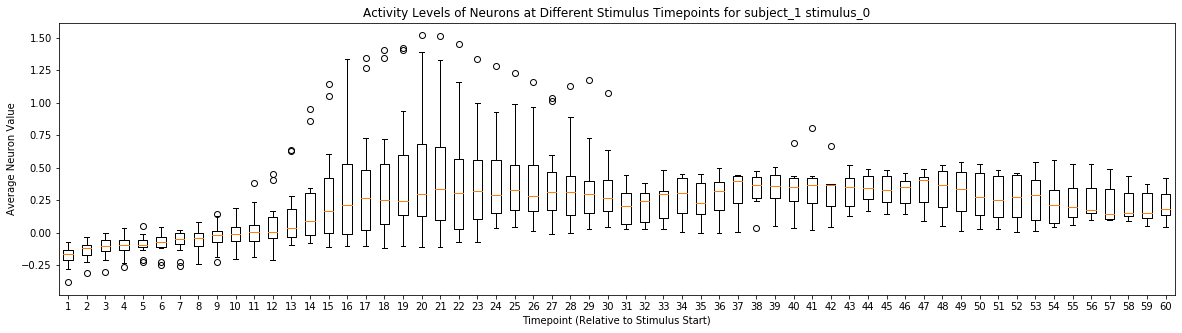

   Length  Count
0      30     12
1      60      6


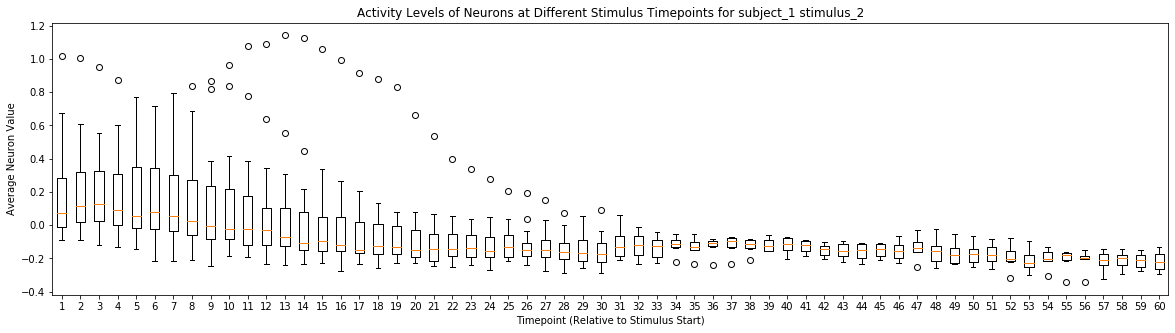

   Length  Count
0      30     12
1      60      6


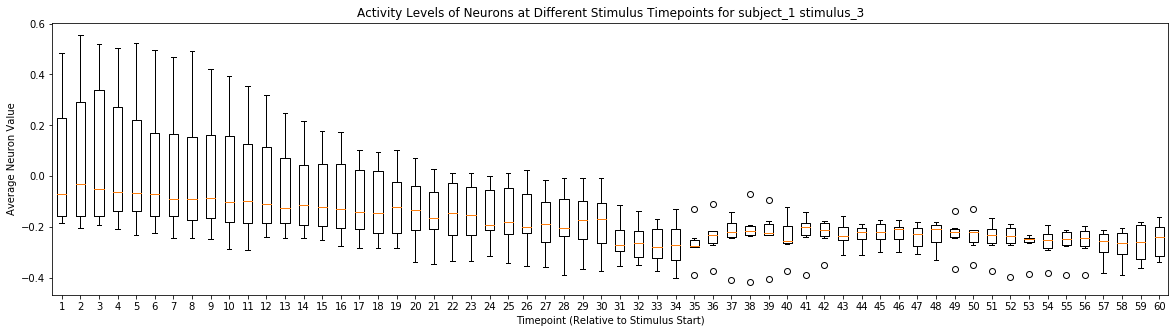

   Length  Count
0      30     12
1      60      6


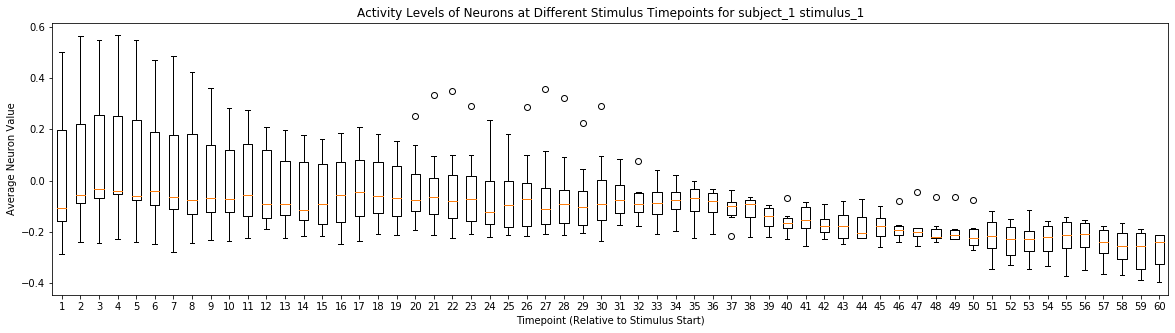

   Length  Count
0       1      1
1      29      7


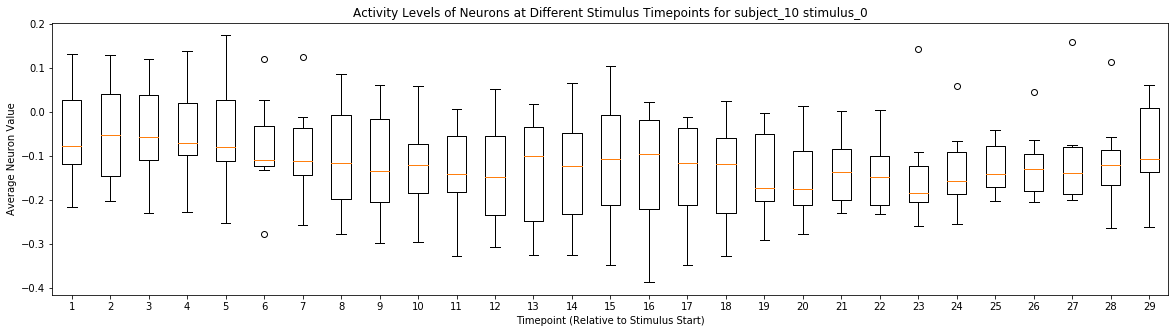

   Length  Count
0      30     10


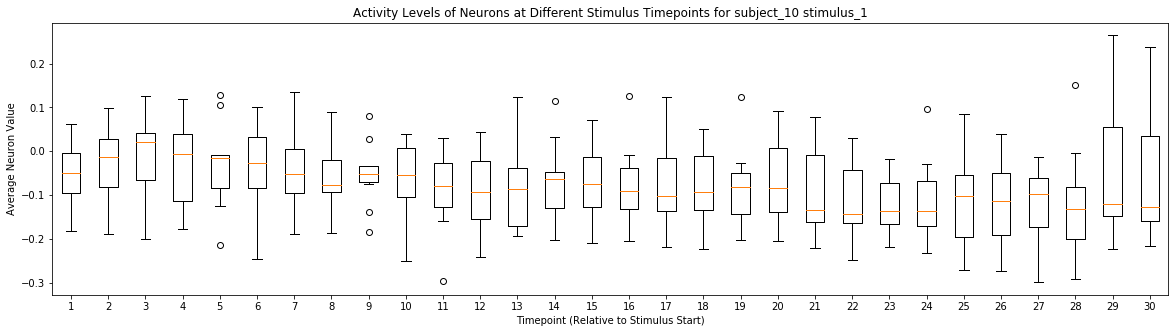

   Length  Count
0      30     10


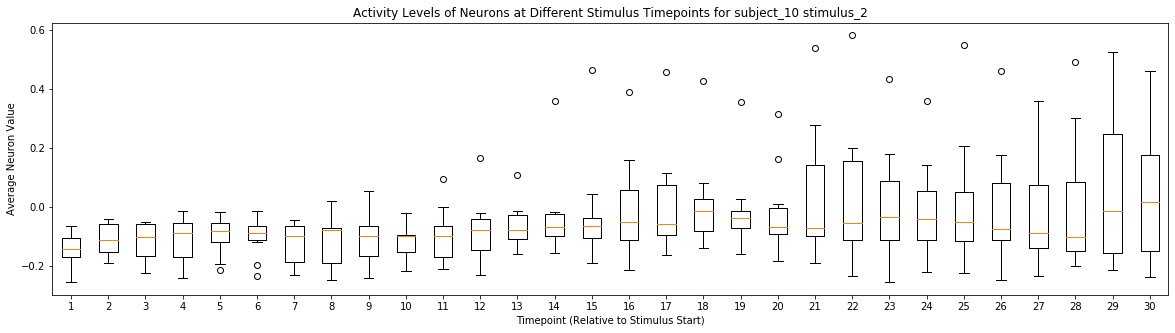

   Length  Count
0       6     10
1      12     10
2      20     10
3      50      8


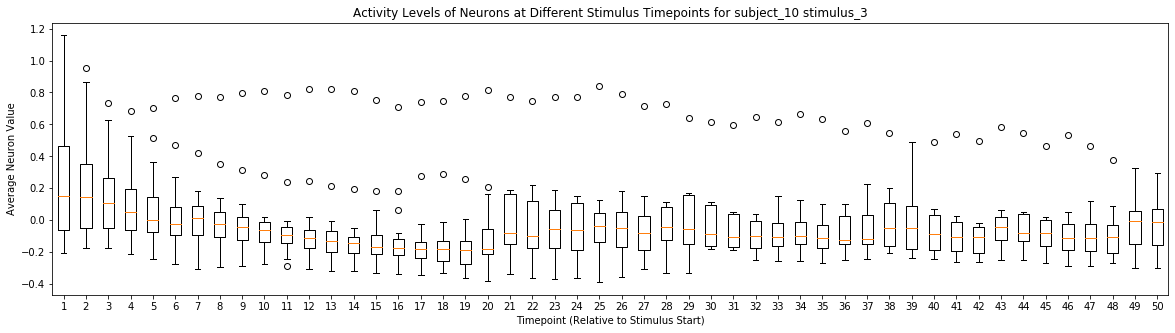

   Length  Count
0     360      2


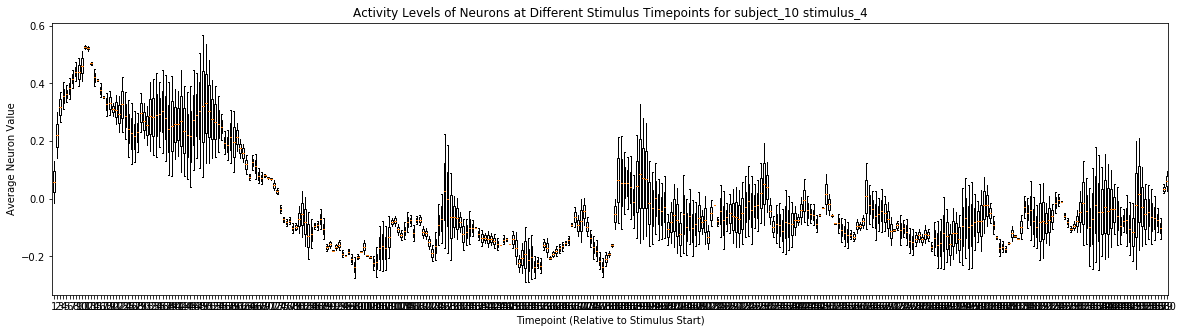

   Length  Count
0       6     15
1      12     15
2      20     18


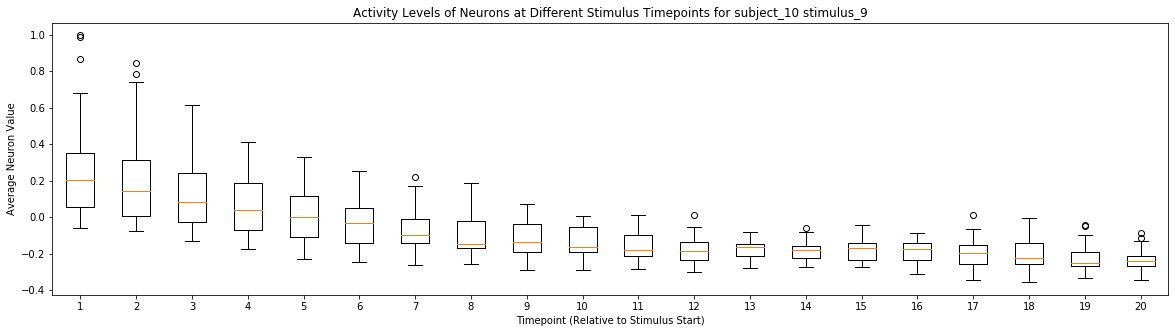

   Length  Count
0      20     11


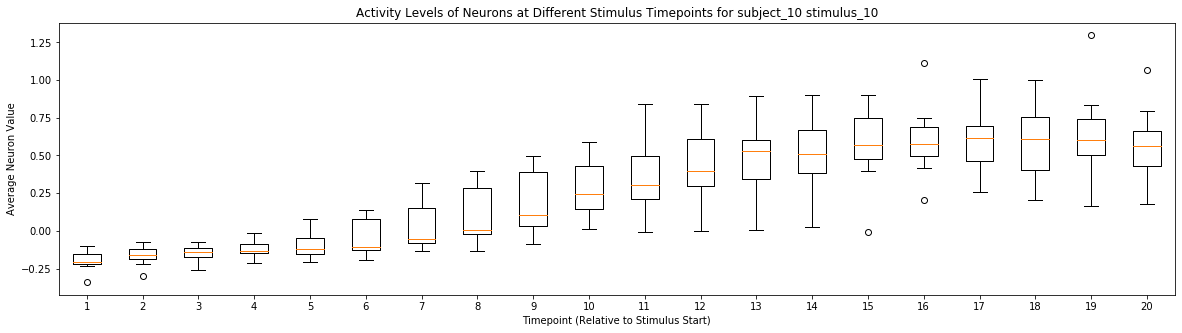

   Length  Count
0      20     11


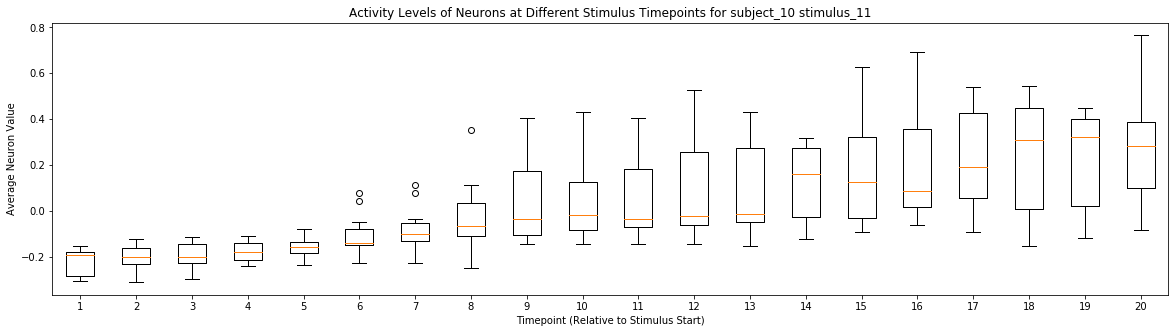

   Length  Count
0      20     11


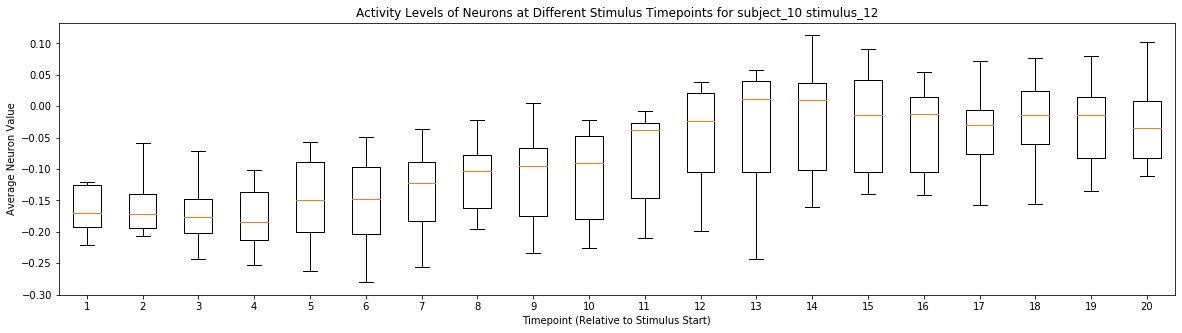

   Length  Count
0      28      1
1      29      6


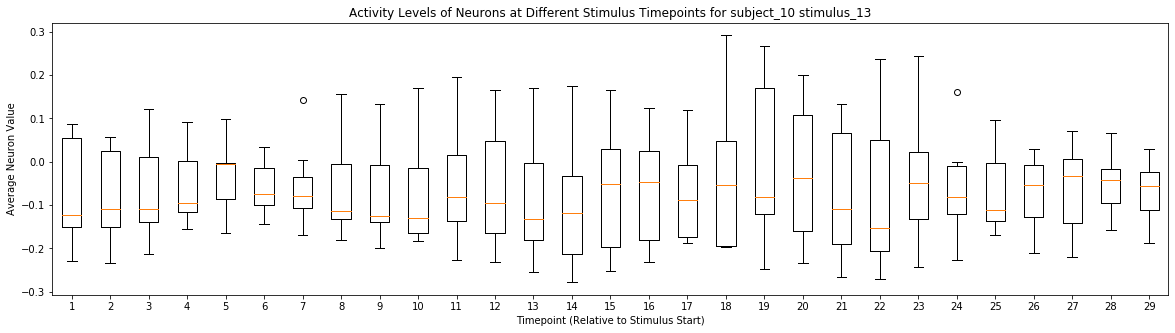

   Length  Count
0      10      4


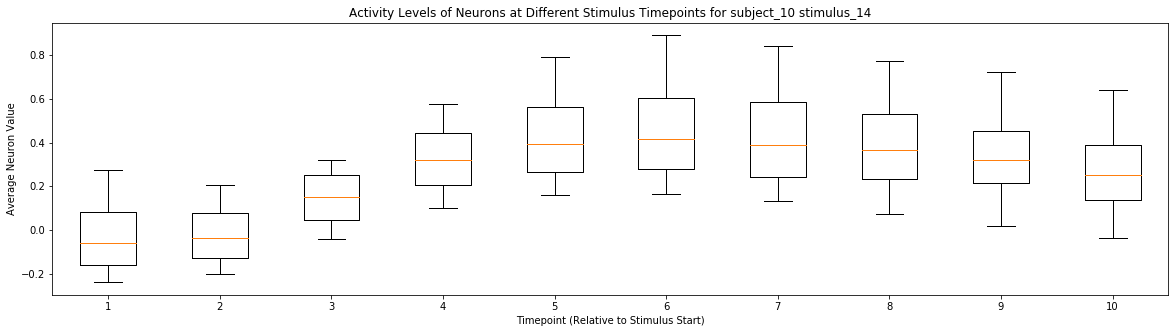

   Length  Count
0      10      4


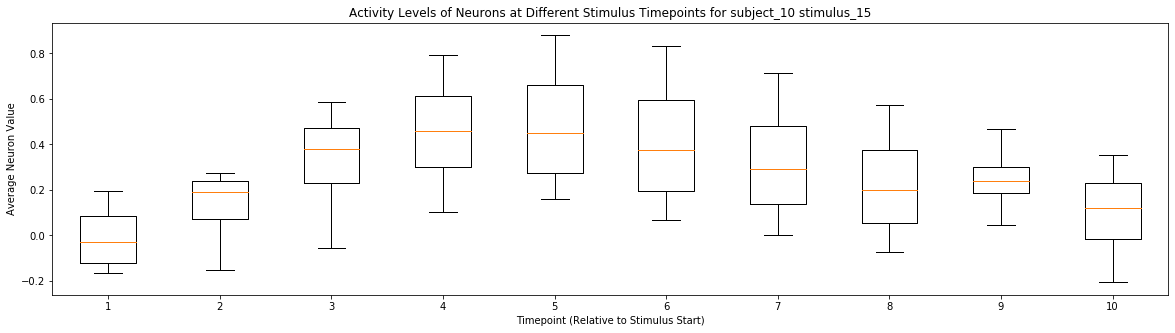

   Length  Count
0       2     25


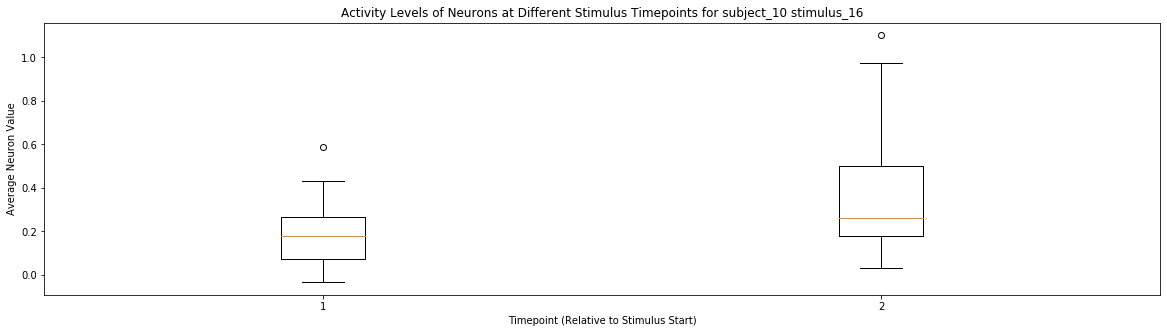

   Length  Count
0      30      5


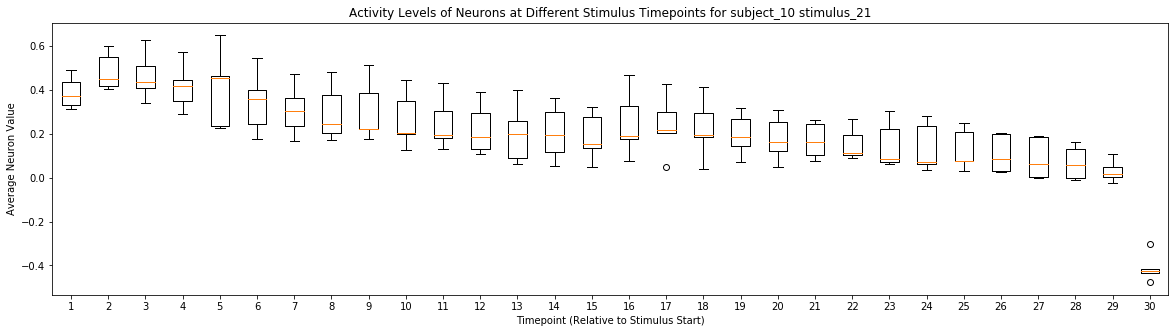

   Length  Count
0      30      5


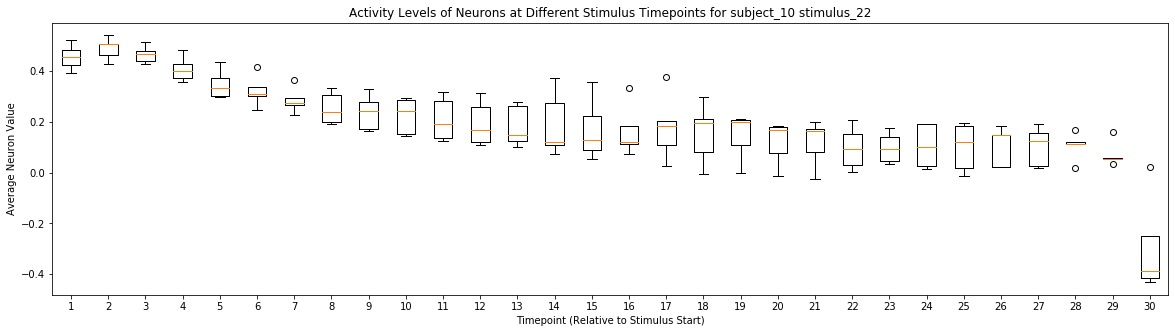

   Length  Count
0      20     10


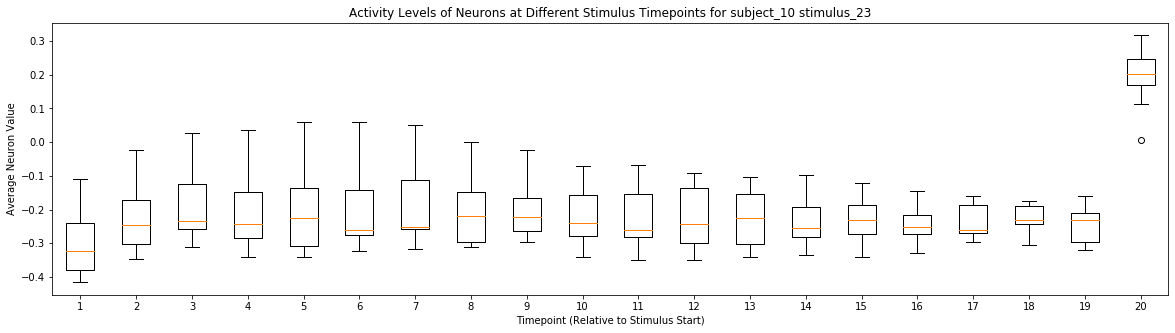

   Length  Count
0      10      1
1      40      1
2      50      9


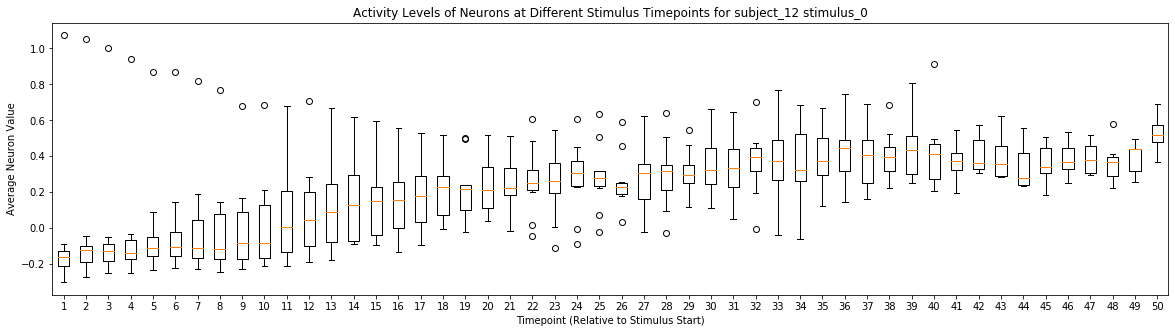

   Length  Count
0      50     16


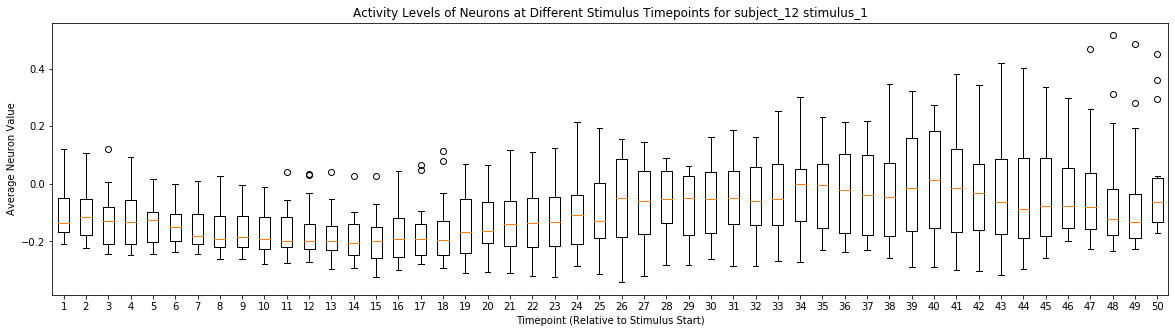

   Length  Count
0      50     16


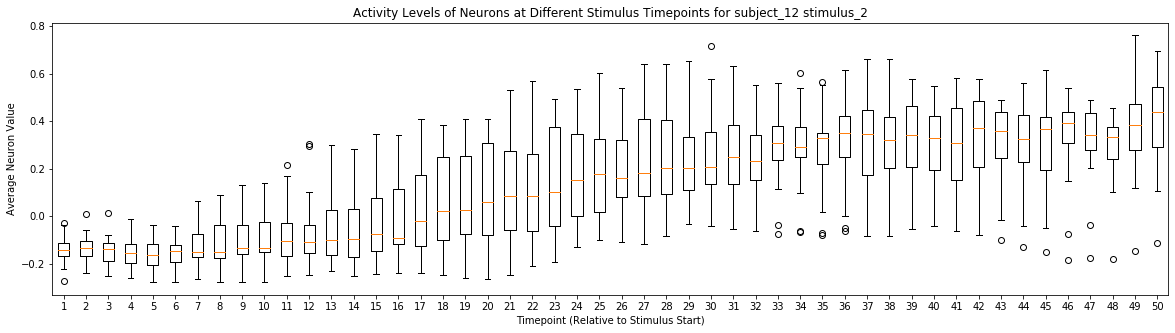

   Length  Count
0      25     42
1      30     40
2      50     10


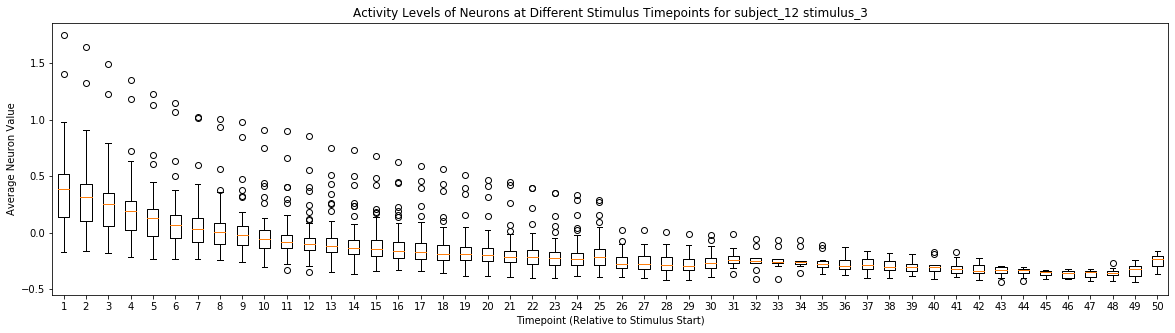

   Length  Count
0      40      1
1     600      1


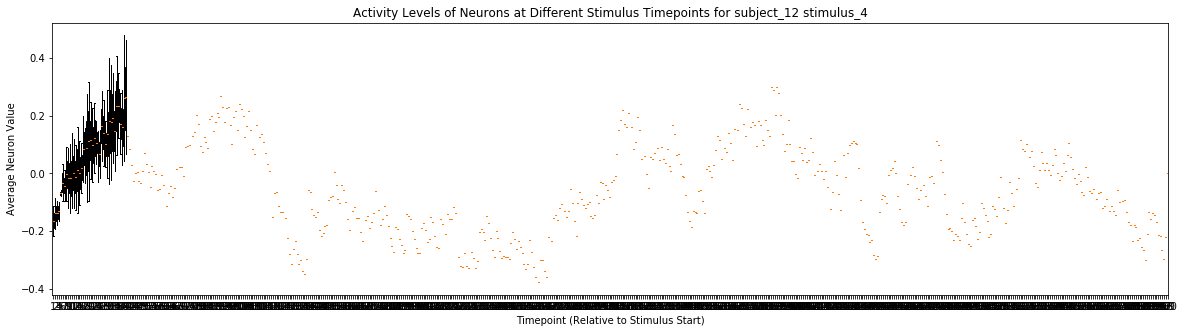

   Length  Count
0      15     10


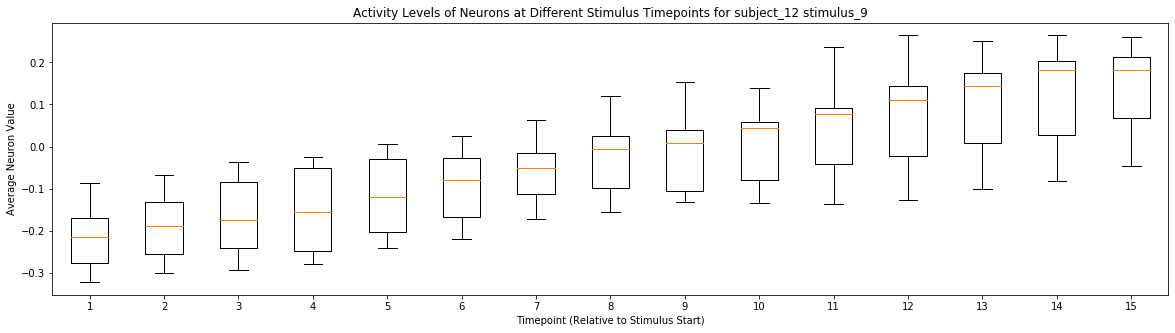

   Length  Count
0      15     10


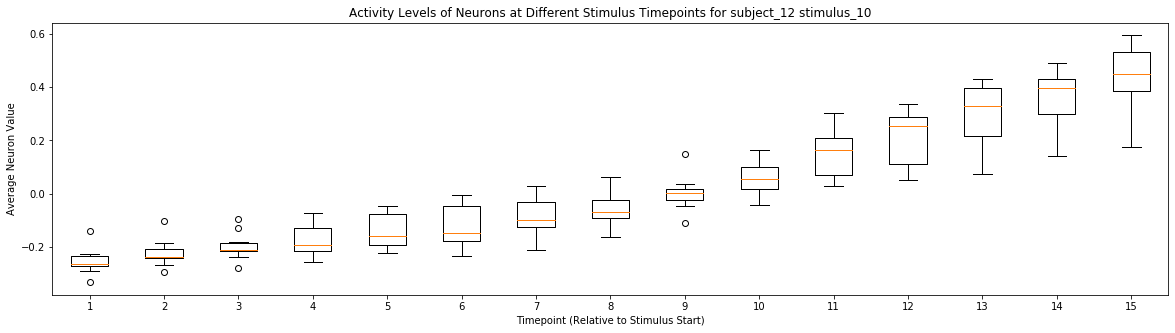

   Length  Count
0      15     10


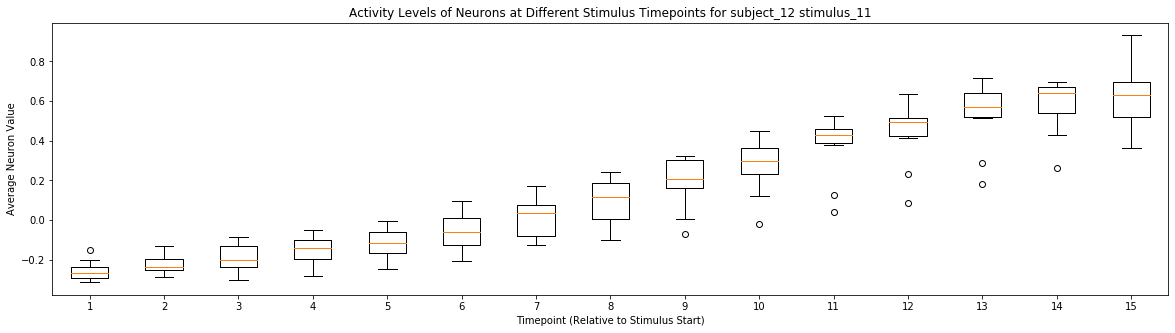

   Length  Count
0      15     10


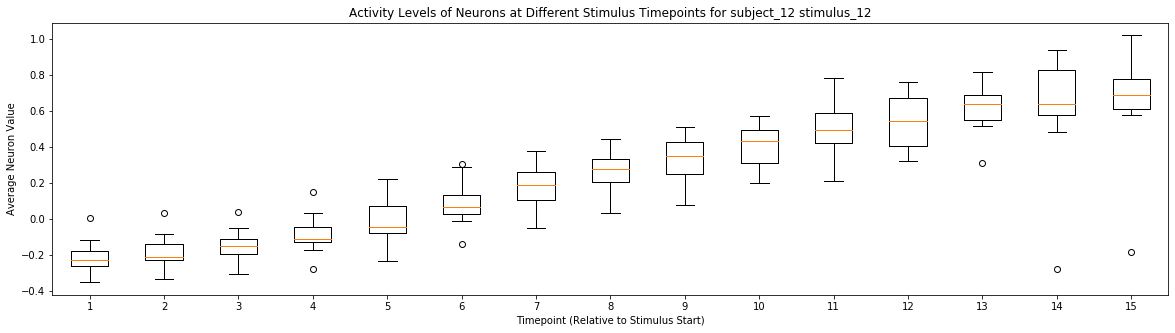

   Length  Count
0       5      5


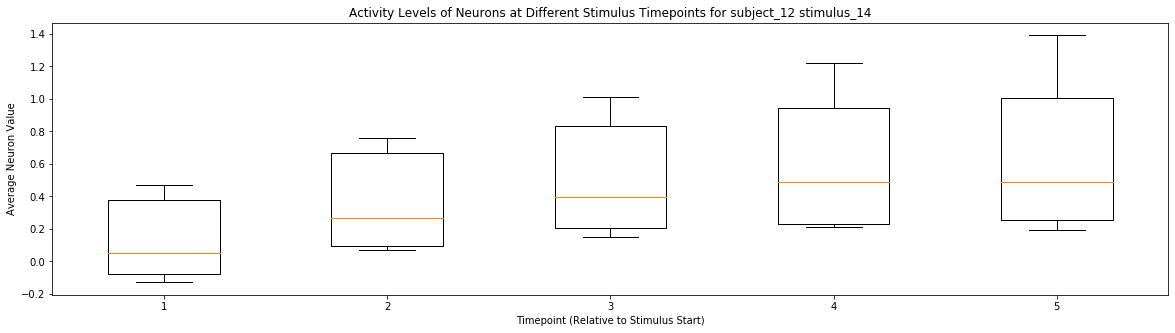

   Length  Count
0       5      5


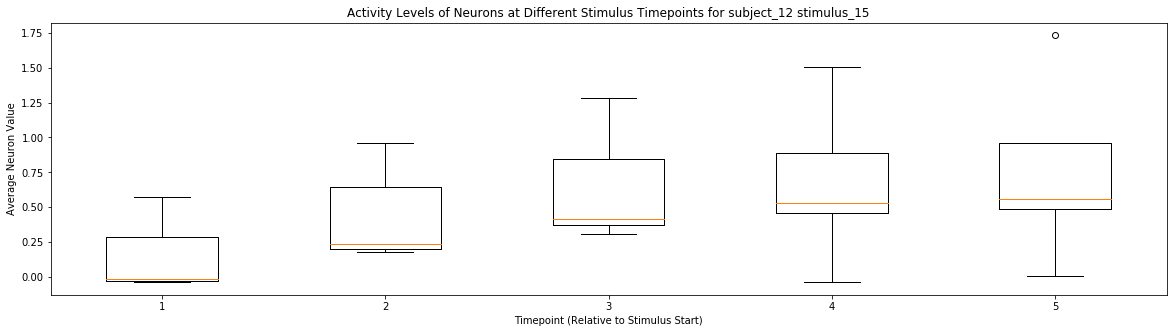

   Length  Count
0      45      6


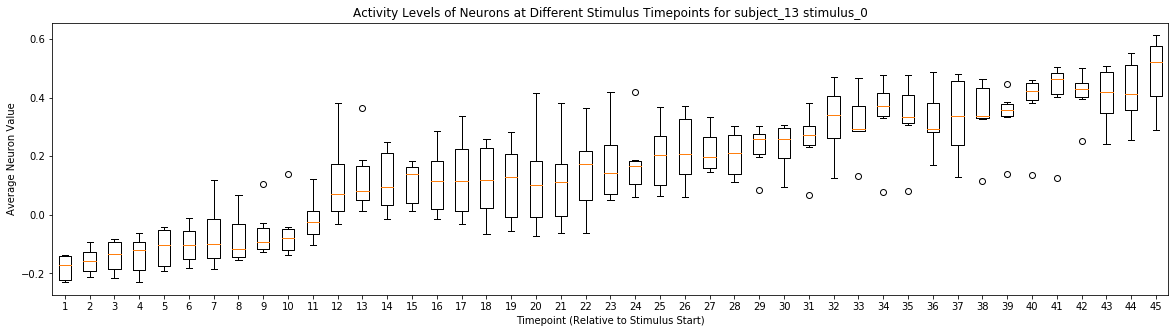

   Length  Count
0      40     11


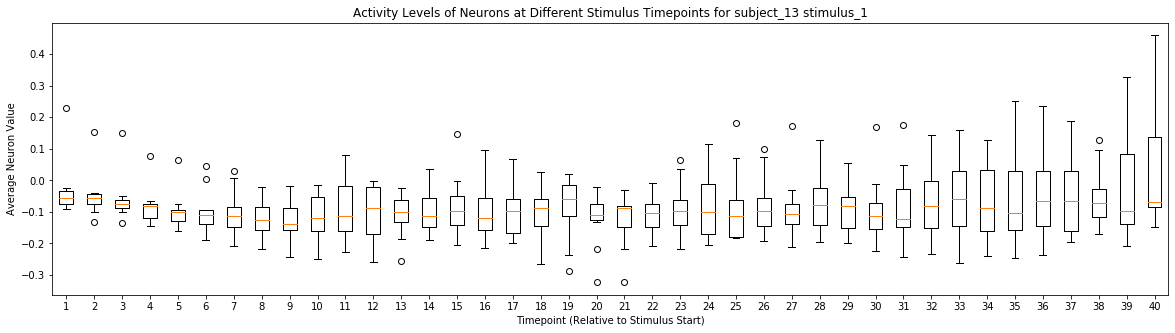

   Length  Count
0      40     11


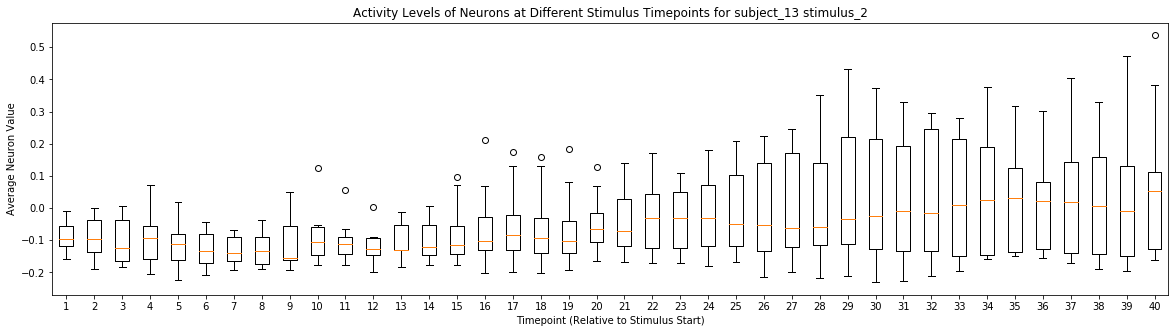

   Length  Count
0       6      1
1      10     21
2      15     39
3      19      1
4      25     40
5      45      6


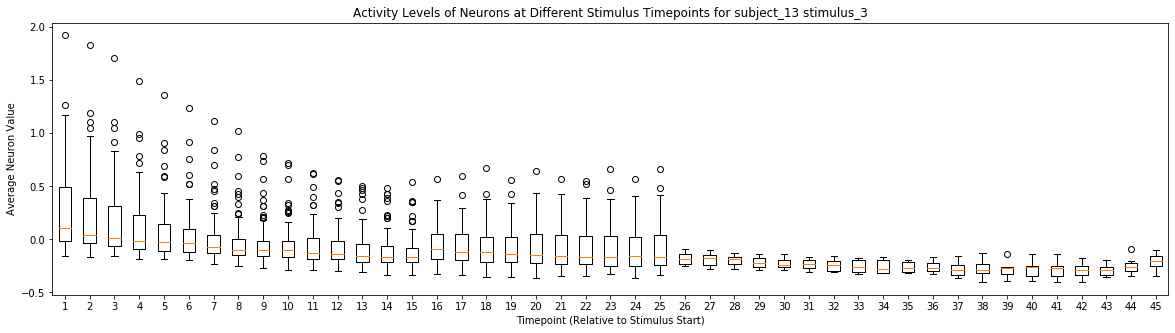

   Length  Count
0     600      2


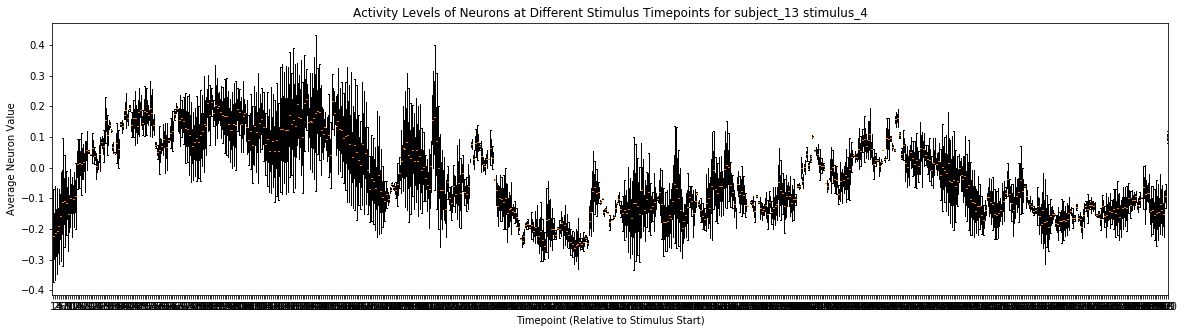

   Length  Count
0       5     10


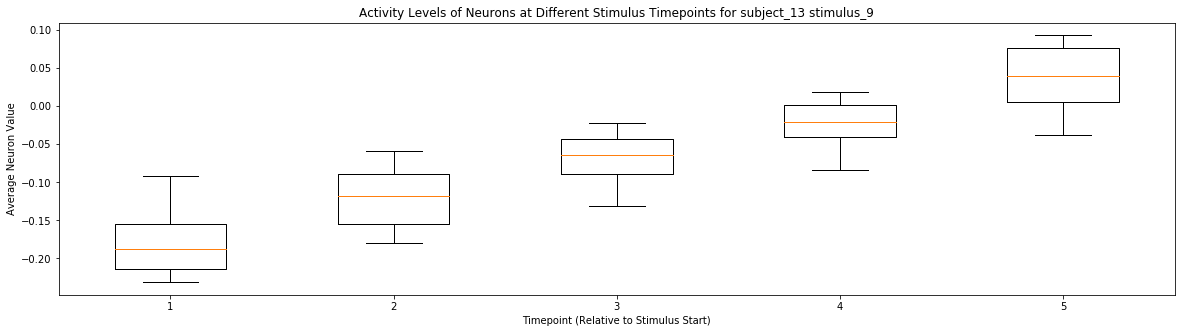

   Length  Count
0       5     10


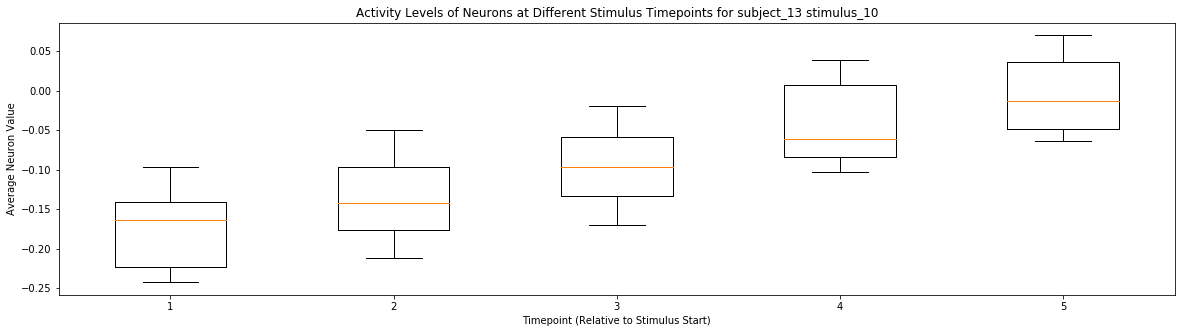

   Length  Count
0       5     10


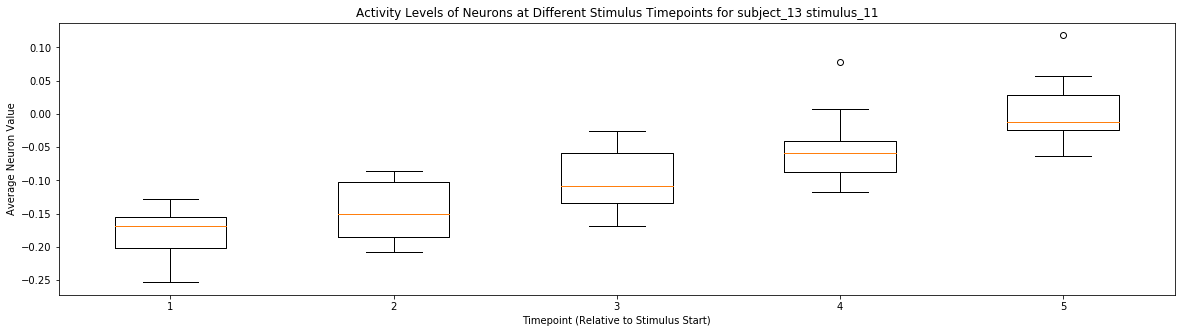

   Length  Count
0       5     10


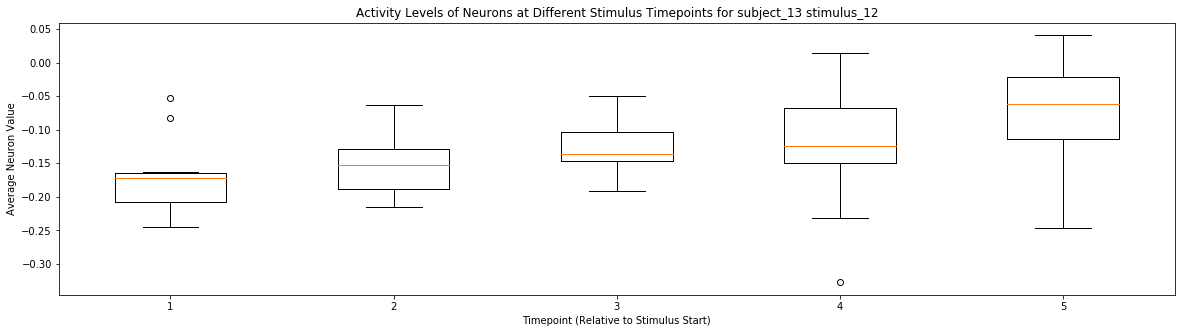

   Length  Count
0       5     20


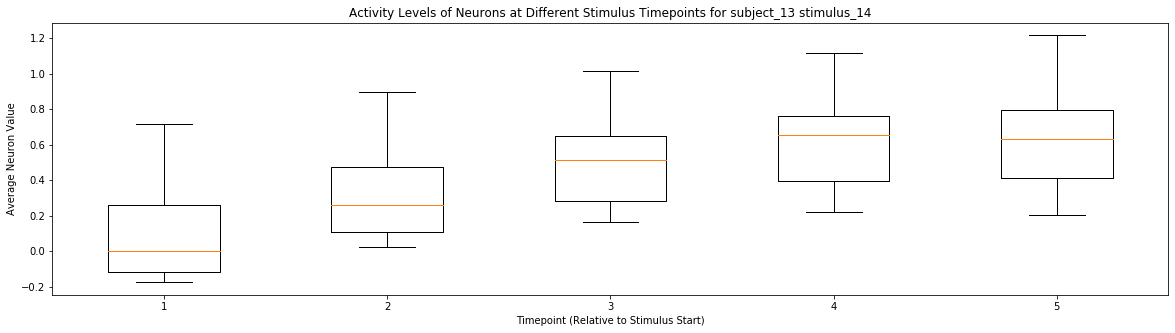

   Length  Count
0       5     20


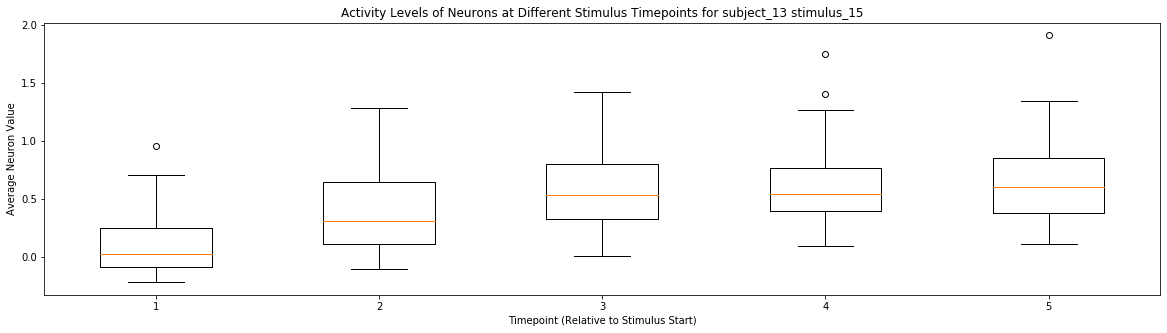

   Length  Count
0       5      1
1      30      1
2      35      4


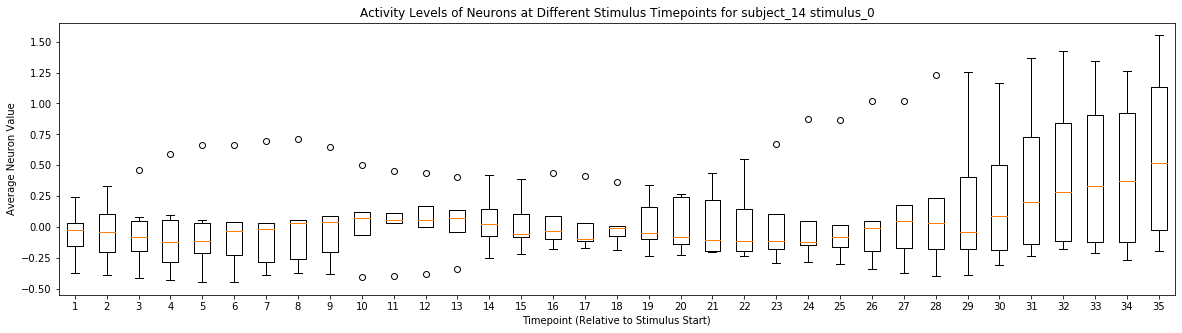

   Length  Count
0      40     16


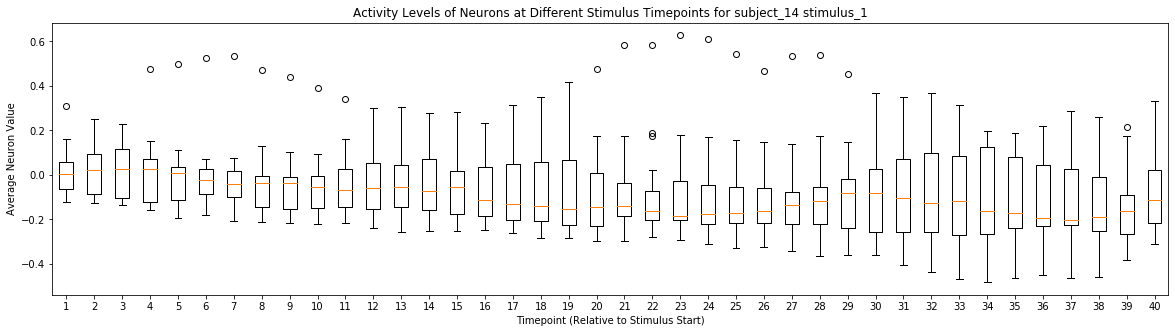

   Length  Count
0      40     16


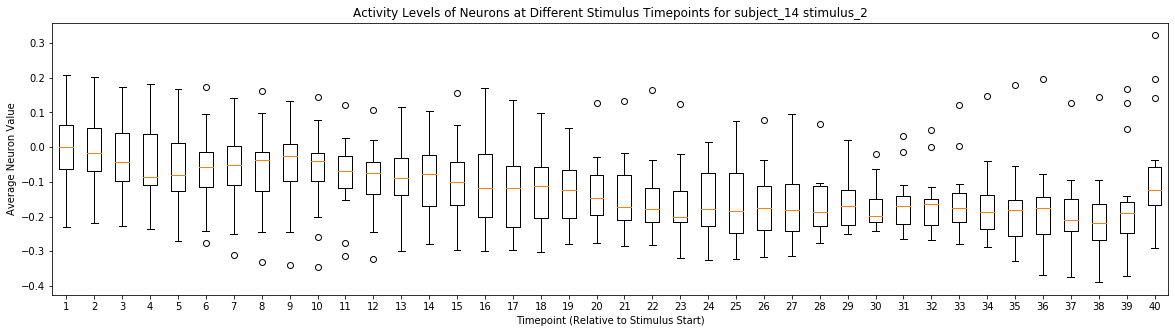

   Length  Count
0      10     32
1      25     16
2      35     29


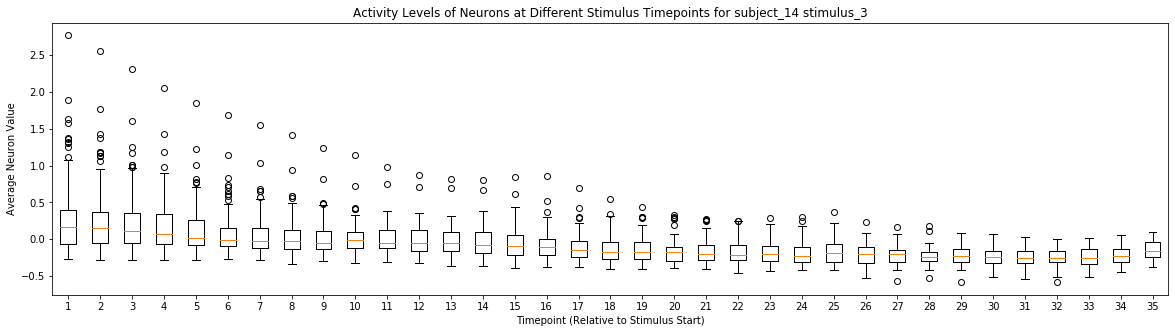

   Length  Count
0     500      1


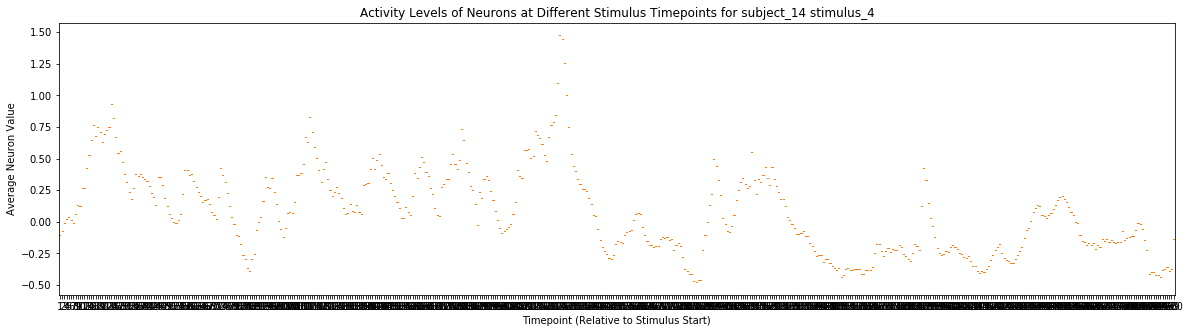

   Length  Count
0       5      6


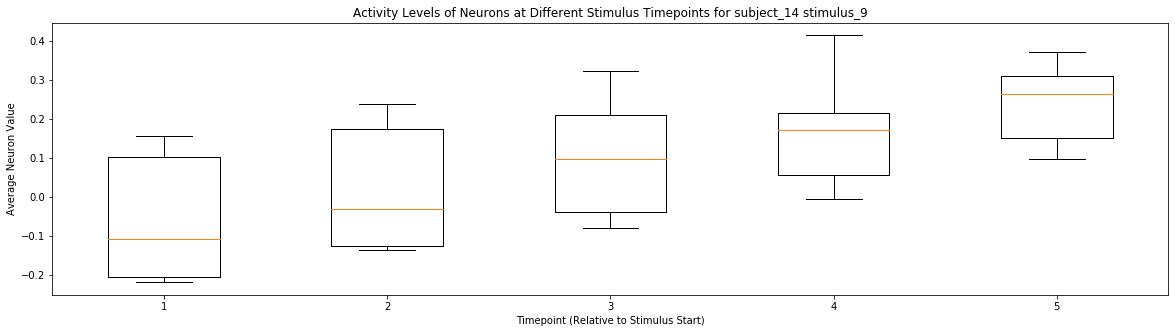

   Length  Count
0       5      6


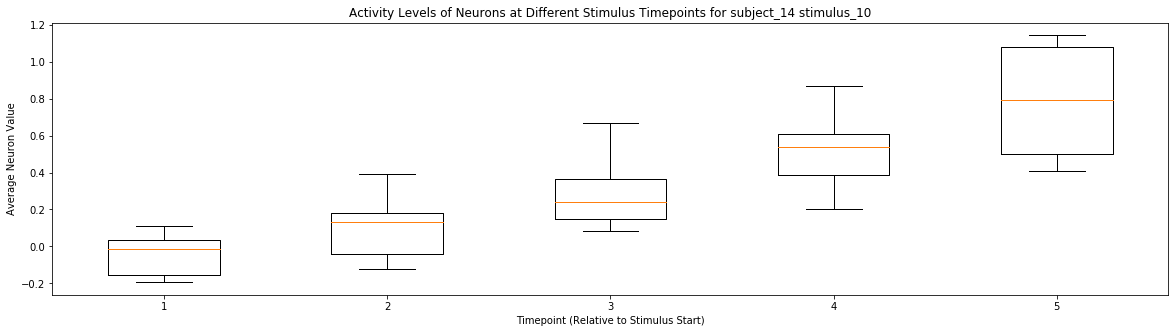

   Length  Count
0       5      6


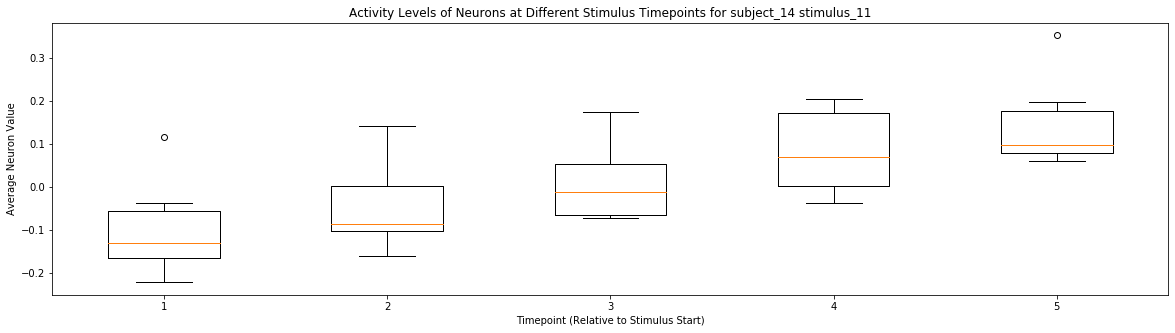

   Length  Count
0       5      6


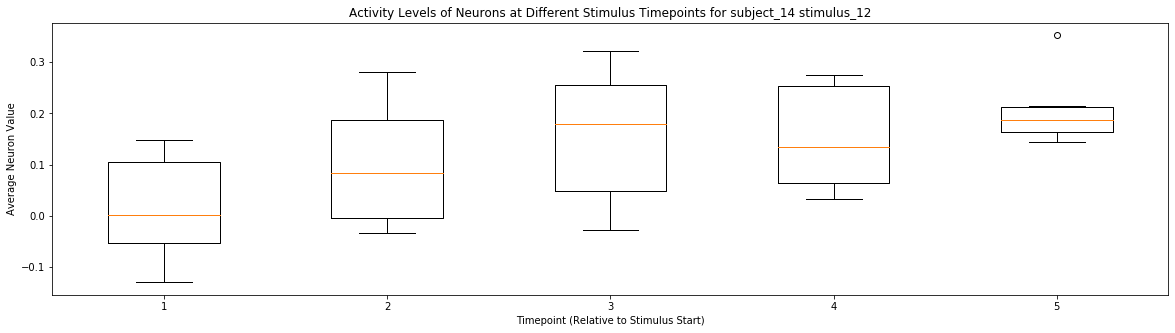

   Length  Count
0       5      8


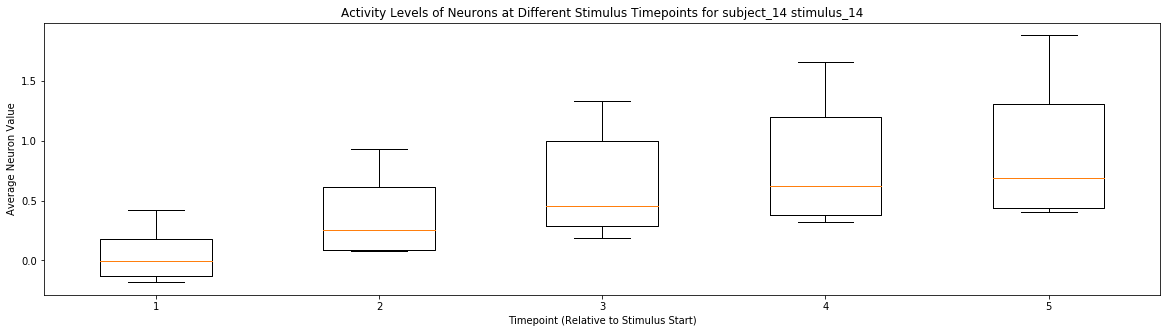

   Length  Count
0       5      8


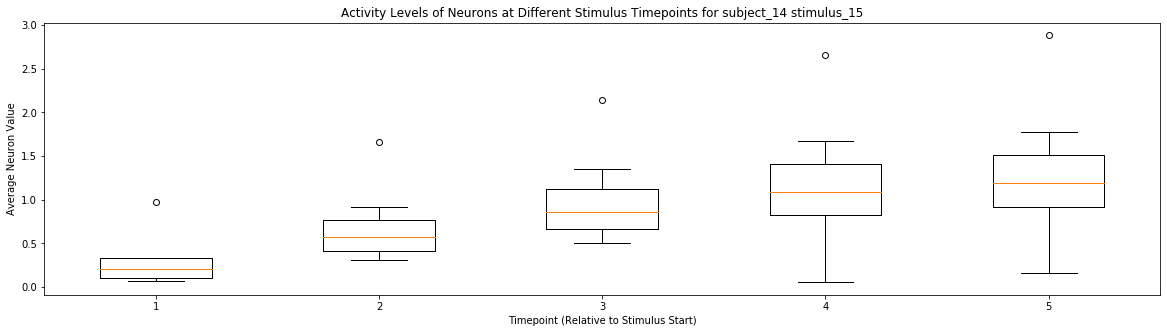

   Length  Count
0      15     22


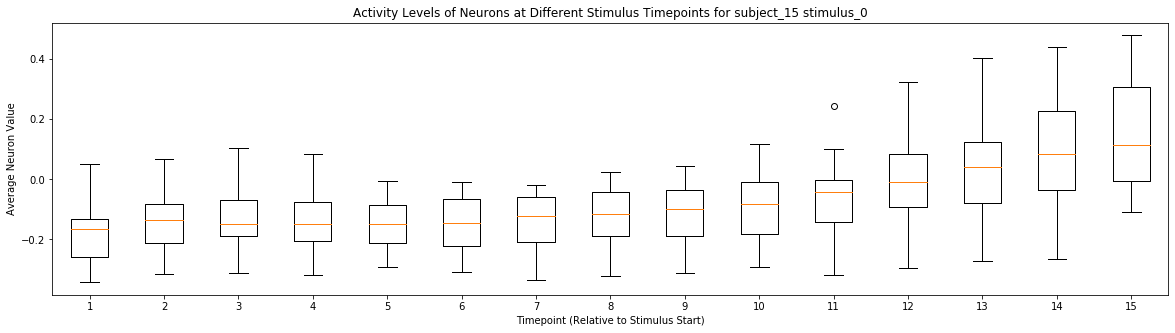

   Length  Count
0      25     29


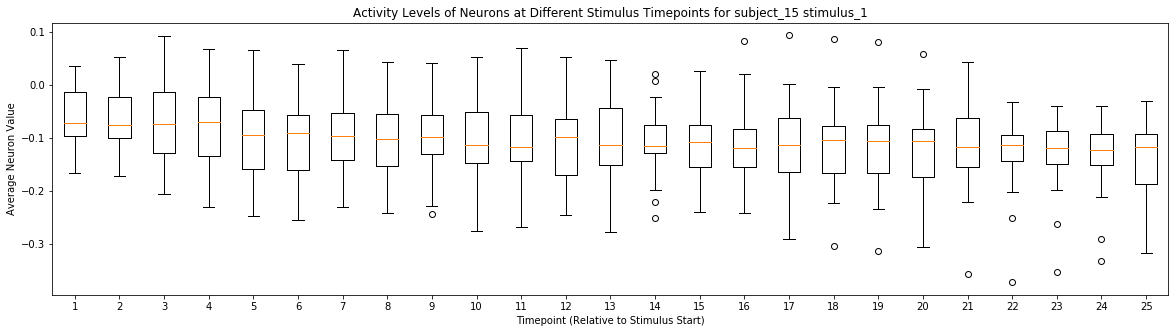

   Length  Count
0      25     29


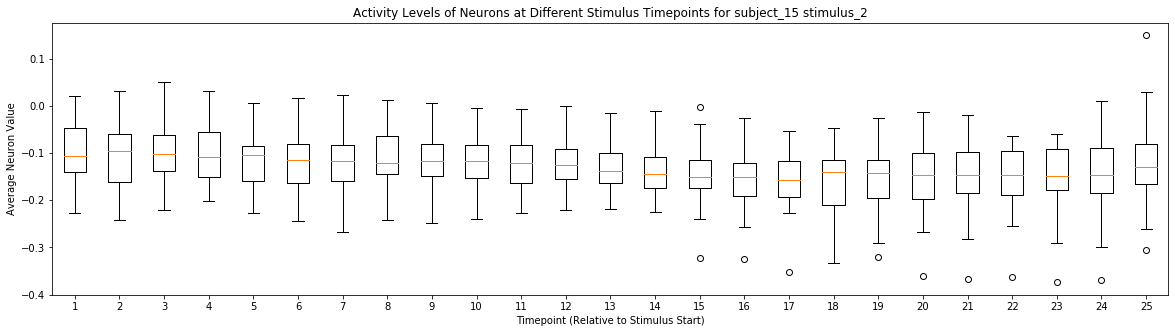

   Length  Count
0       4      1
1       5    120
2       6      1
3      15     22
4      25     20


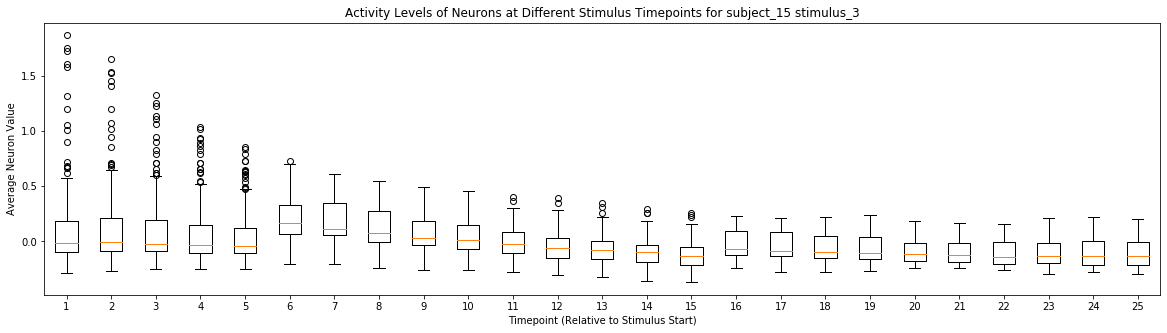

   Length  Count
0     300      2


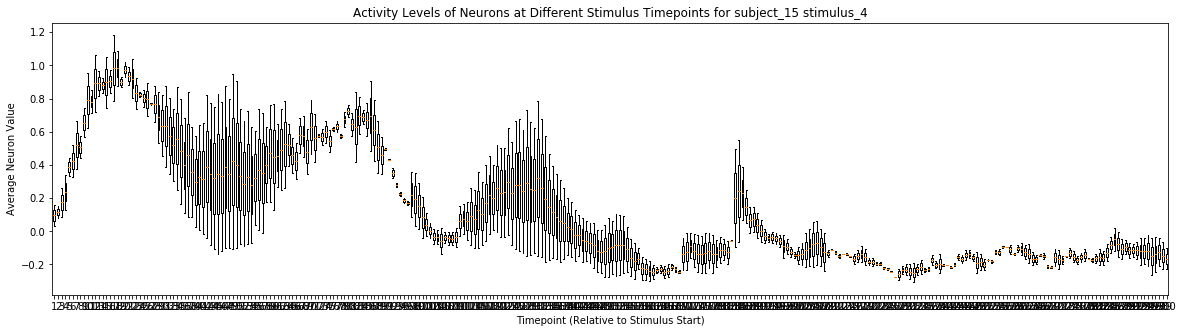

   Length  Count
0      15     16


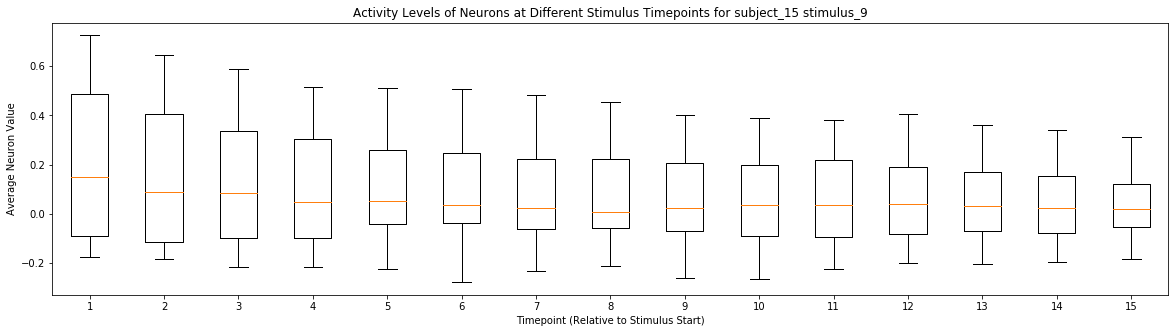

   Length  Count
0      15     16


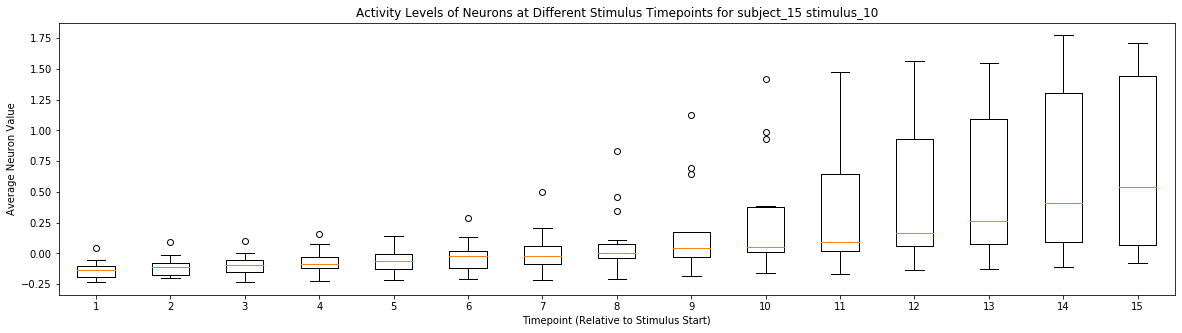

   Length  Count
0      15     16


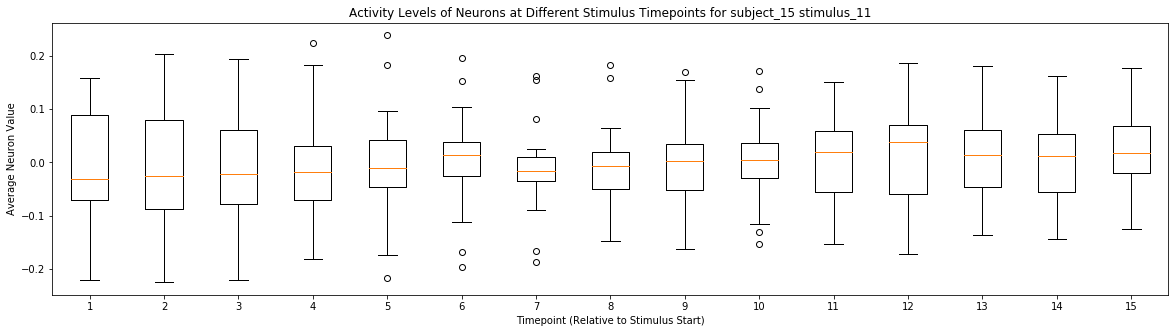

   Length  Count
0      15     16


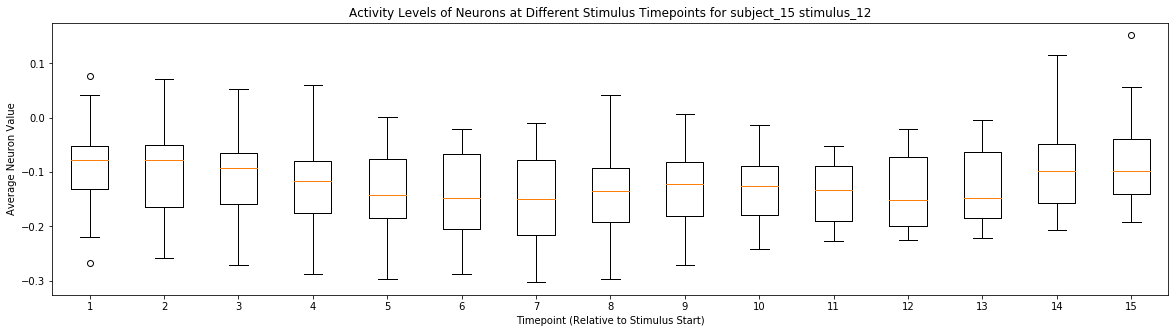

   Length  Count
0       5     10


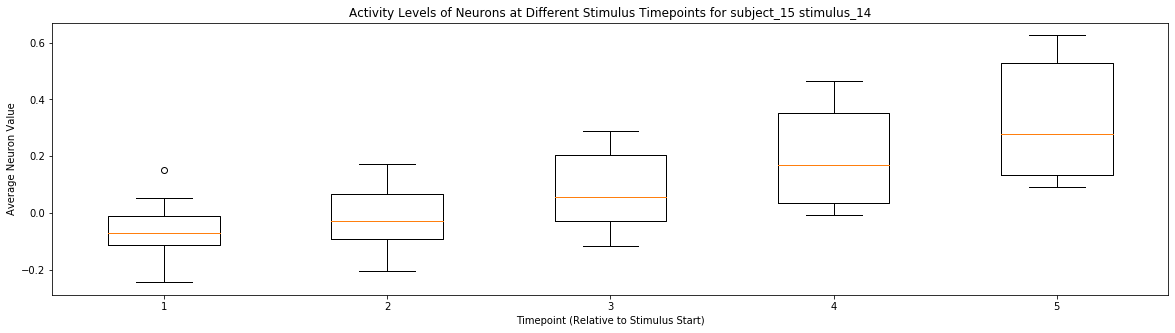

   Length  Count
0       5     10


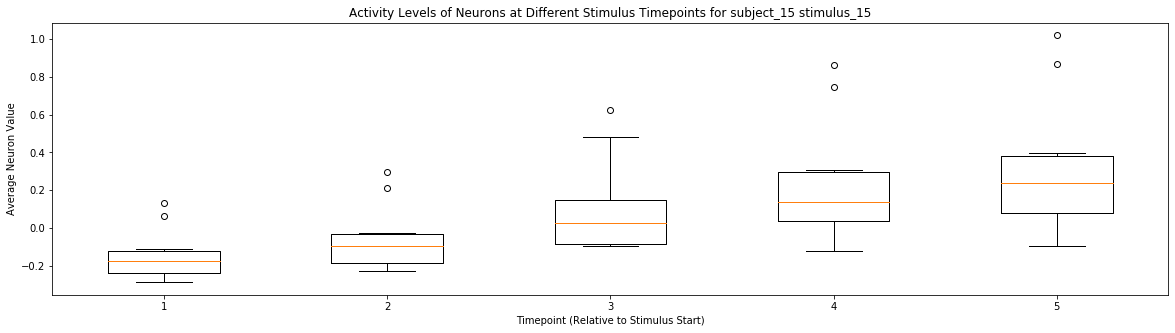

   Length  Count
0      25     12


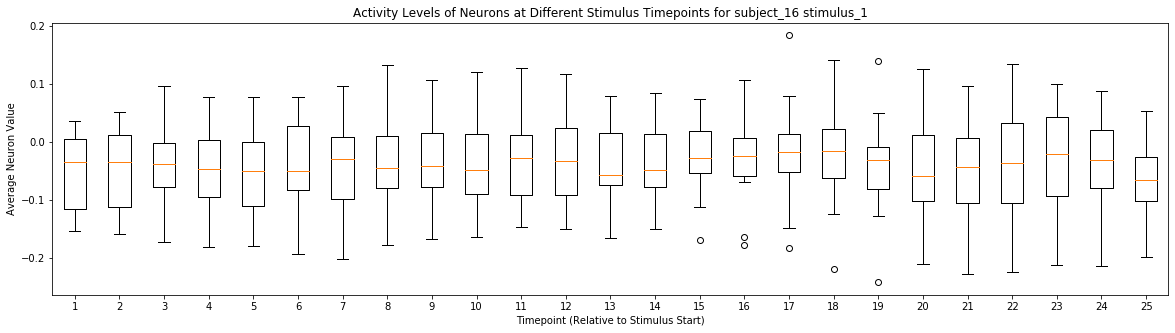

   Length  Count
0      25     12


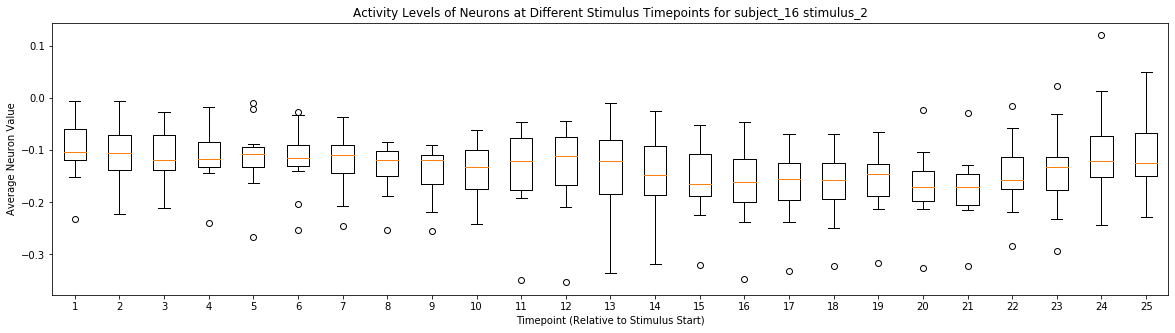

   Length  Count
0       5     24
1      10     32


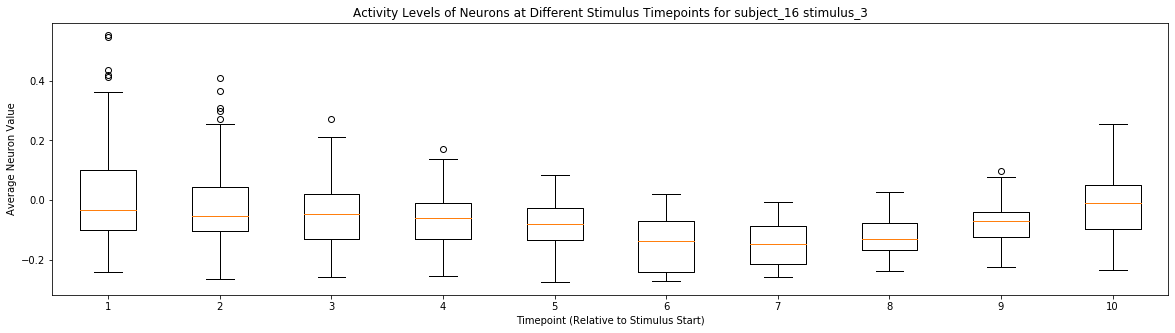

   Length  Count
0     517      1


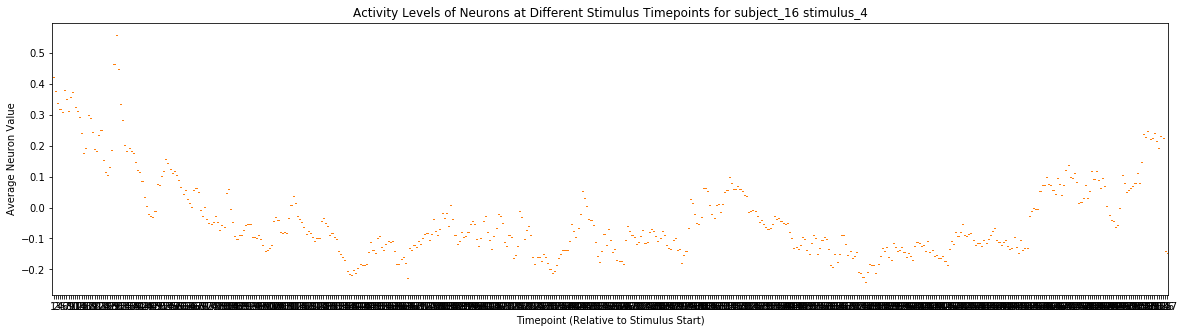

   Length  Count
0      10      8


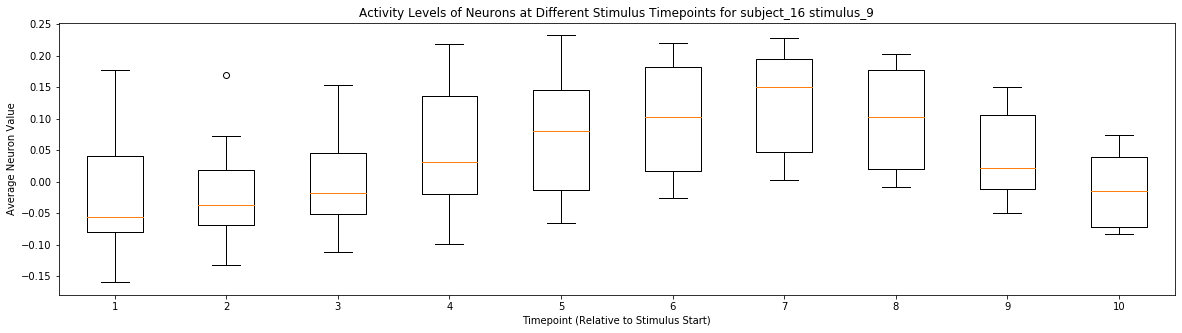

   Length  Count
0      10      8


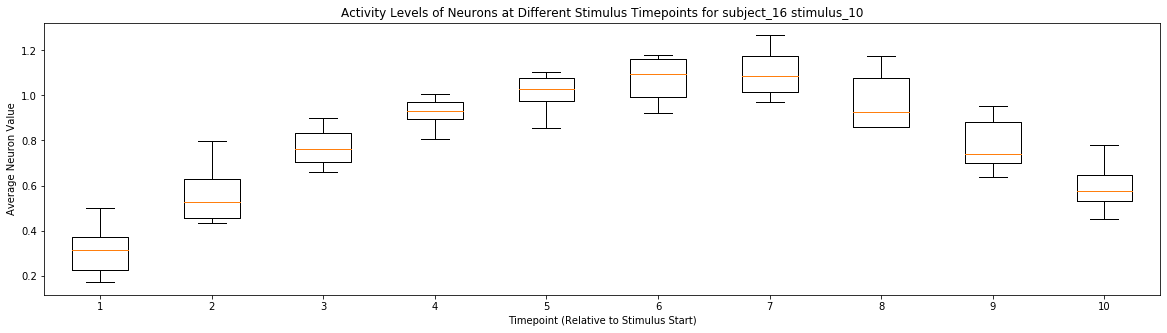

   Length  Count
0      10      8


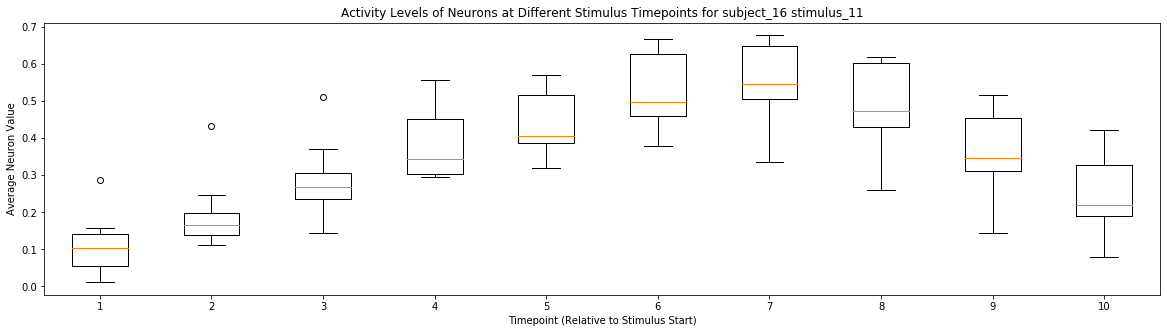

   Length  Count
0      10      8


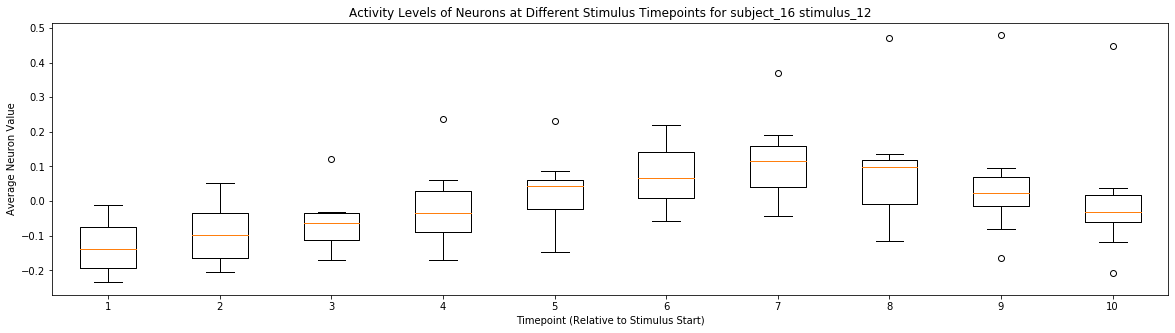

   Length  Count
0      16     22


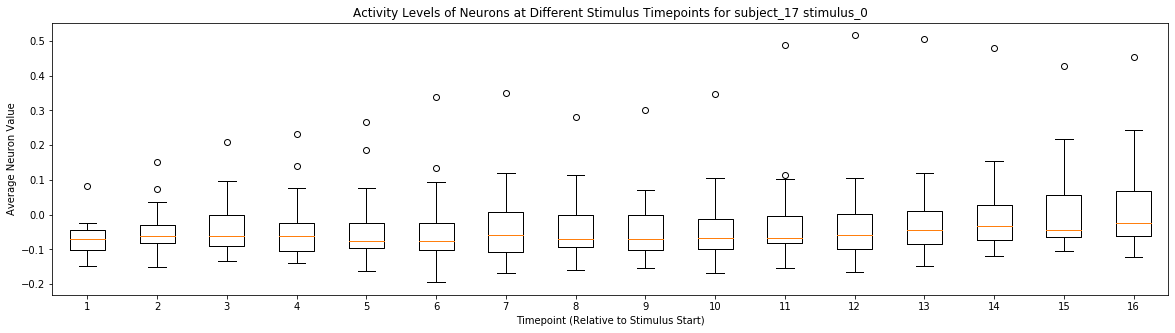

   Length  Count
0      27     29


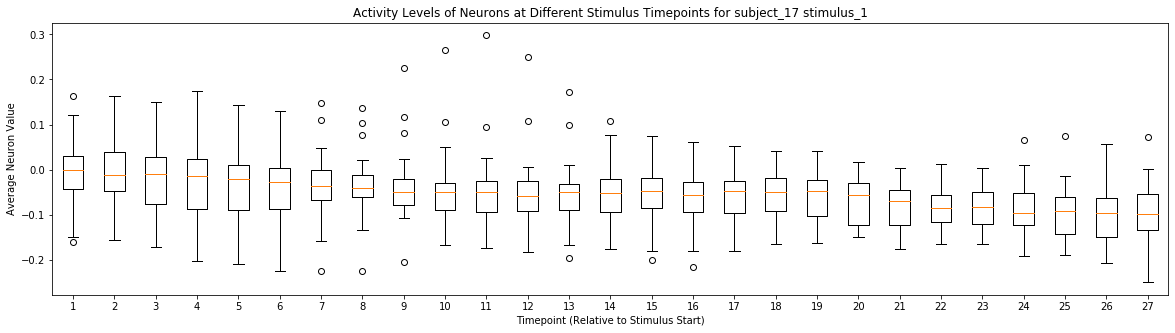

   Length  Count
0      27     29


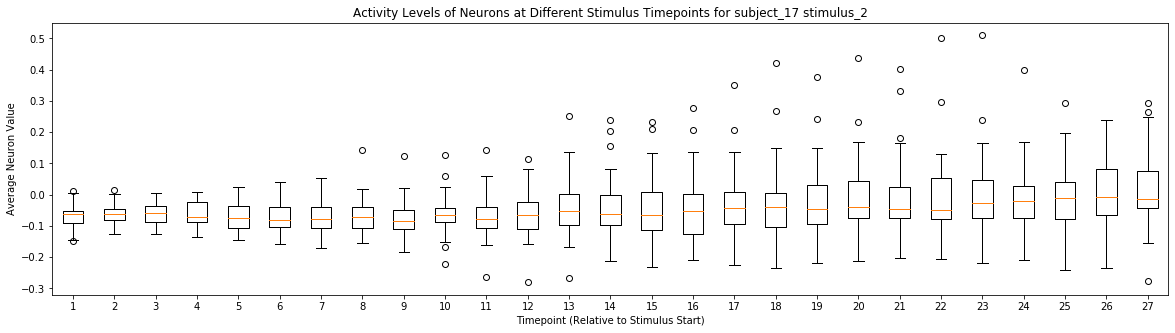

   Length  Count
0       5      1
1       6     57
2      12     63
3      13      1
4      16     22
5      25     20


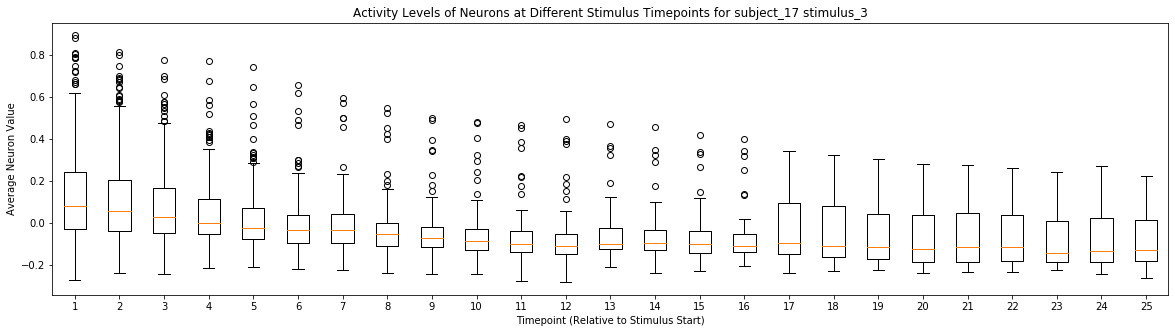

   Length  Count
0     400      2


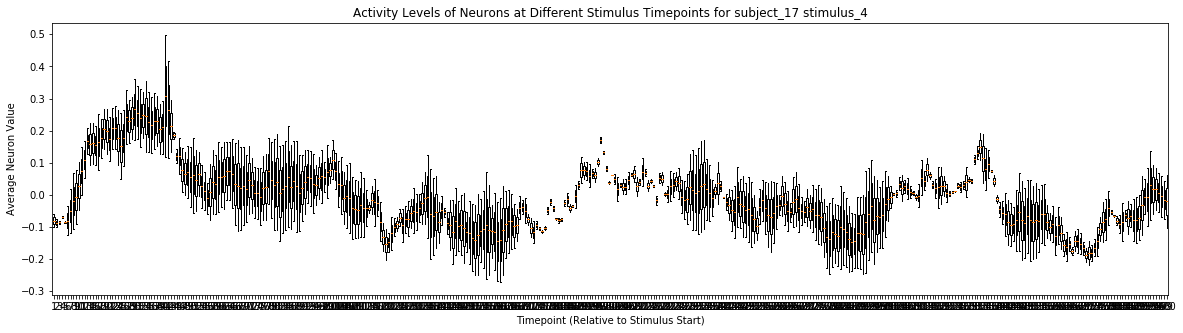

   Length  Count
0      12     16


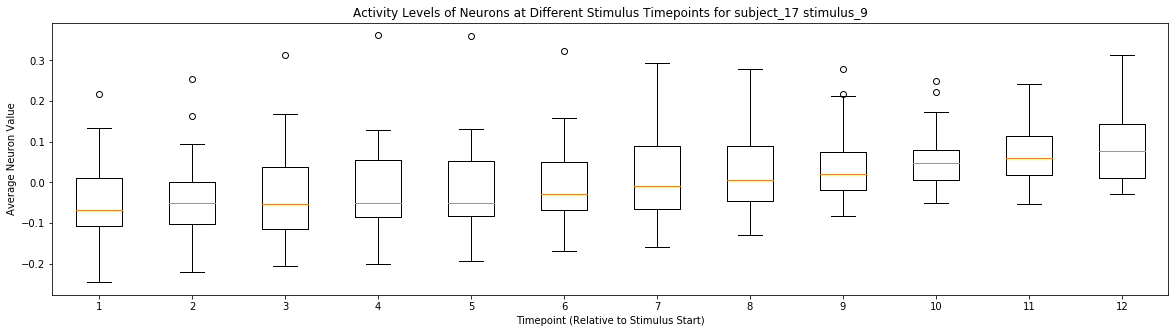

   Length  Count
0      12     16


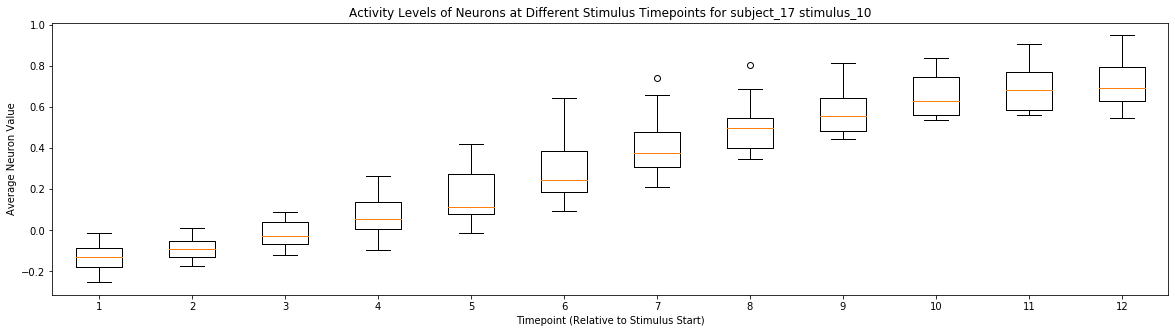

   Length  Count
0      12     16


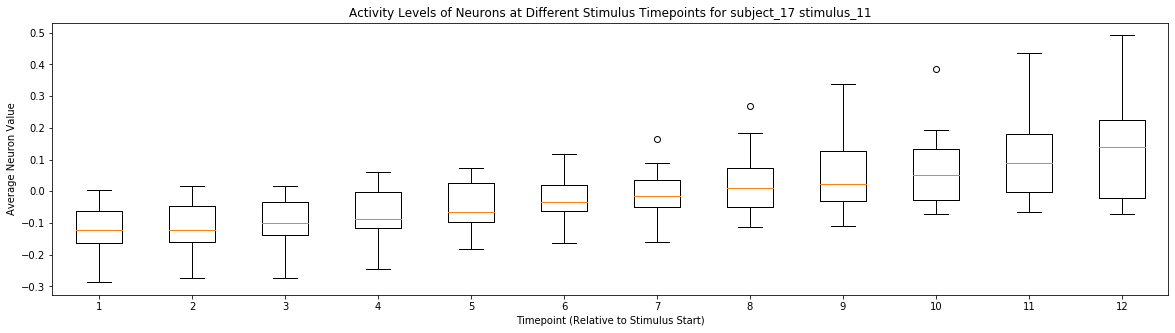

   Length  Count
0      12     16


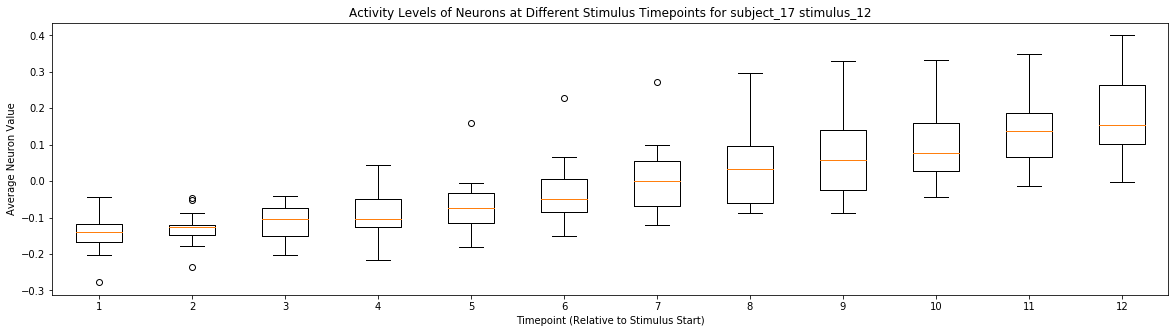

   Length  Count
0       5     10


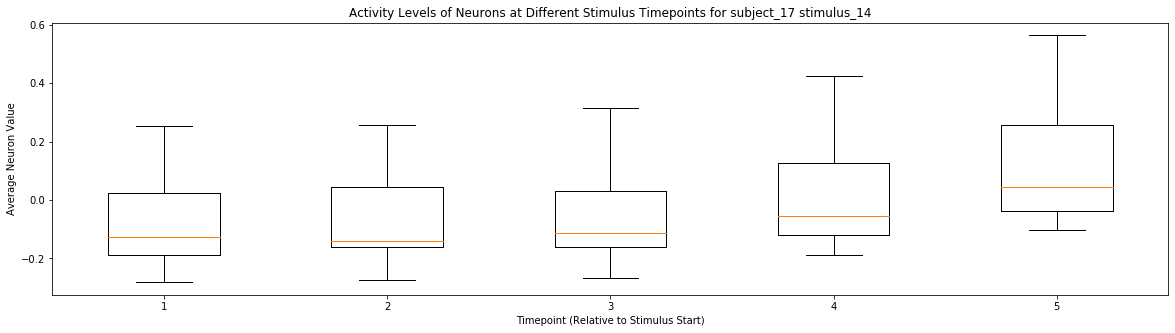

   Length  Count
0       5     10


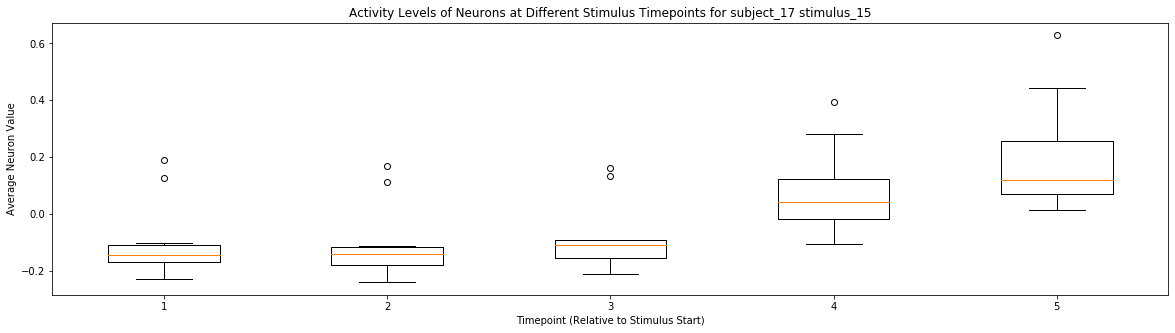

   Length  Count
0      32     12


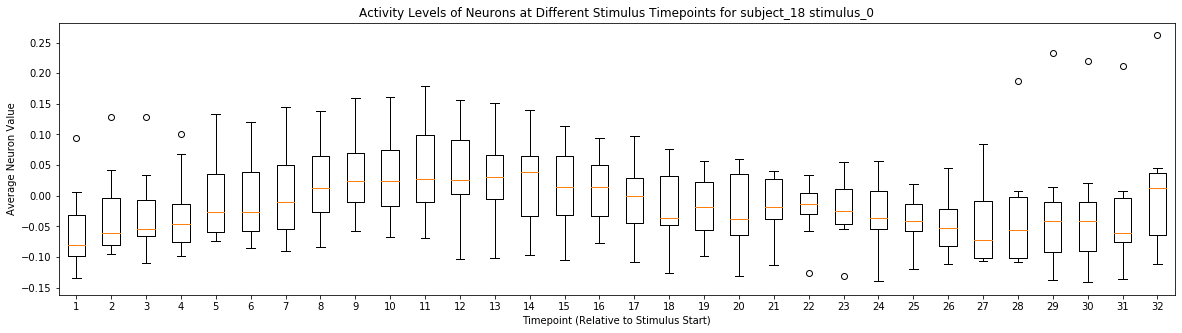

   Length  Count
0      56     18


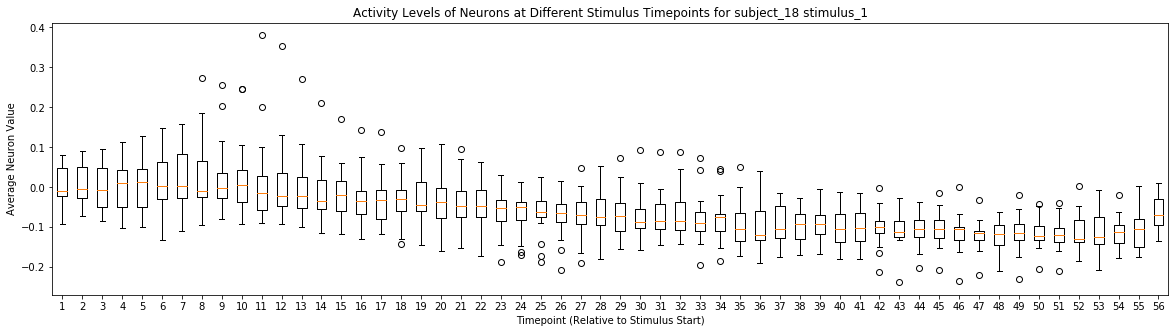

   Length  Count
0      56     18


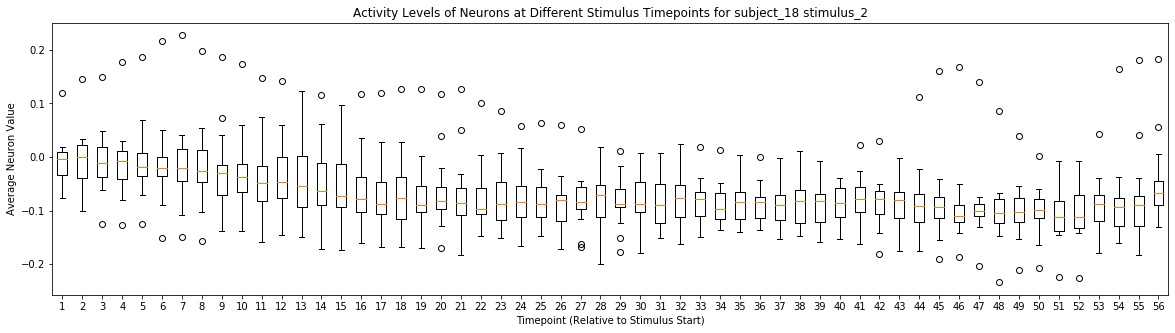

   Length  Count
0      14     36
1      24     32
2      32     12
3      50     10


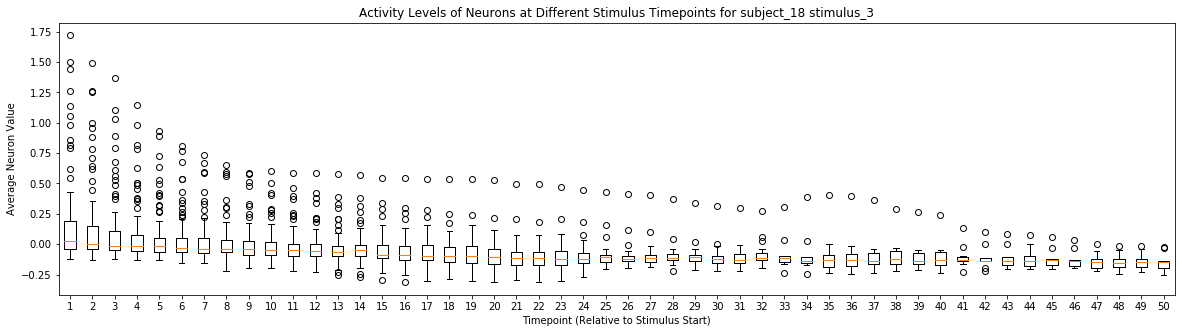

   Length  Count
0    1000      1


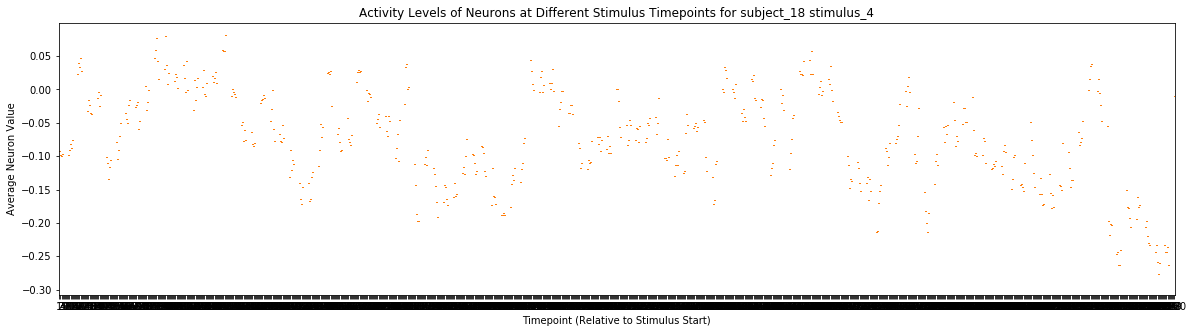

   Length  Count
0      24      8


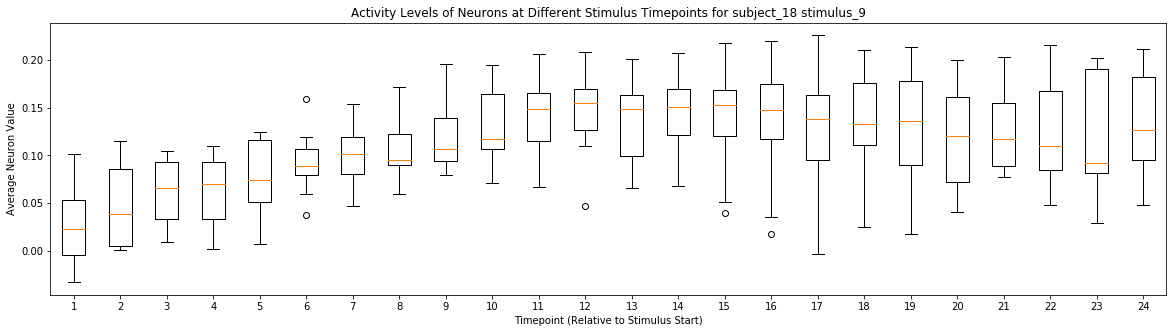

   Length  Count
0      24      8


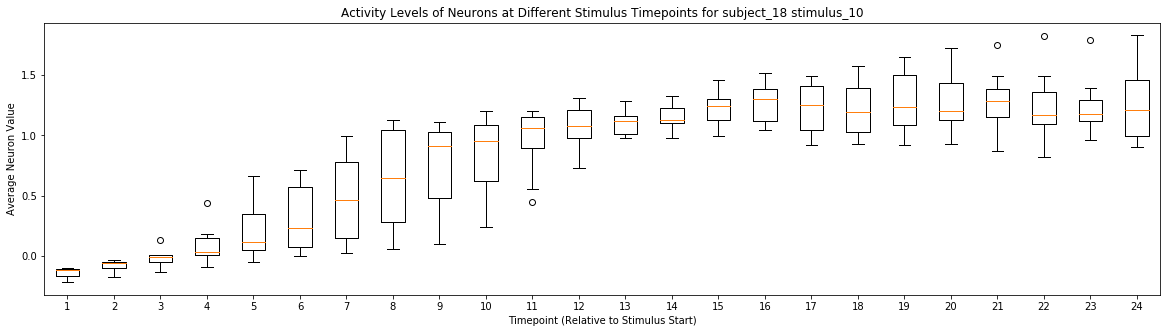

   Length  Count
0      24      8


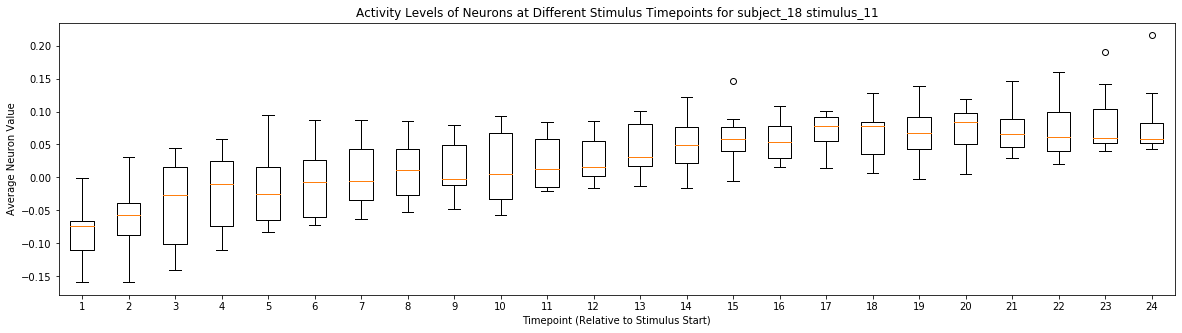

   Length  Count
0      24      8


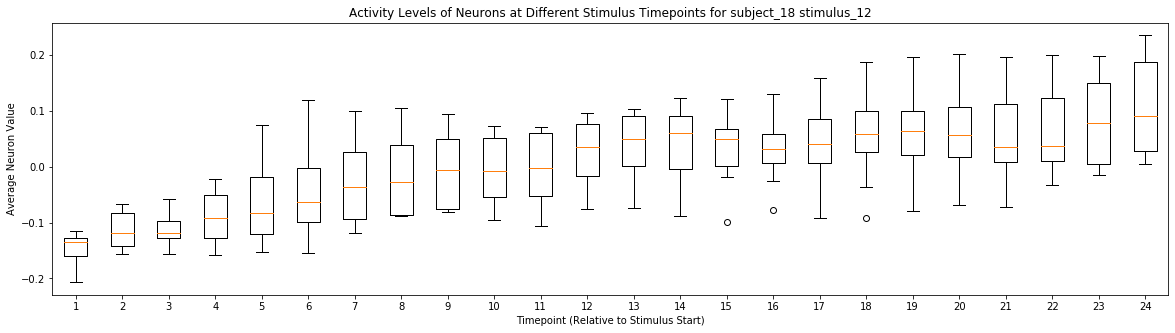

   Length  Count
0      10      5


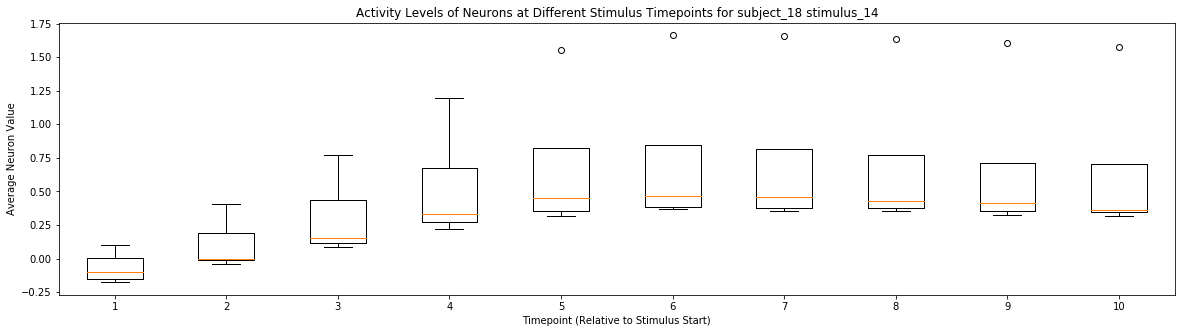

   Length  Count
0      10      5


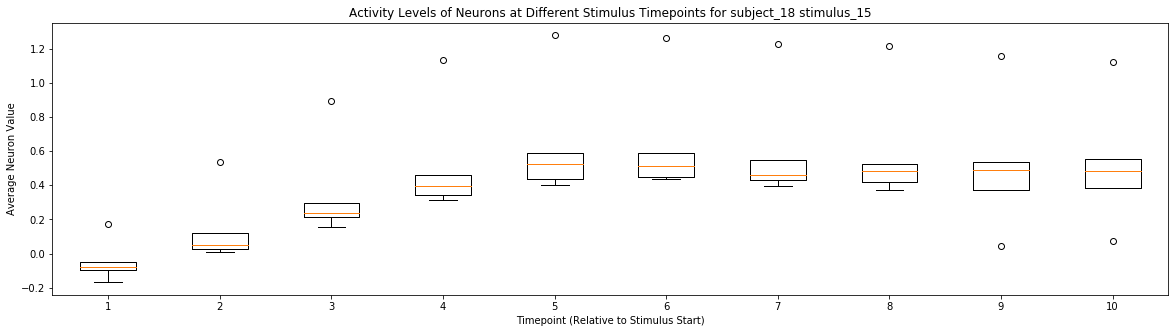

   Length  Count
0      10     44
1      20     22


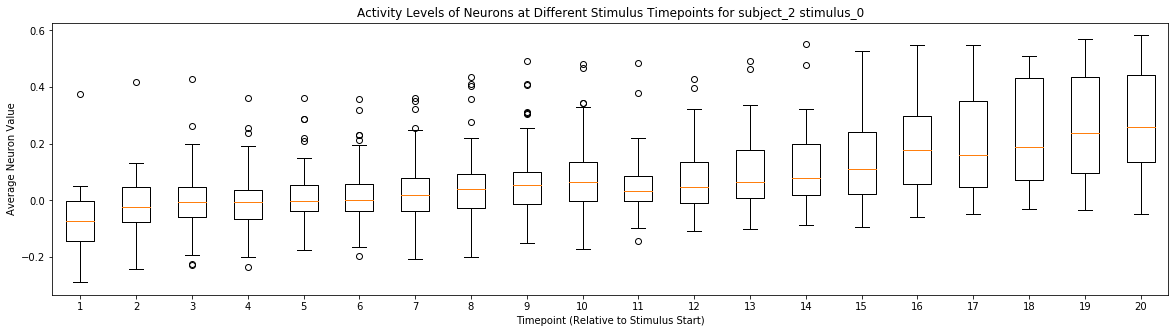

   Length  Count
0      10     44
1      20     22


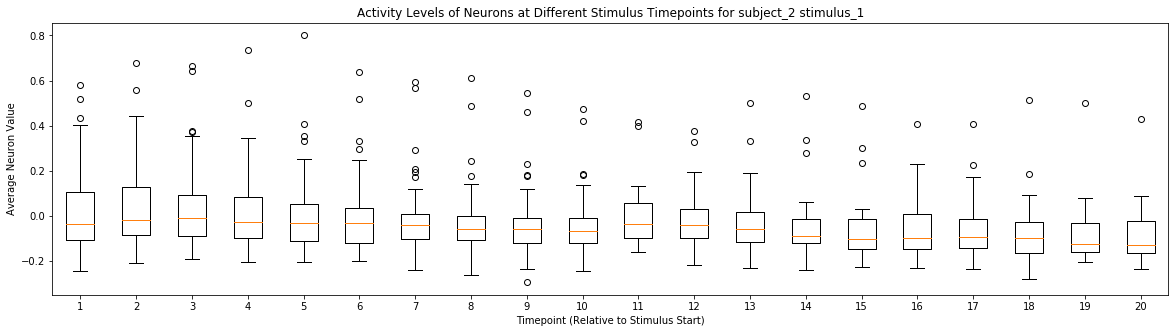

   Length  Count
0      10     44
1      20     22


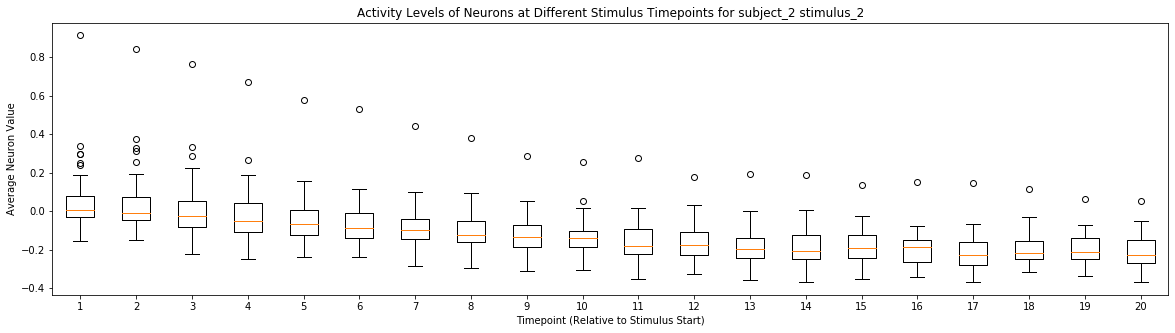

   Length  Count
0      10     44
1      20     22


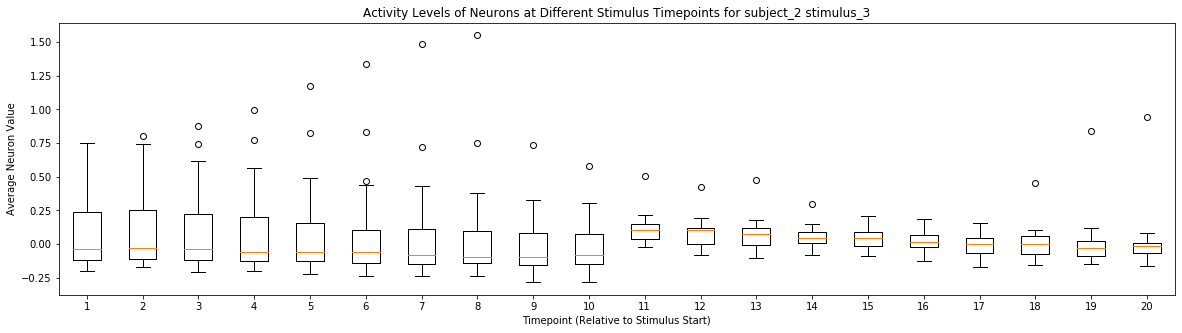

   Length  Count
0      10     34
1      20     15


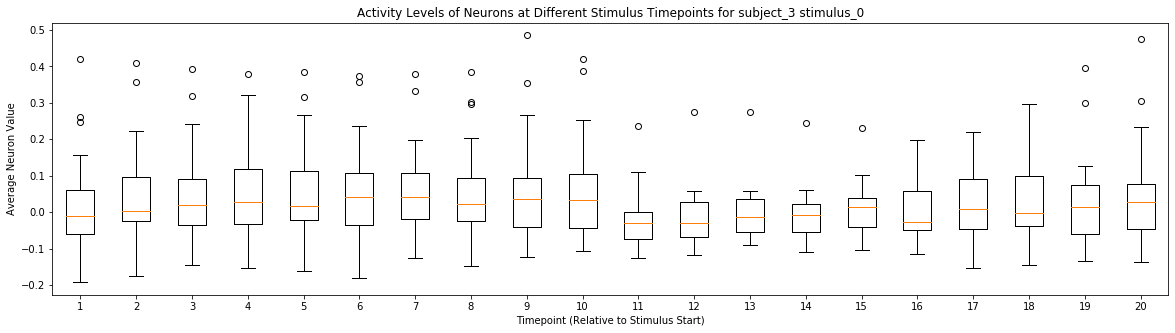

   Length  Count
0      10     32
1      20     16


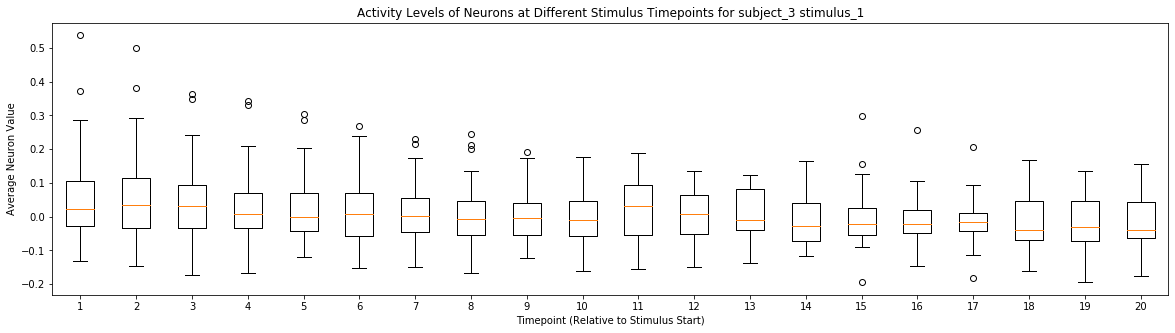

   Length  Count
0      10     32
1      20     16


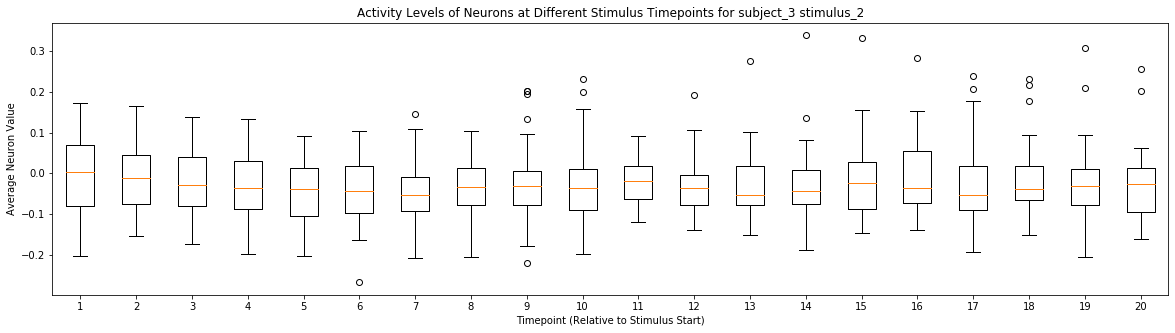

   Length  Count
0      10     32
1      20     16


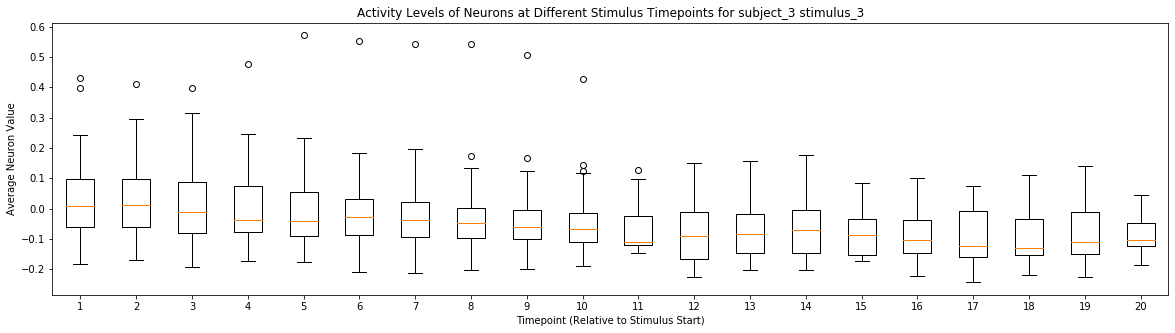

   Length  Count
0      20     18
1      40      9


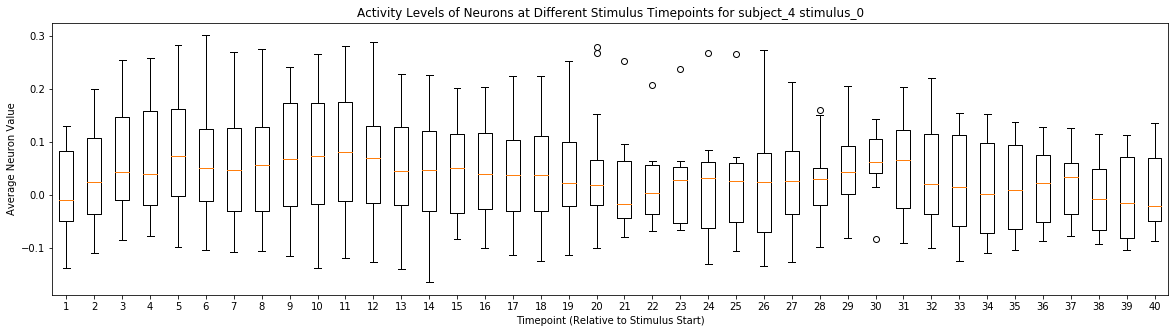

   Length  Count
0      20     18
1      40      9


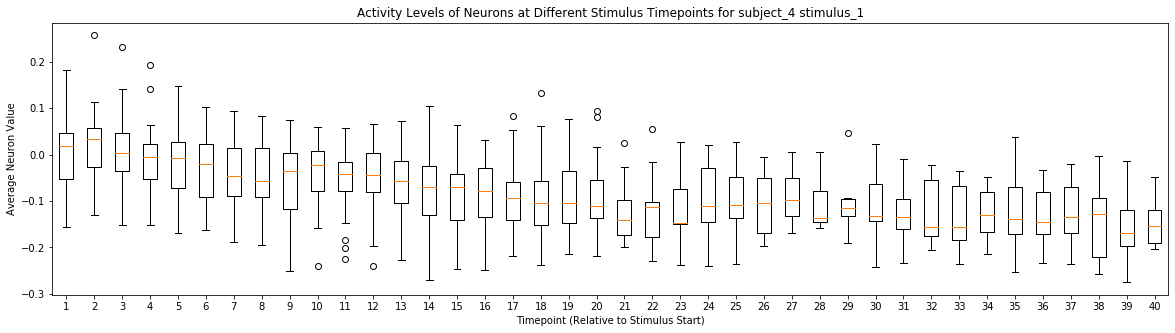

   Length  Count
0      20     18
1      40      9


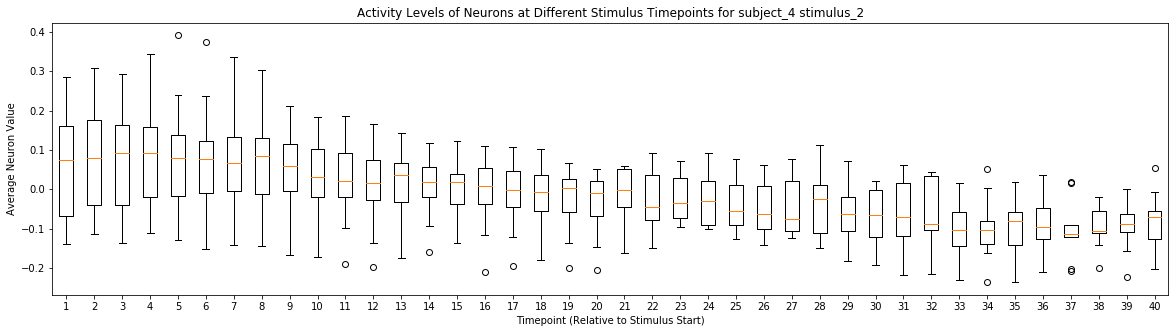

   Length  Count
0      20     18
1      40      9


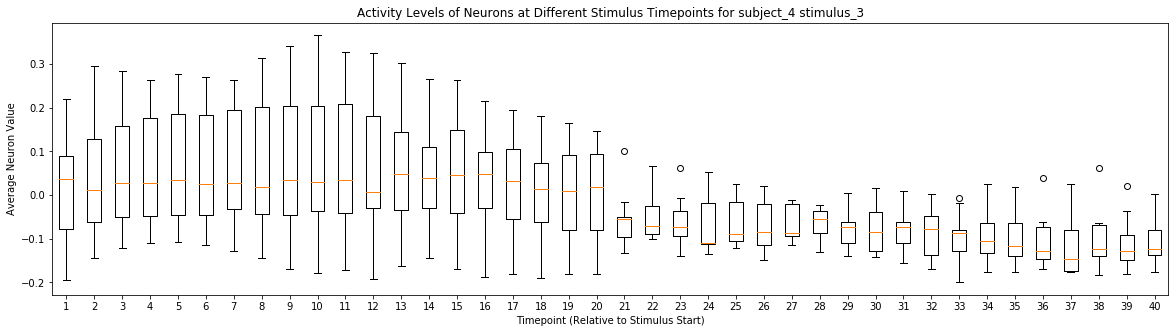

   Length  Count
0      30     12
1      60      6


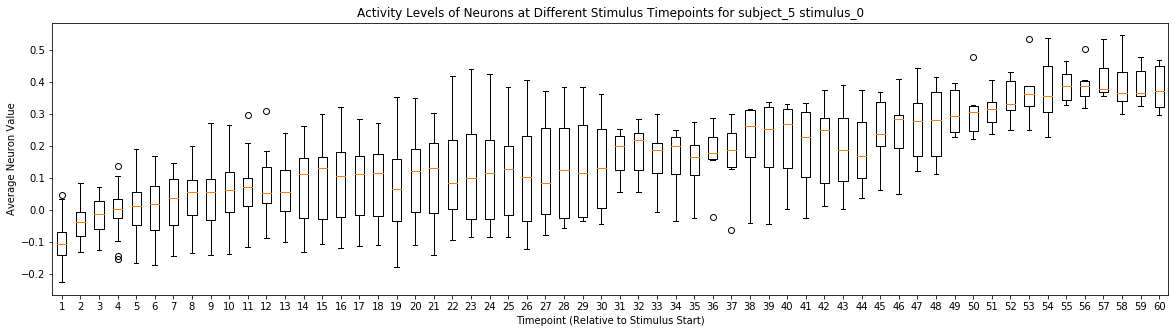

   Length  Count
0      30     14
1      60      5


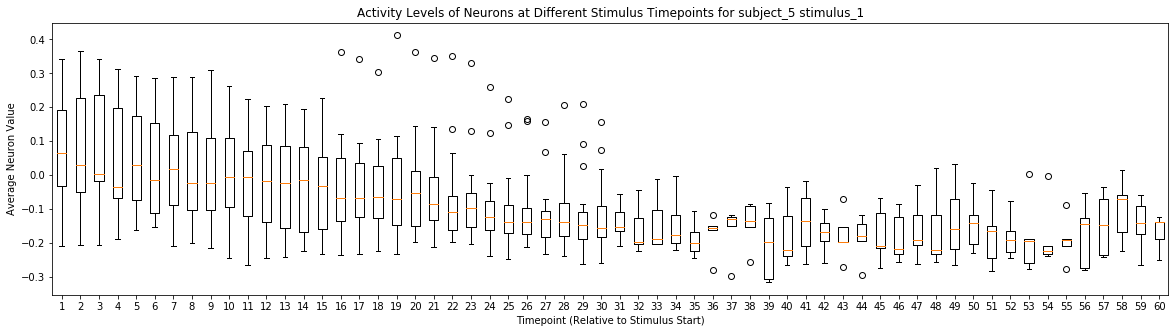

   Length  Count
0      30     12
1      60      6


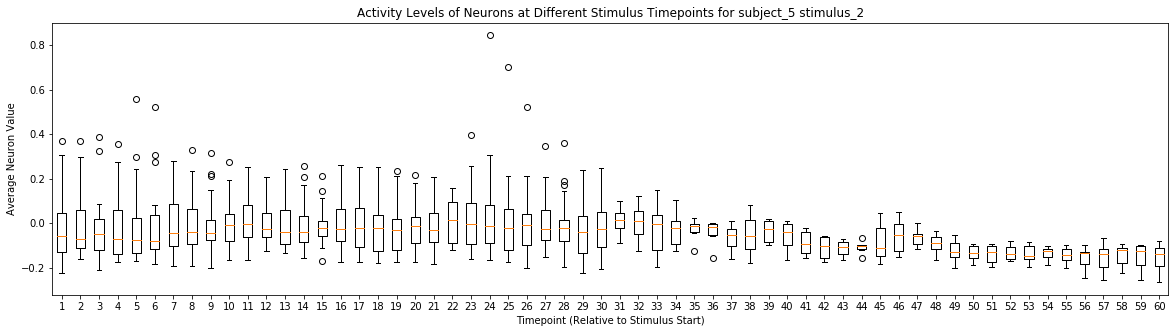

   Length  Count
0      30     12
1      60      6


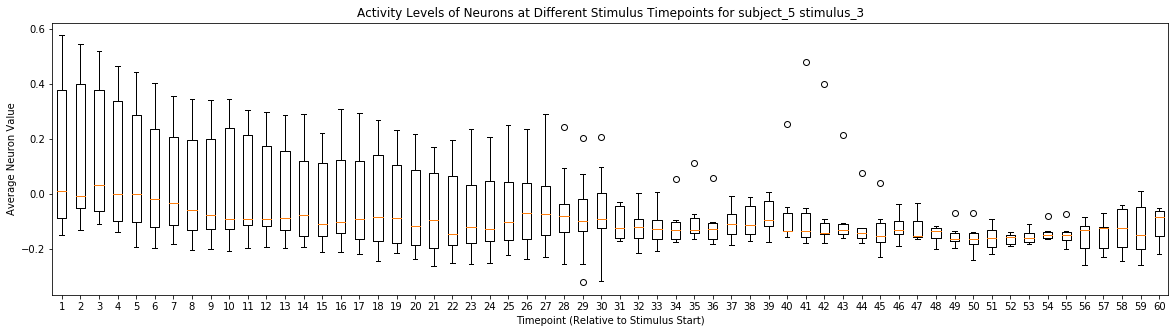

   Length  Count
0      40     27


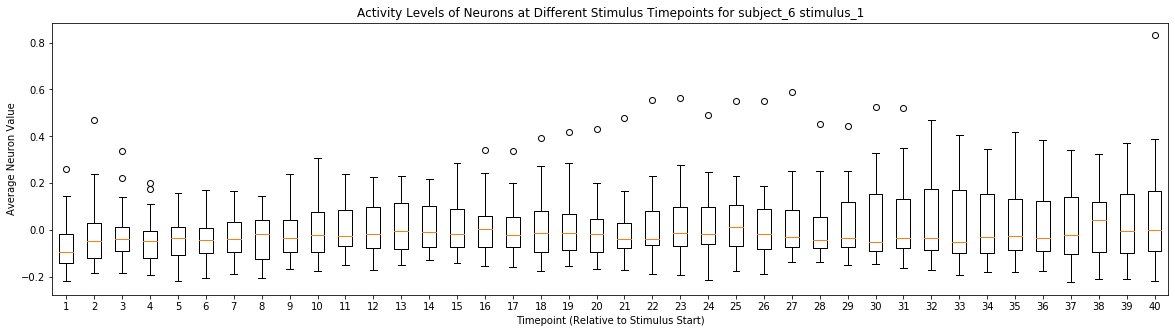

   Length  Count
0      40     27


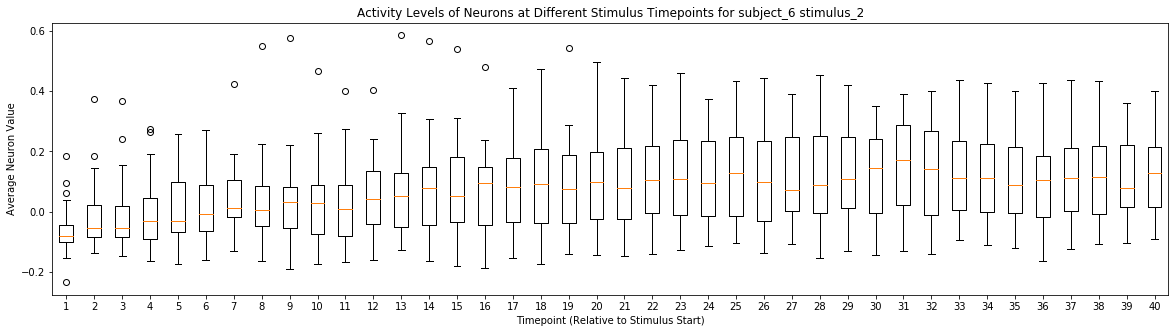

   Length  Count
0      30     54


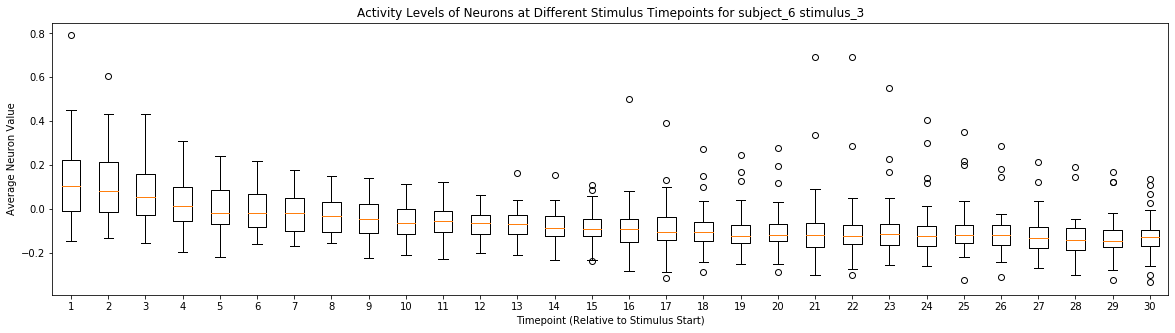

   Length  Count
0      50     11


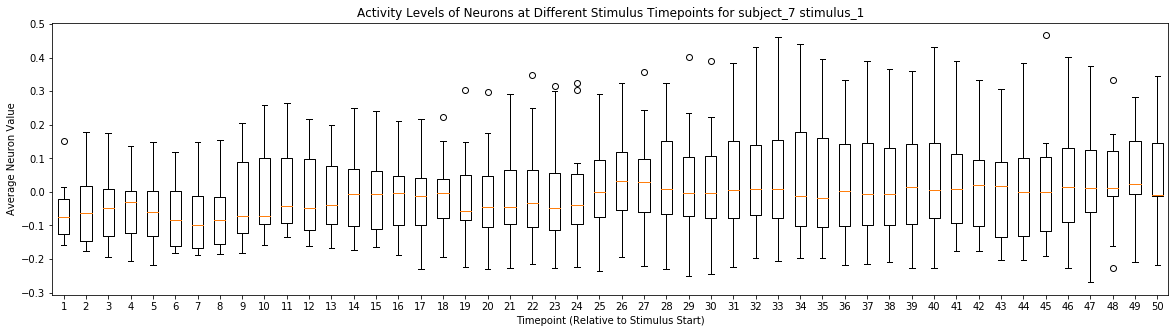

   Length  Count
0      50     11


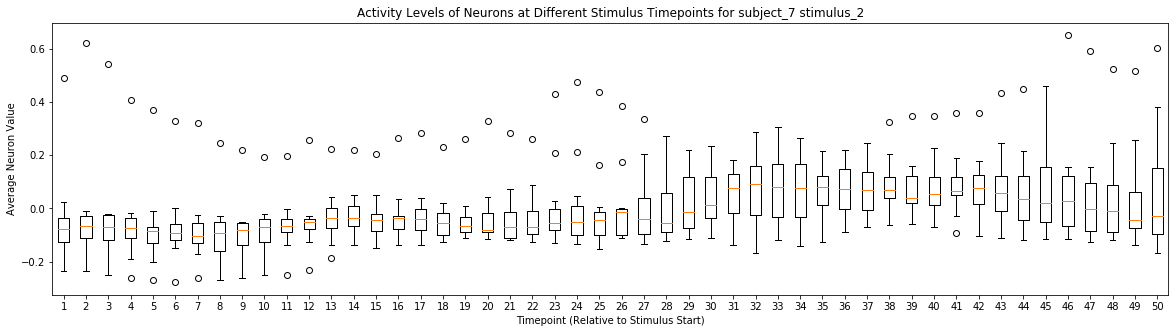

   Length  Count
0       1      1
1      24      1
2      25     21


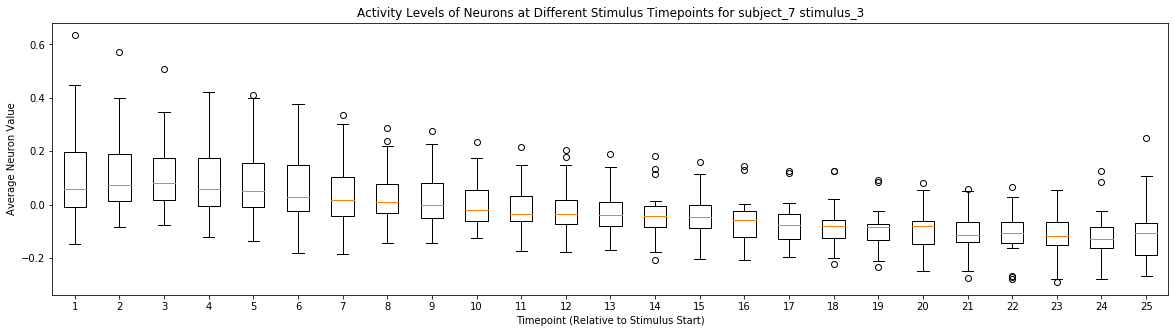

In [13]:
for stim in stim_length_data:
    plot_stim_length_data(stim['subject'], stim['stimulus'], stim['data'], stim['length_counts'])

### Analysis of Influence of the Preceding Component on a Stimulus Timecourse
In this analysis, we evaluated the differences in average neuronal activity during the first 5 time periods of a stimulus (ie the first 2.5 seconds) when compared between stimuli that had different preceding stimuli. If there is significant variation in these initial sections of stimuli that correspond to differential preceding stimuli, then there is noise introduced in Workflow 2 where we aggregate component data into one timeseries. Otherwise, the operation done in Workflow 2 does not introduce additional noise.

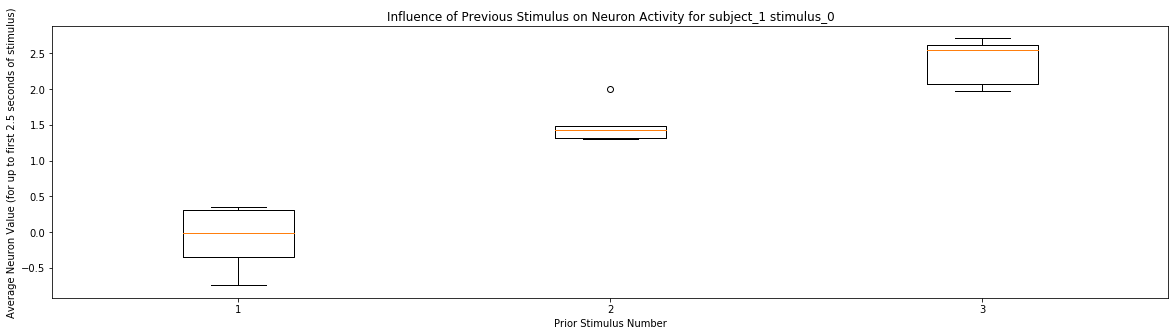

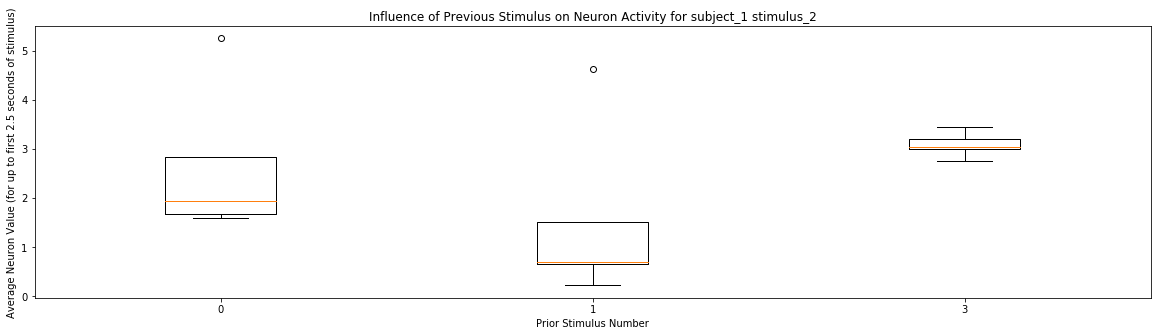

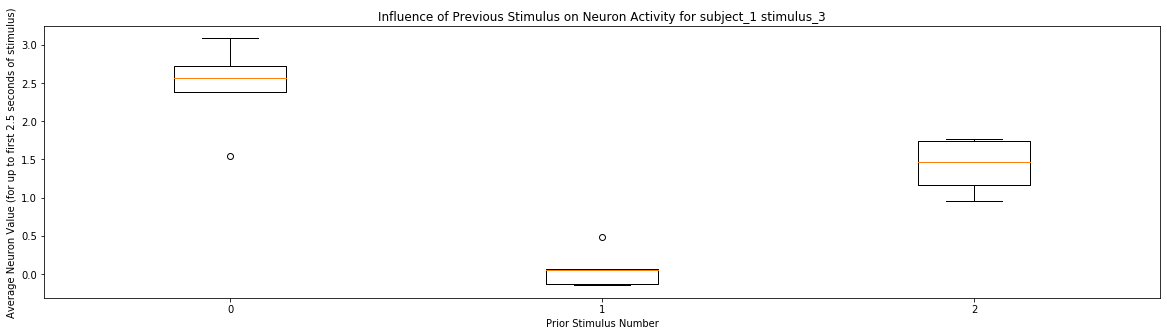

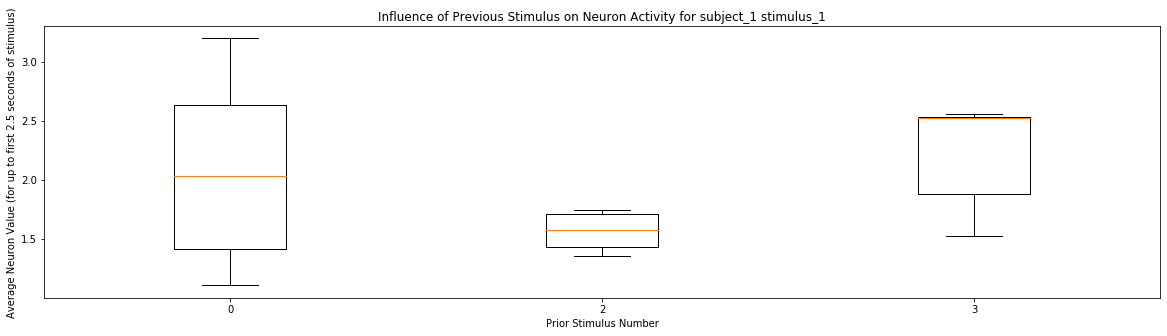

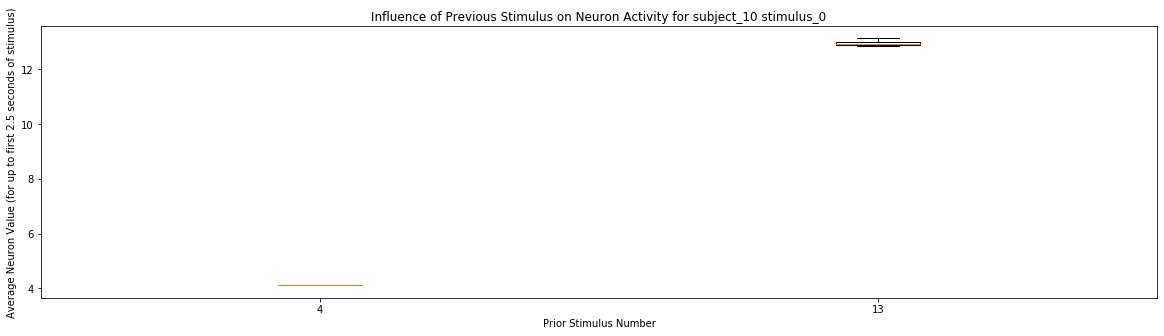

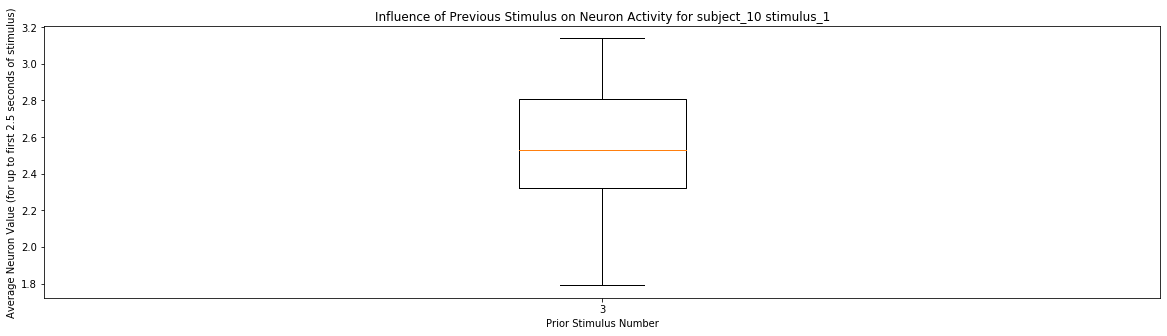

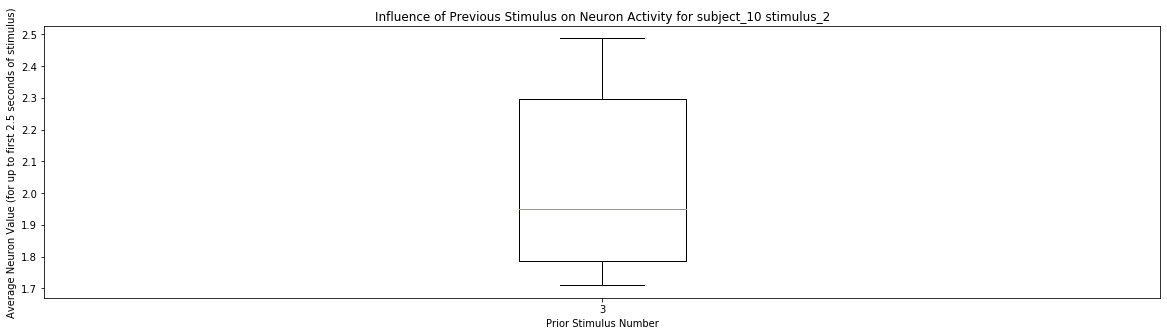

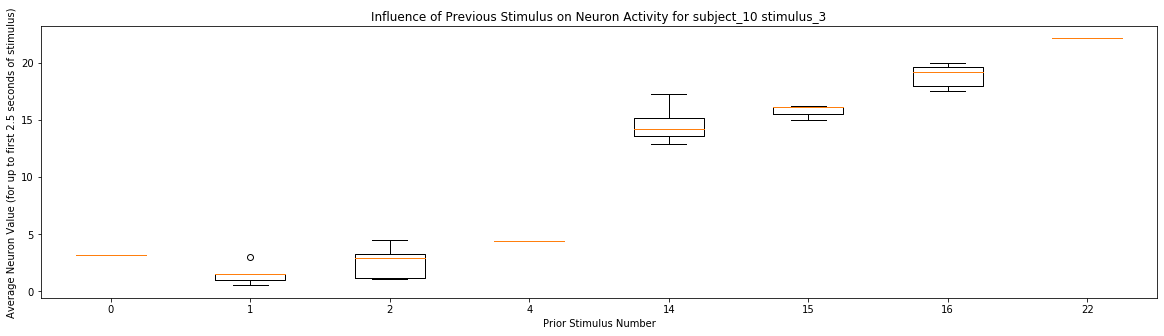

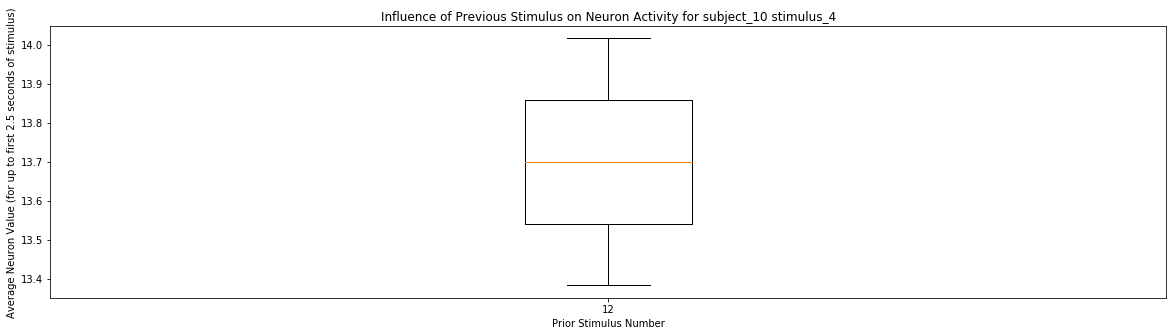

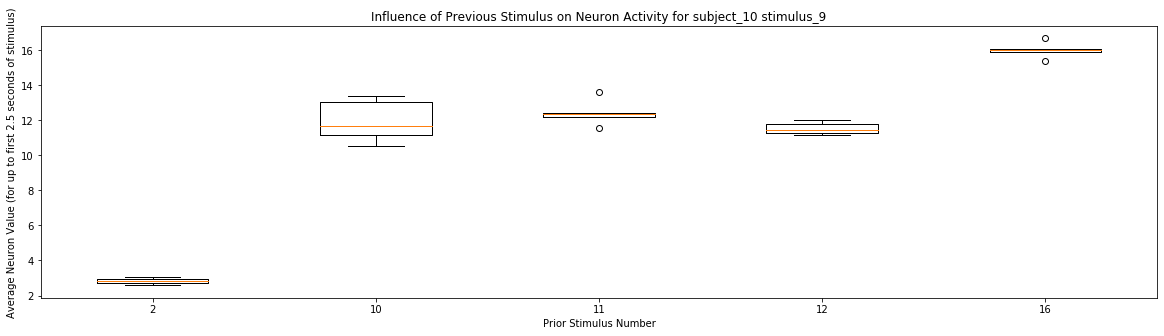

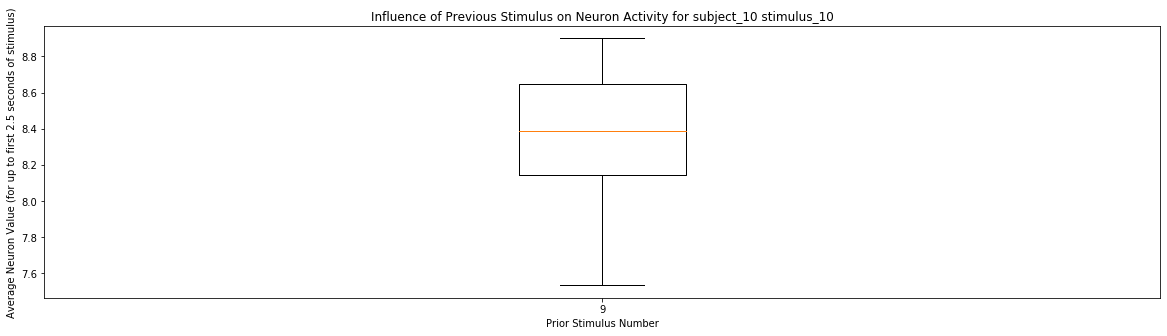

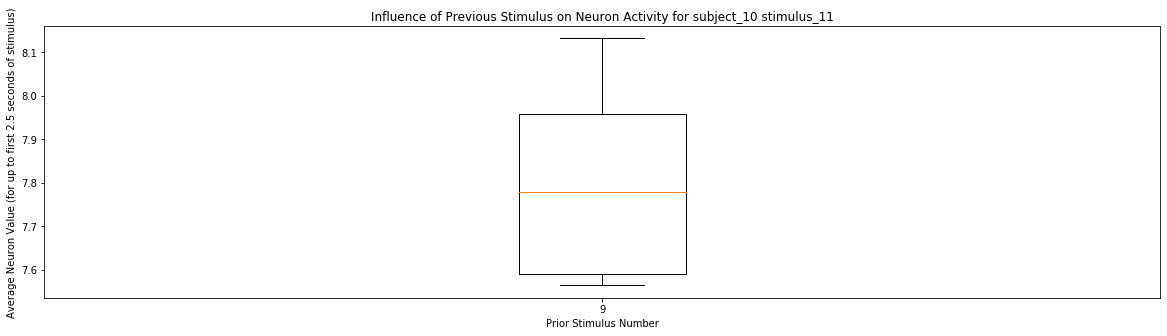

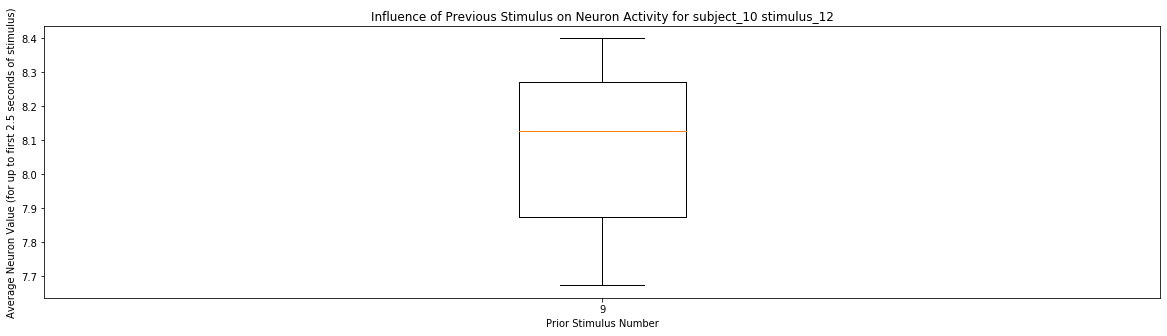

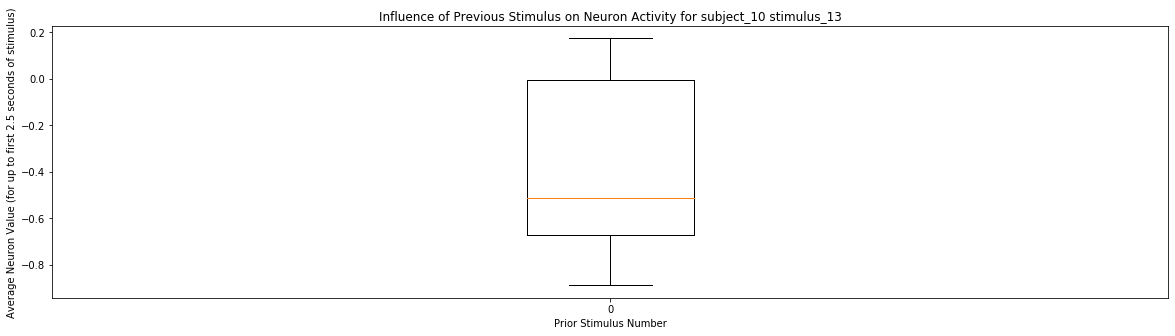

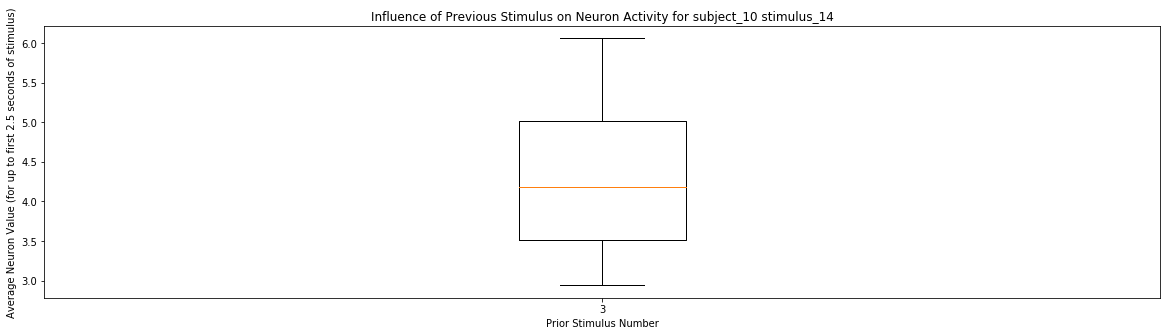

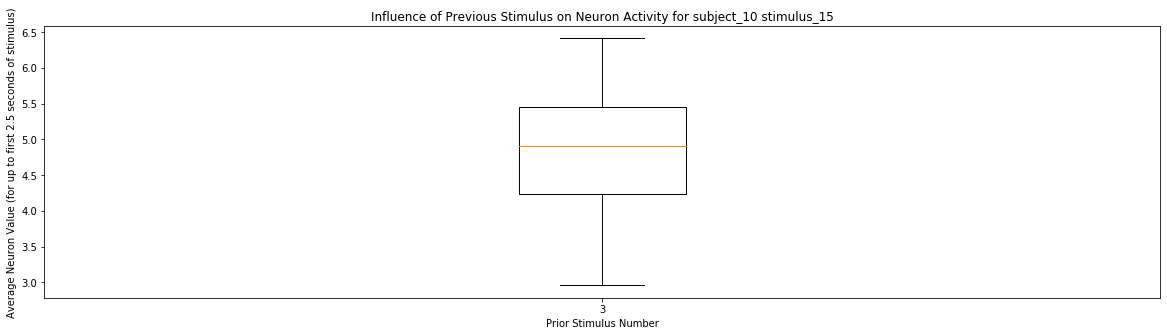

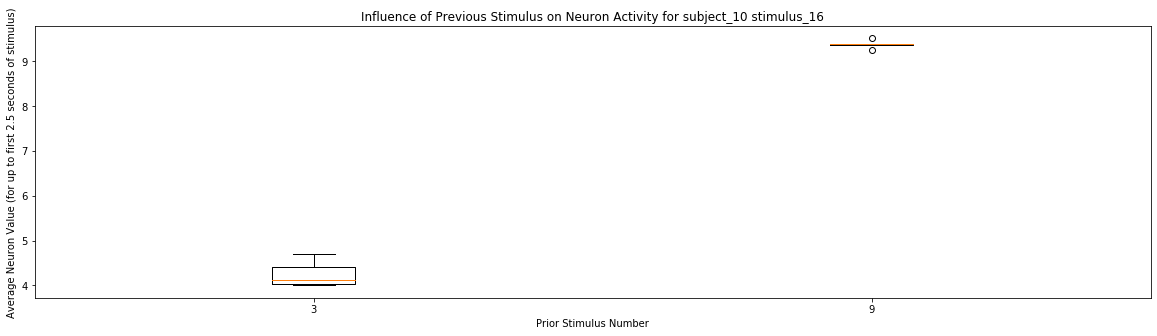

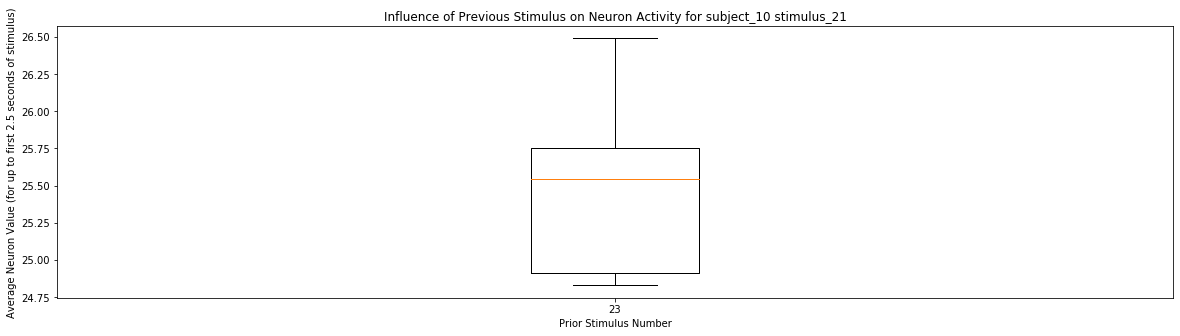

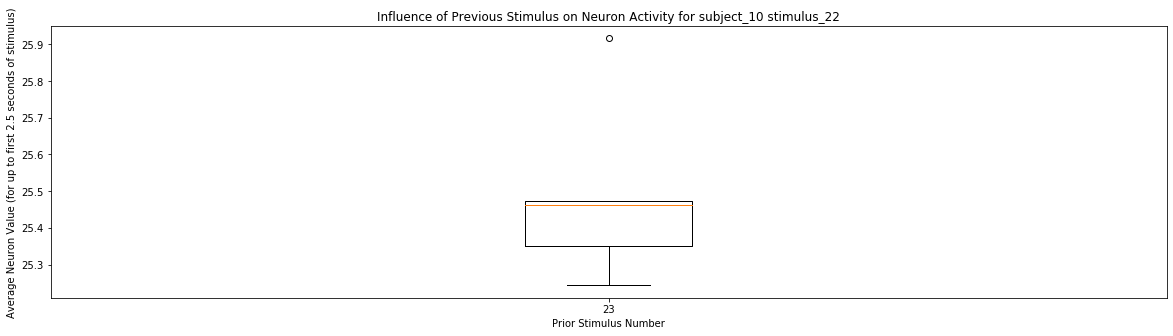

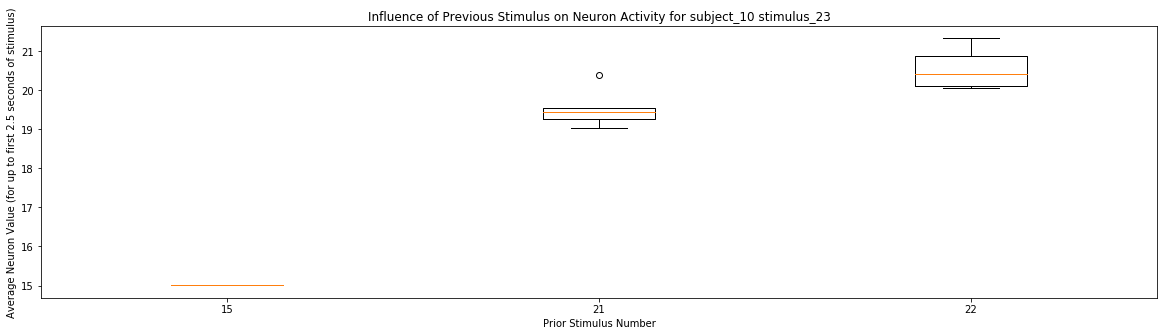

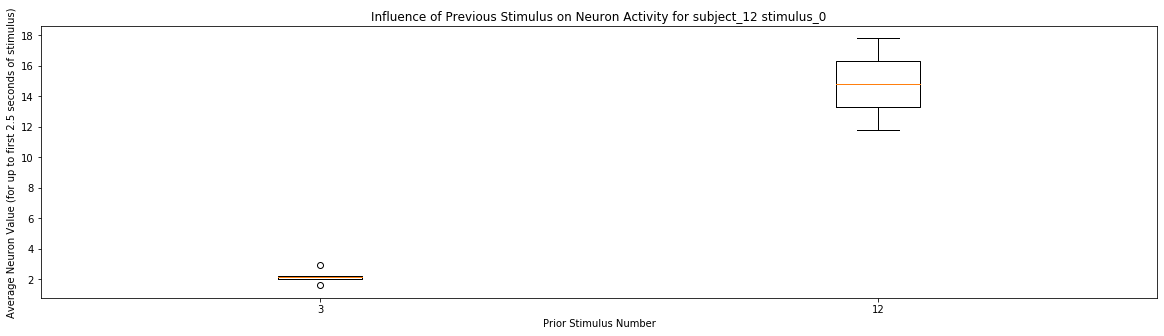

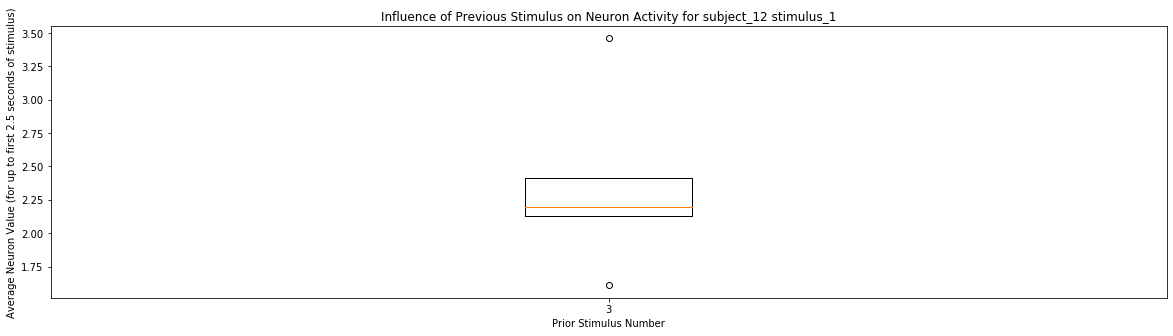

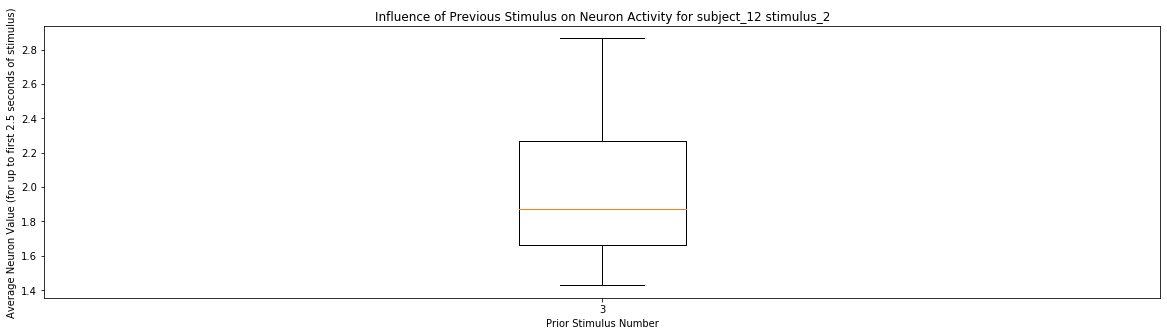

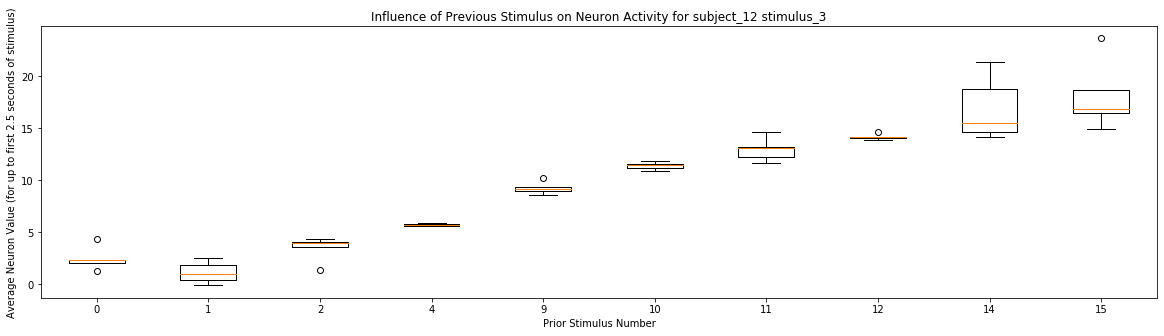

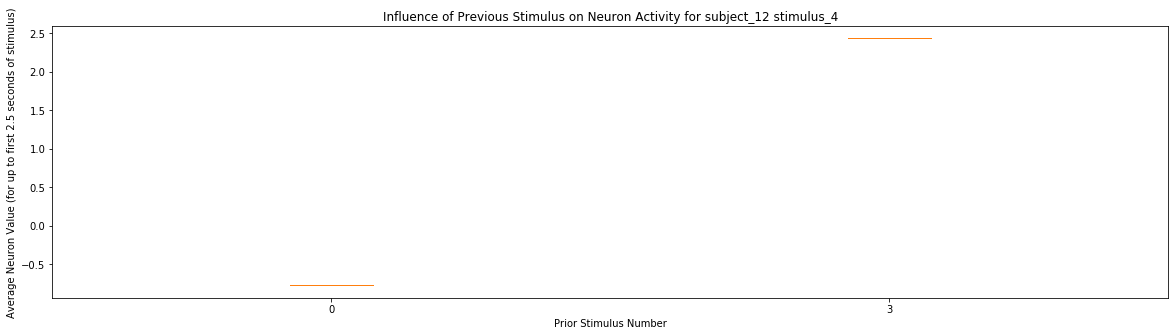

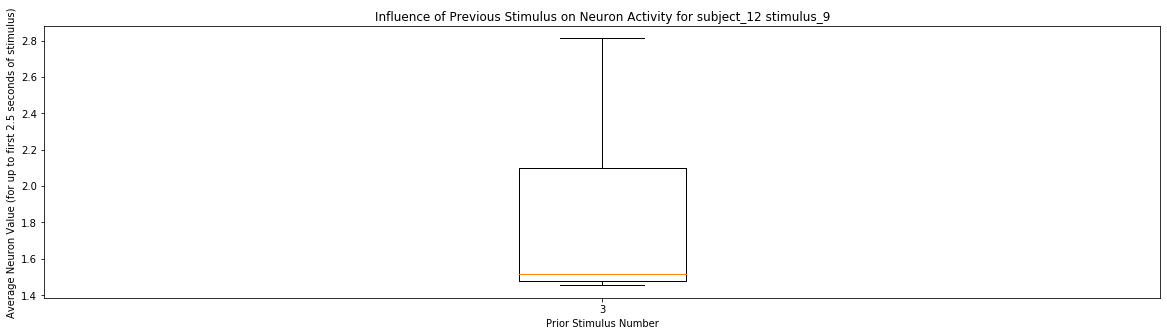

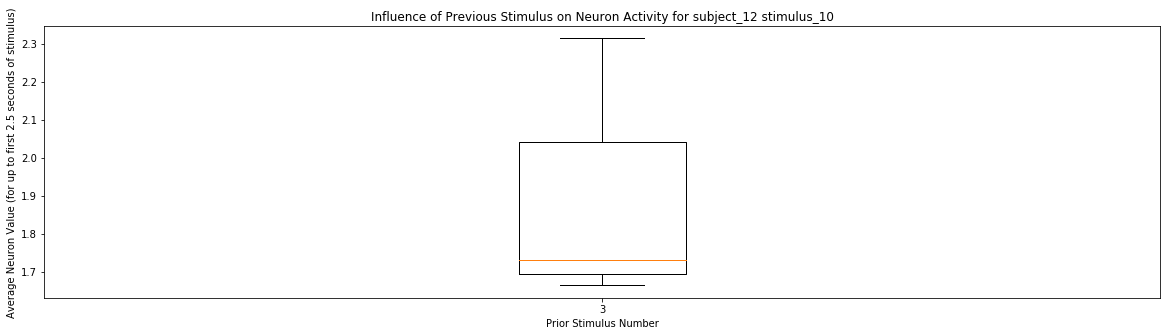

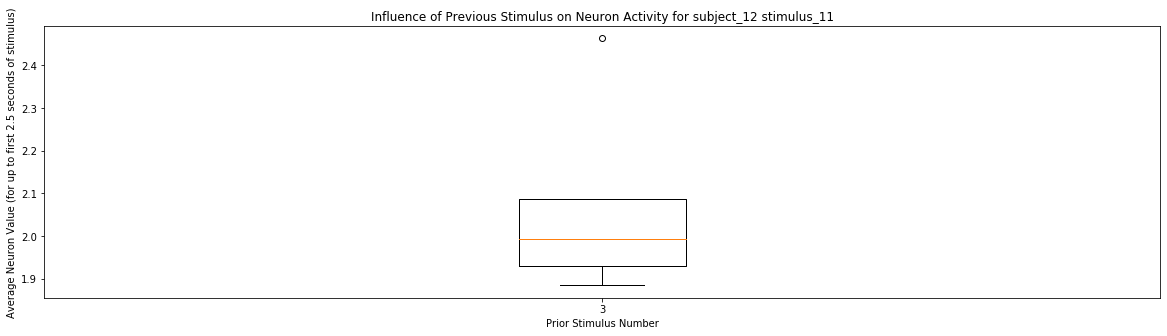

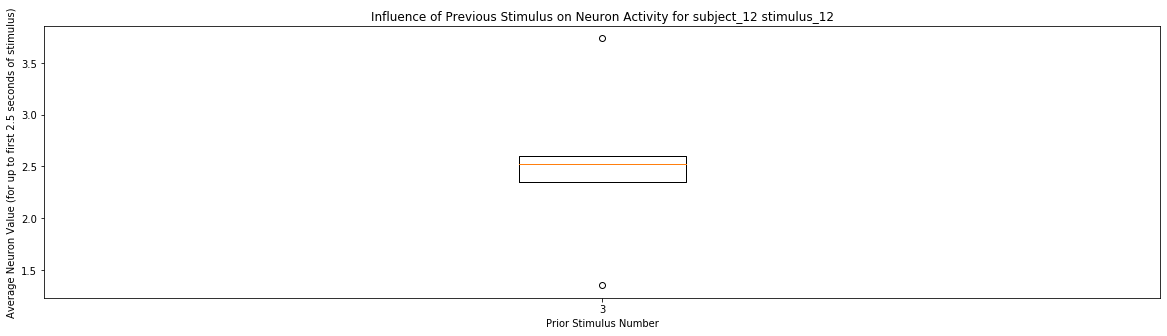

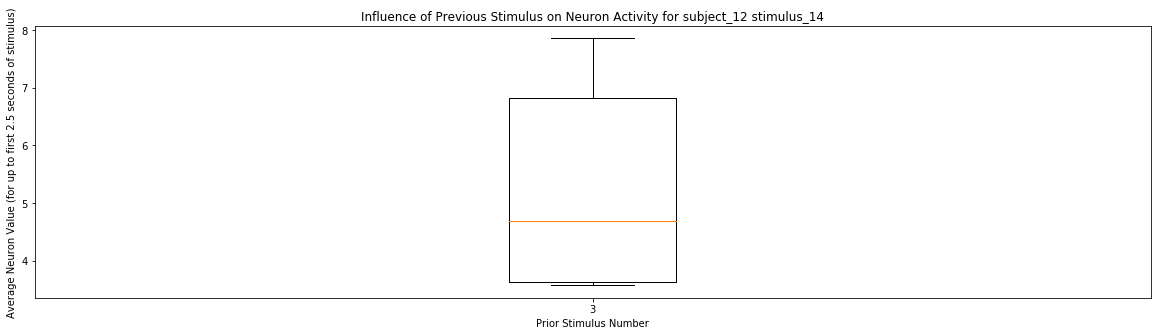

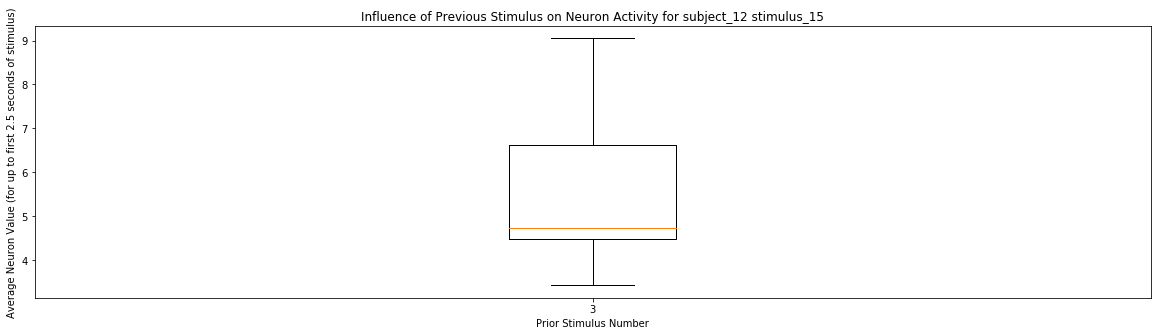

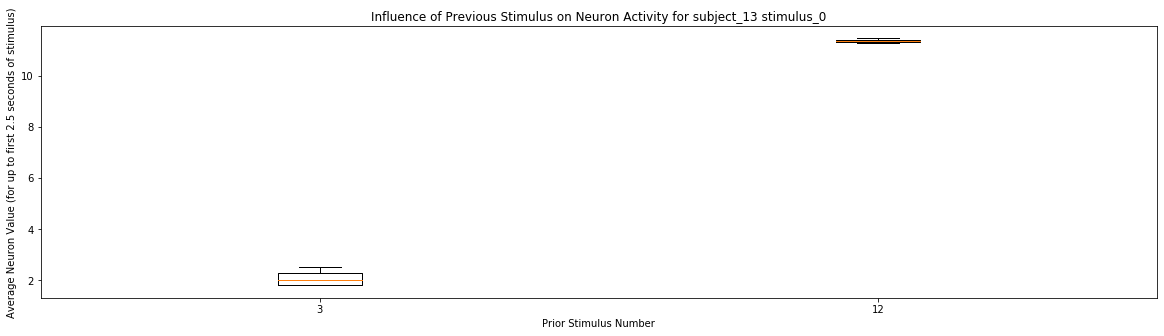

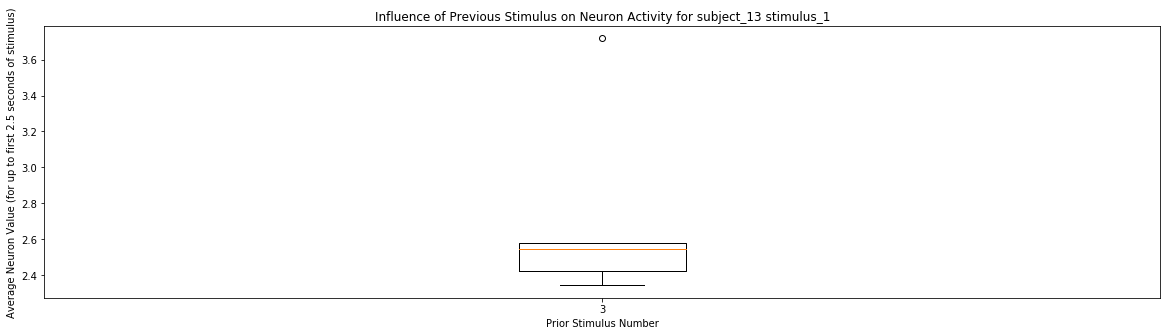

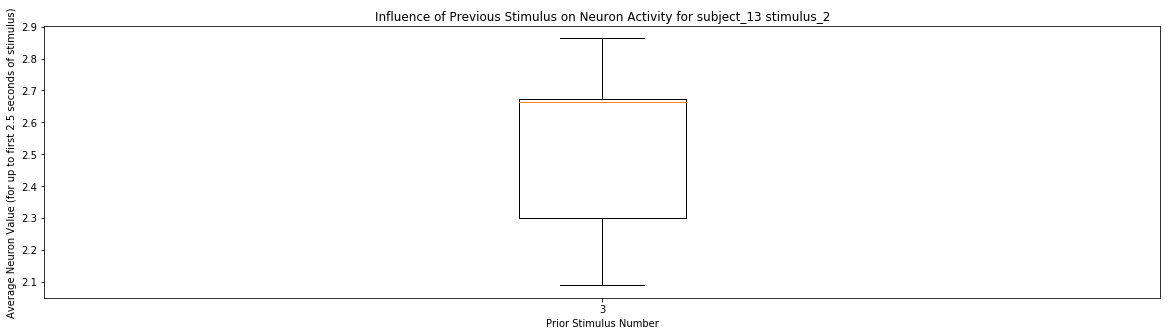

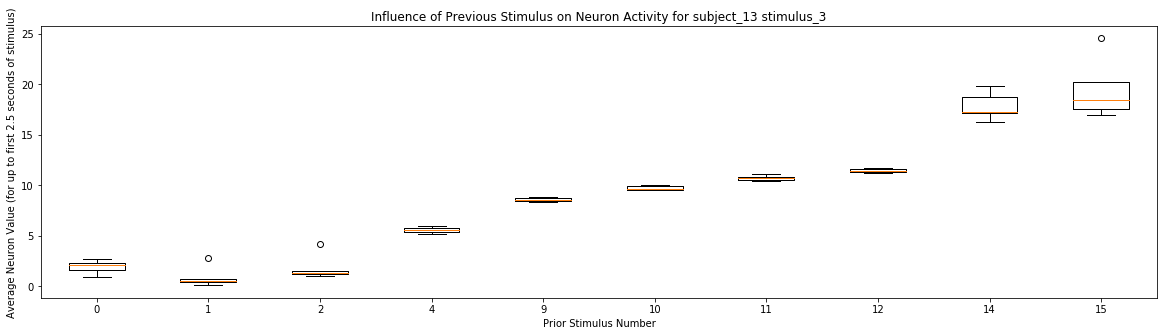

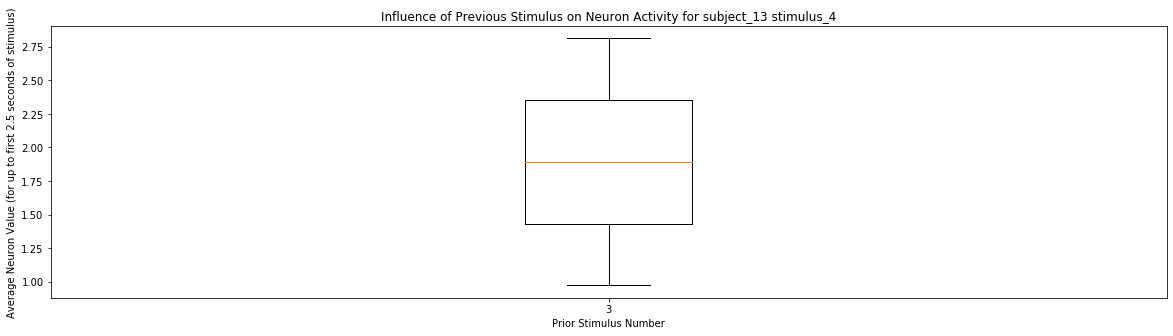

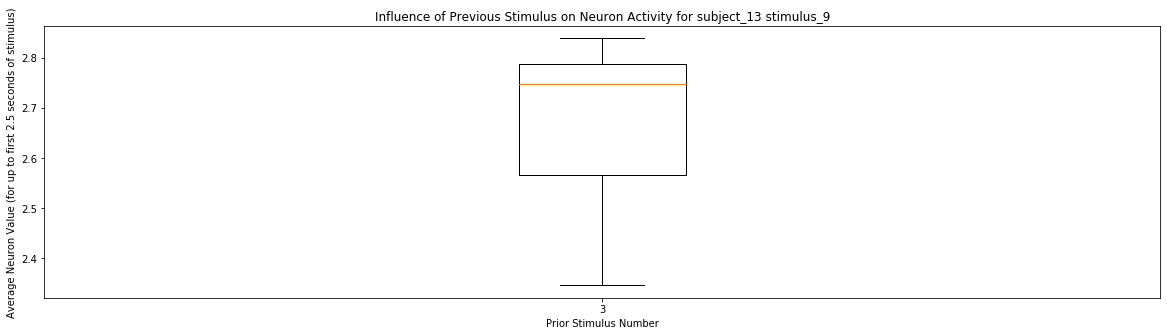

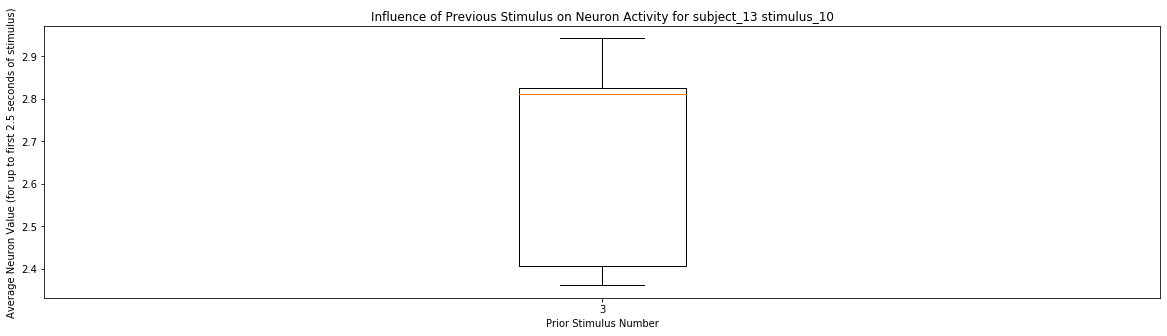

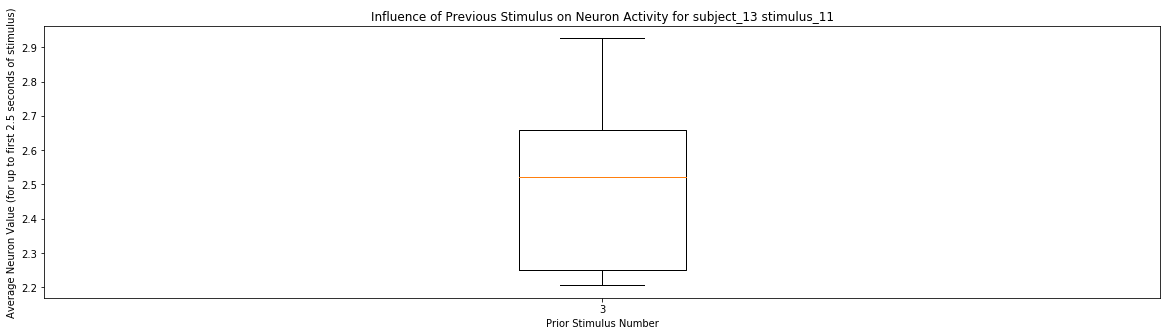

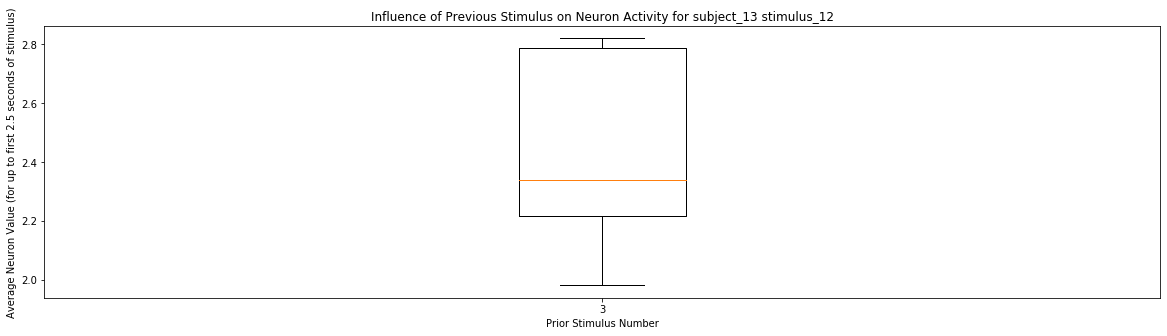

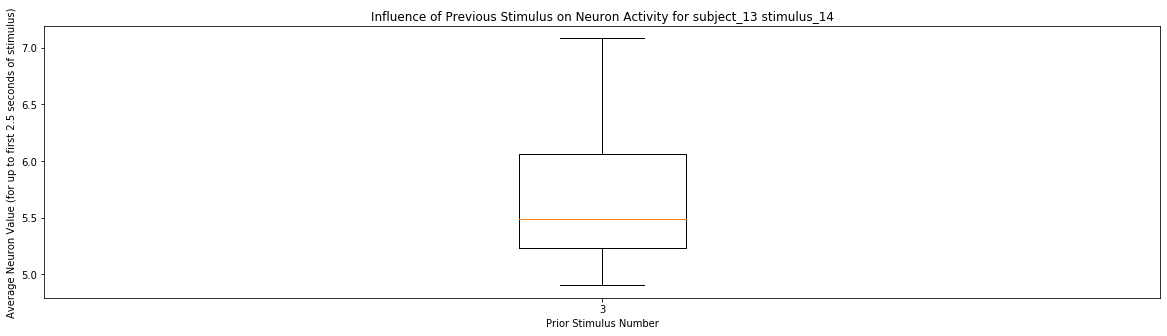

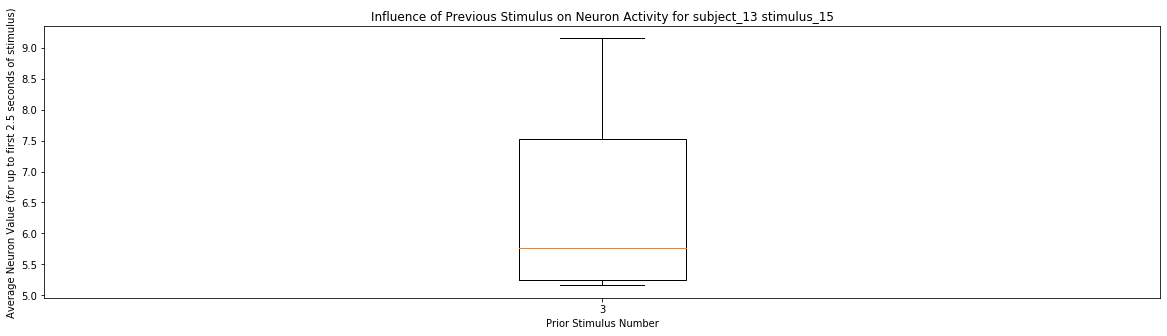

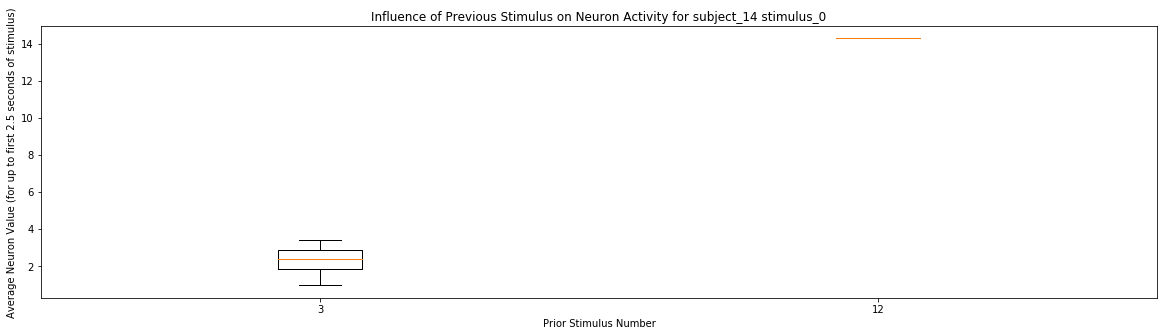

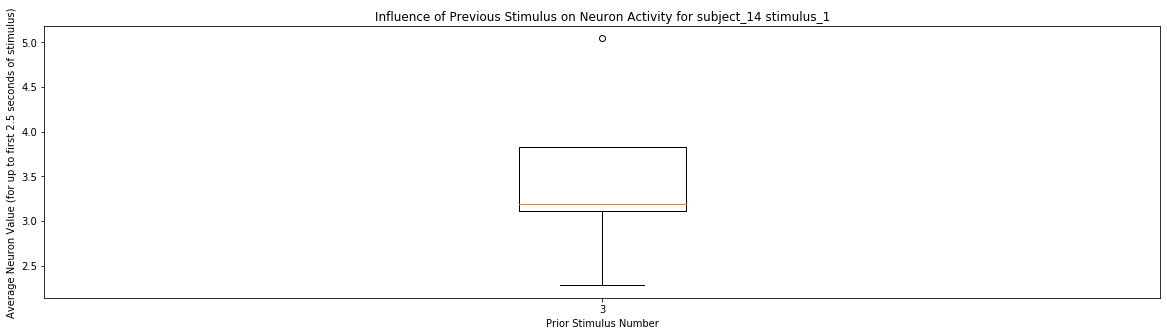

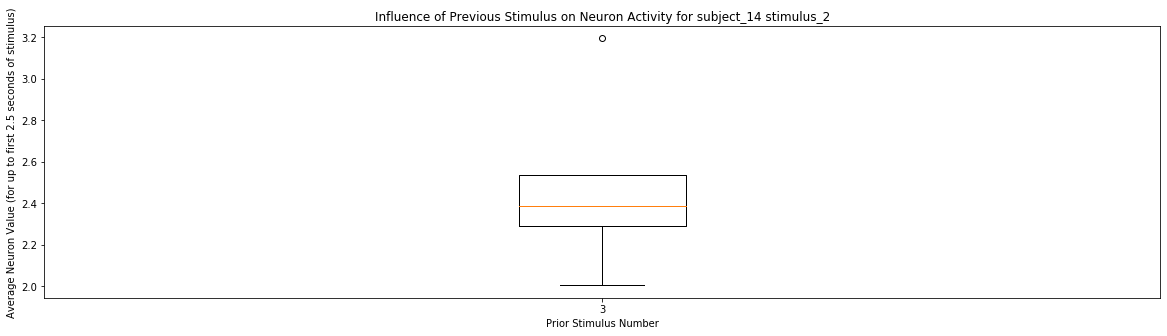

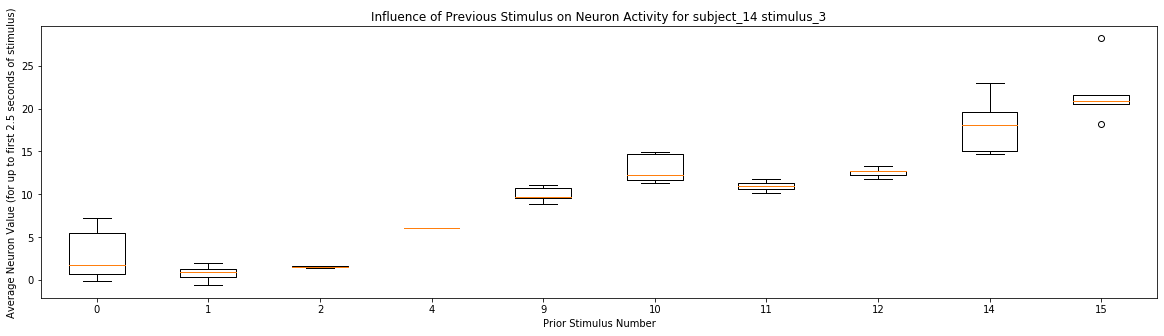

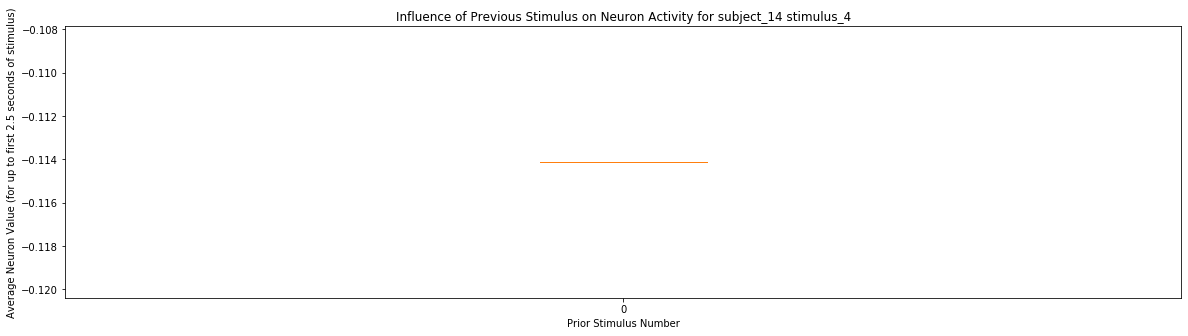

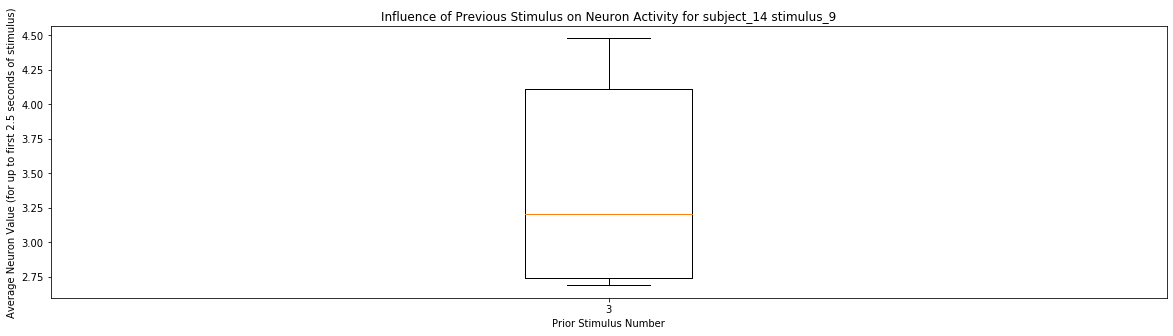

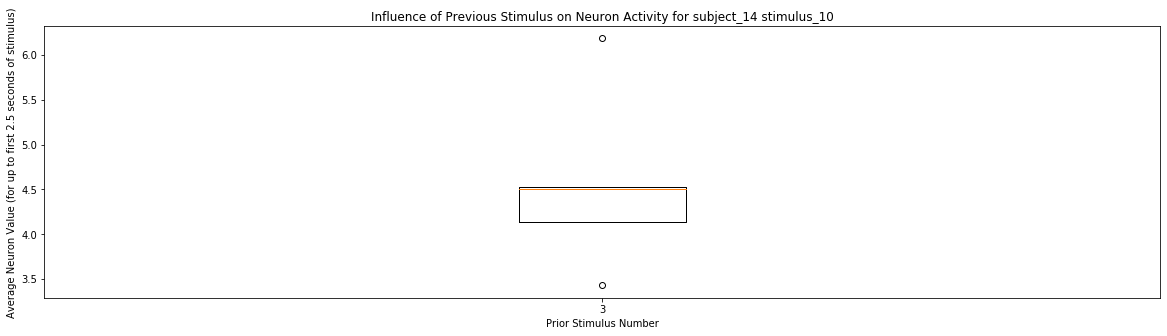

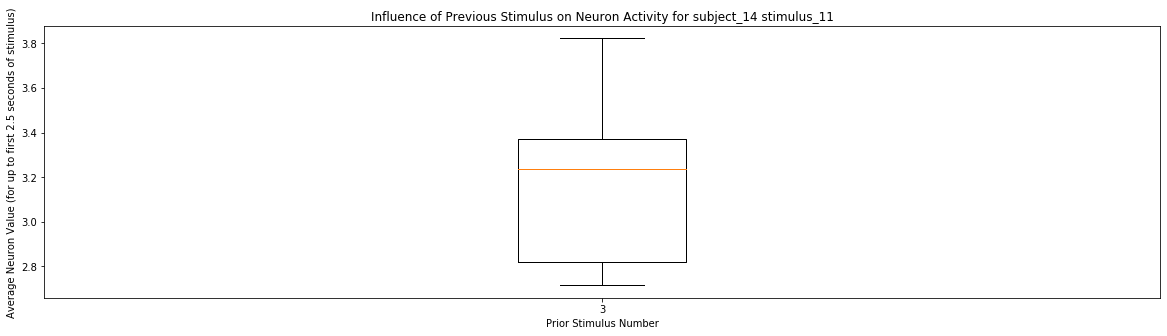

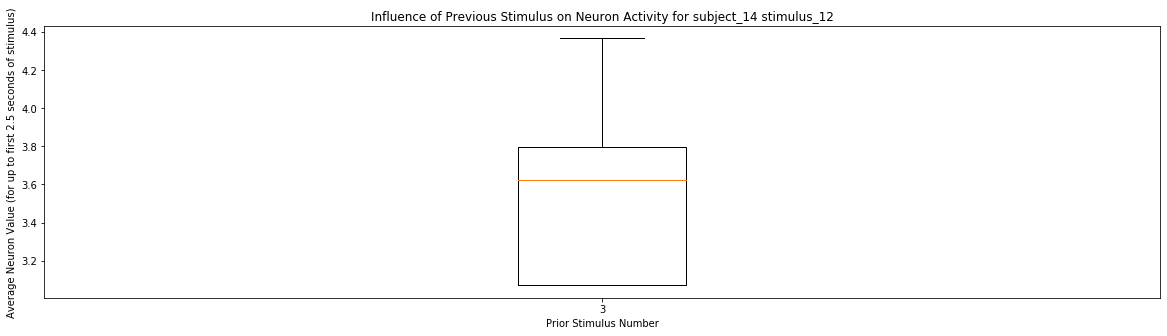

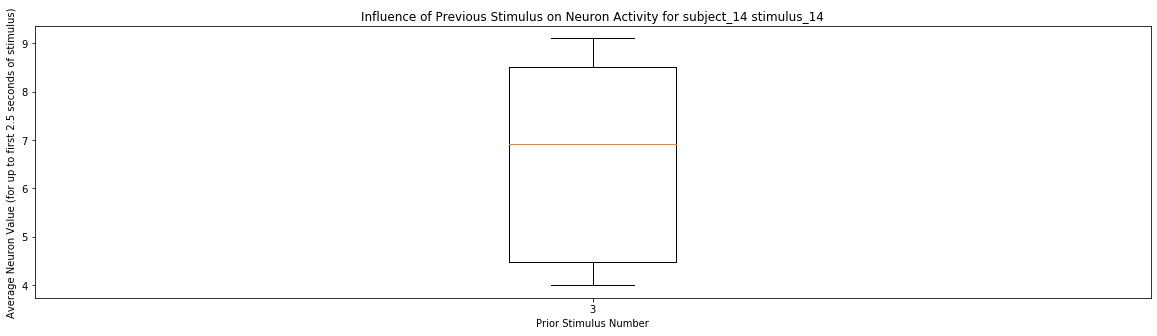

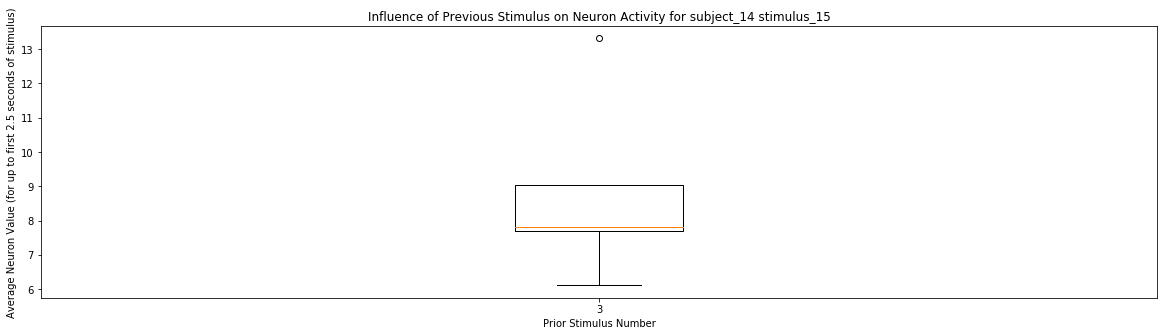

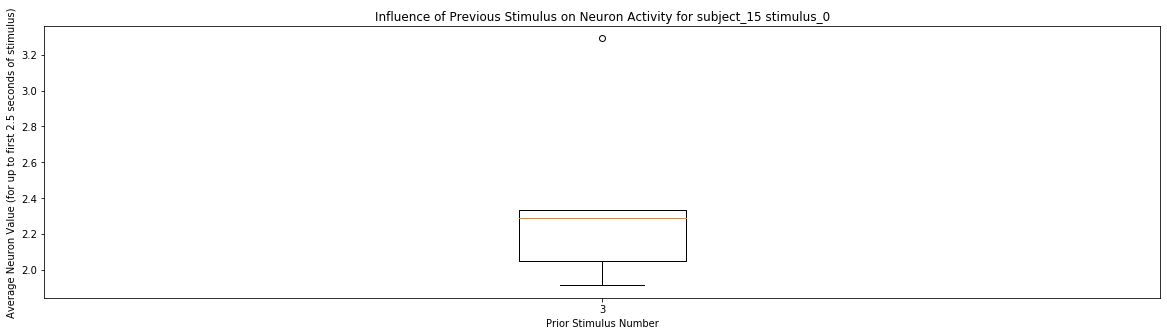

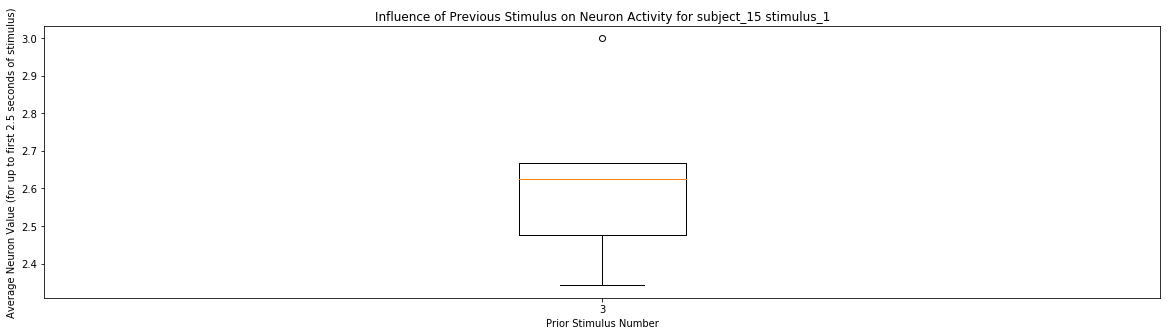

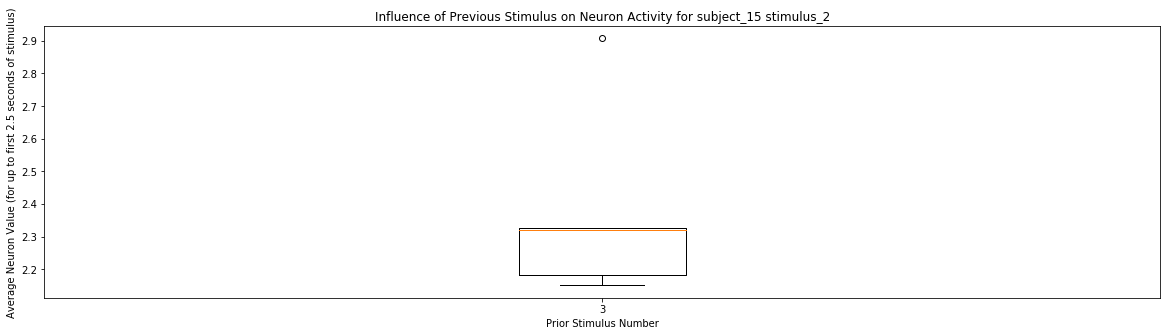

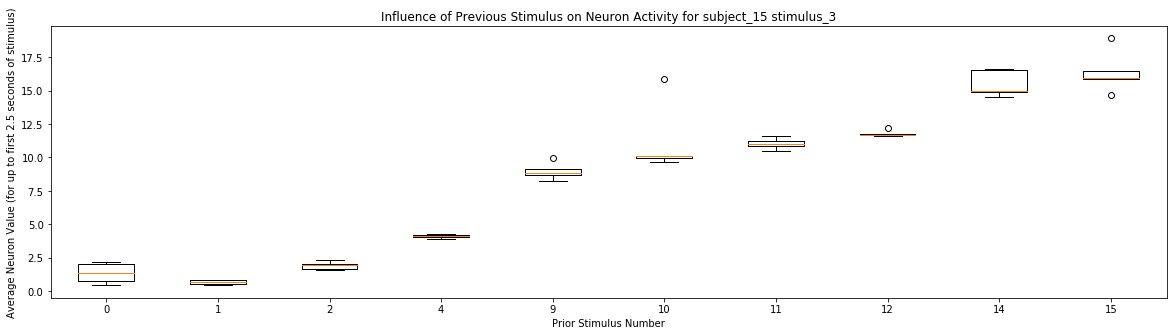

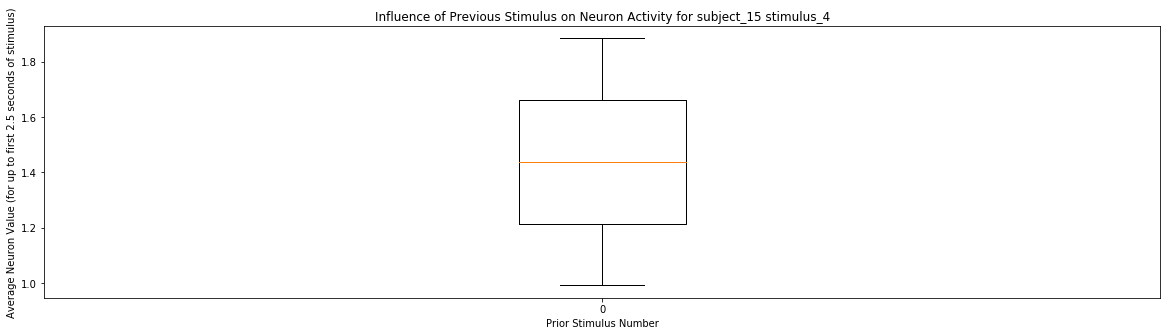

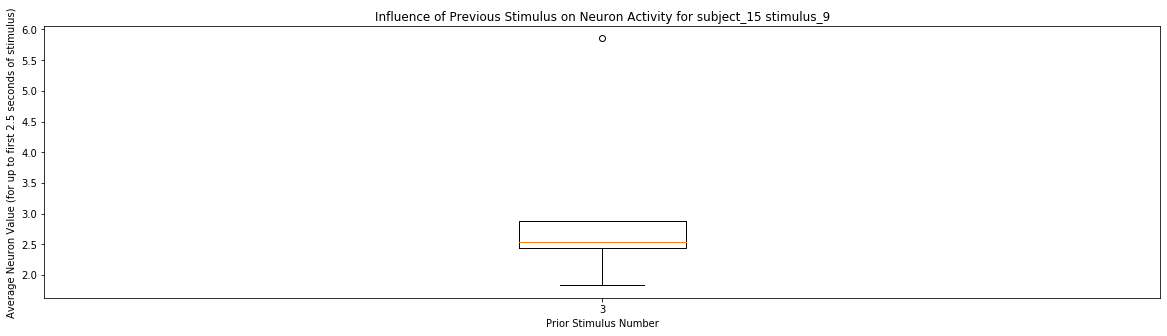

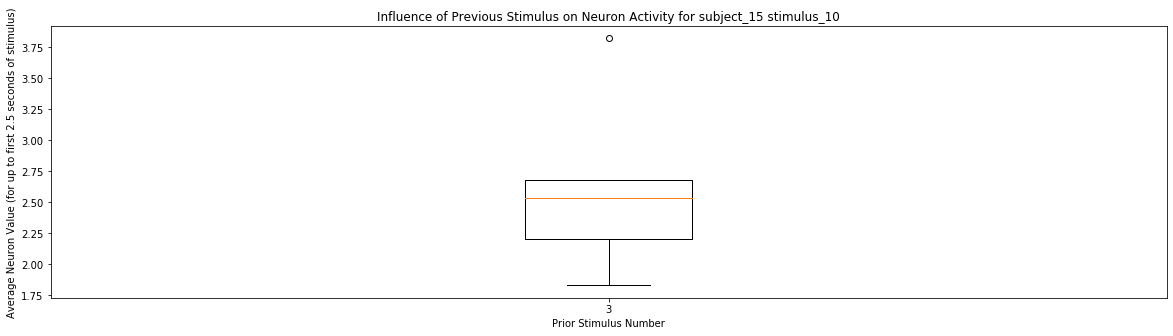

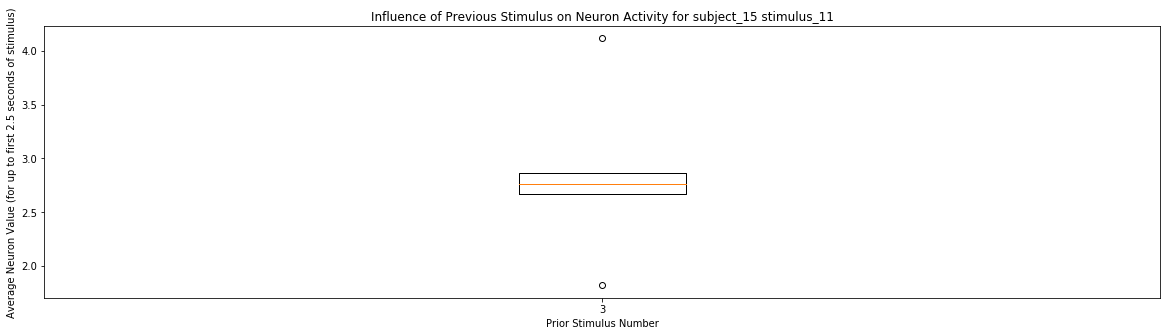

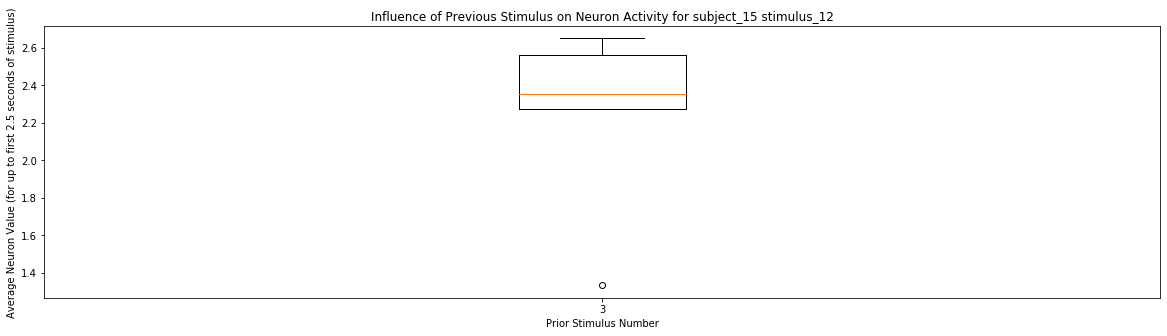

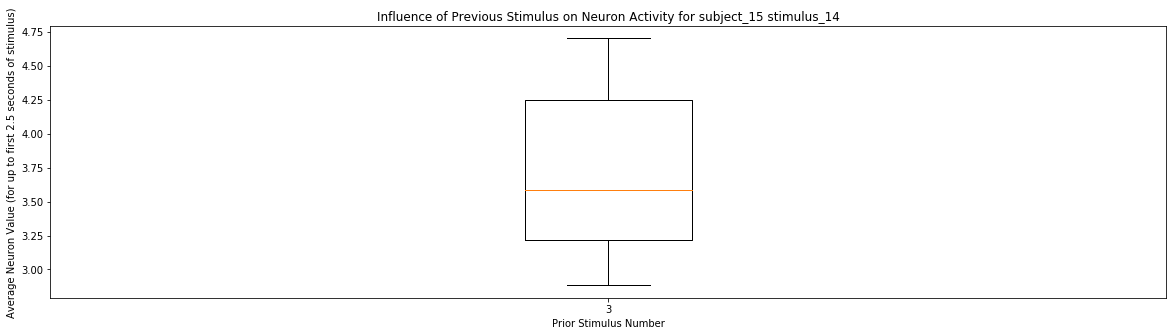

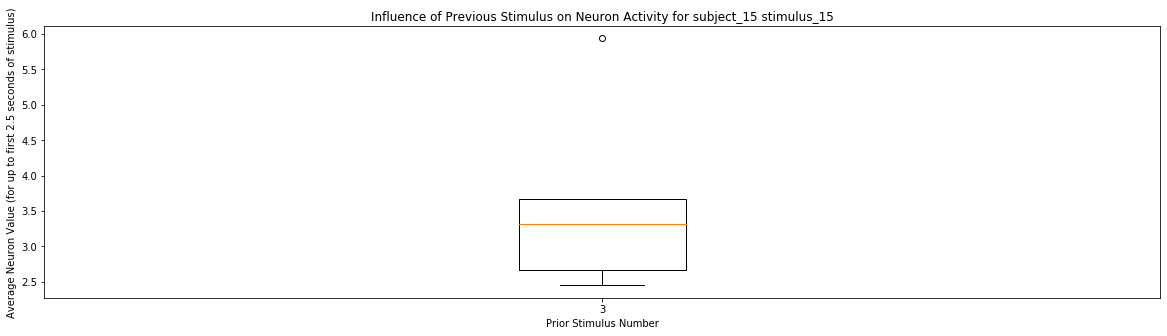

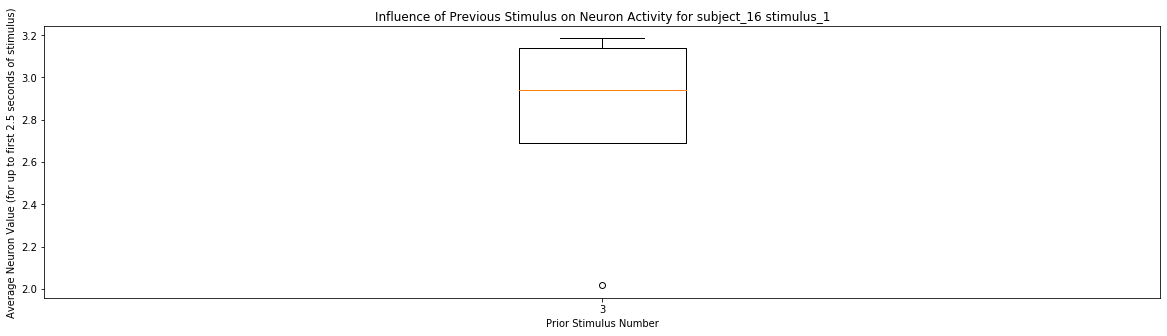

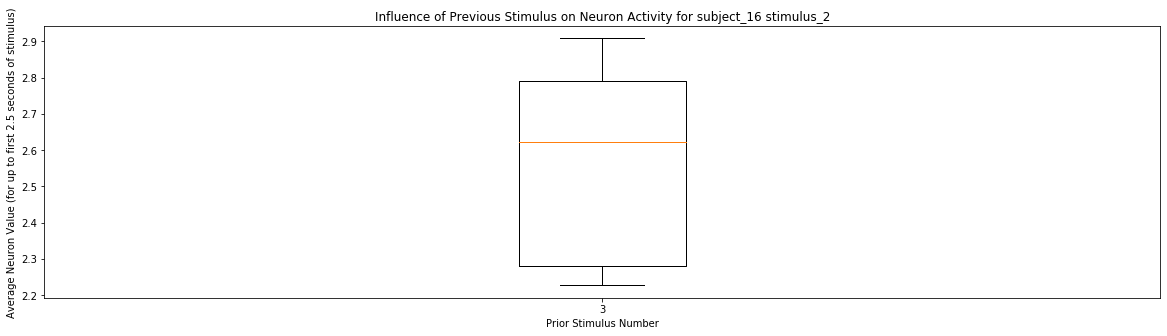

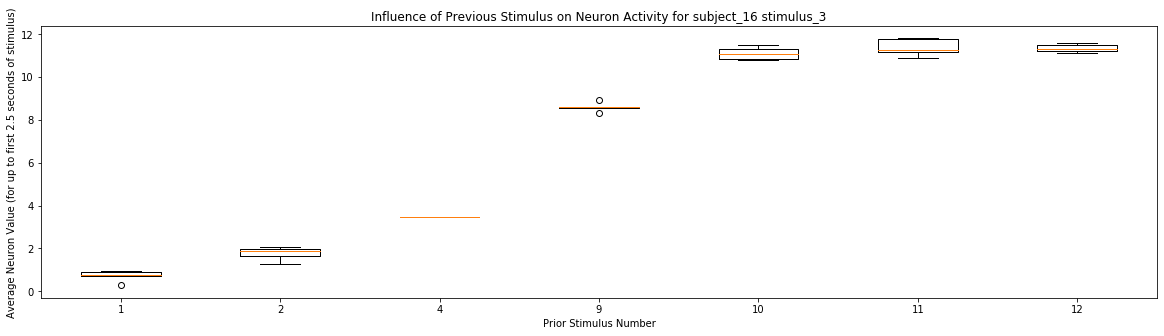

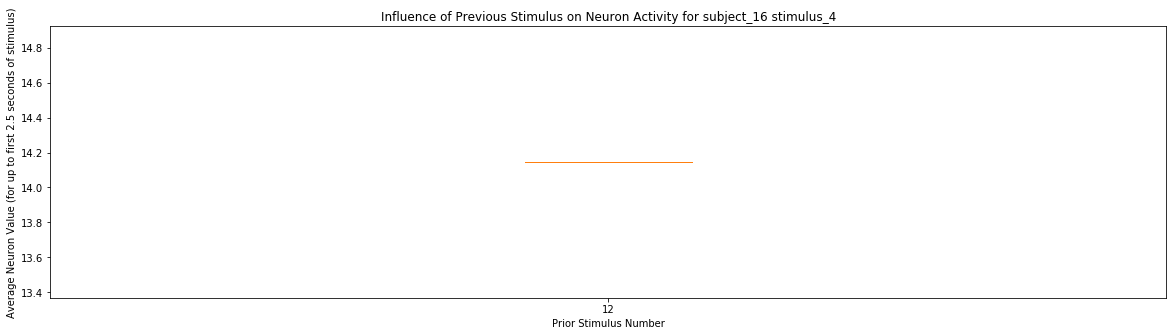

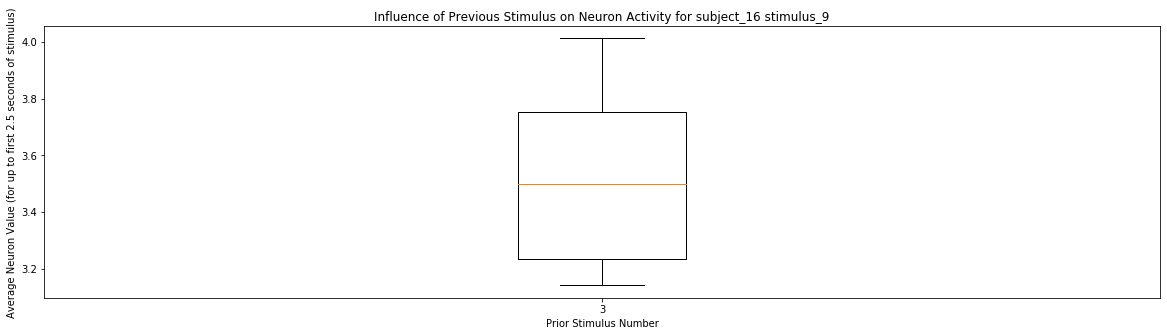

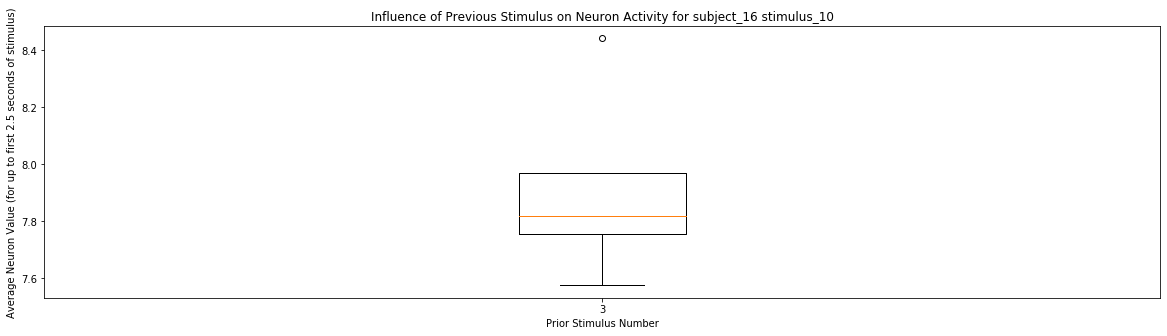

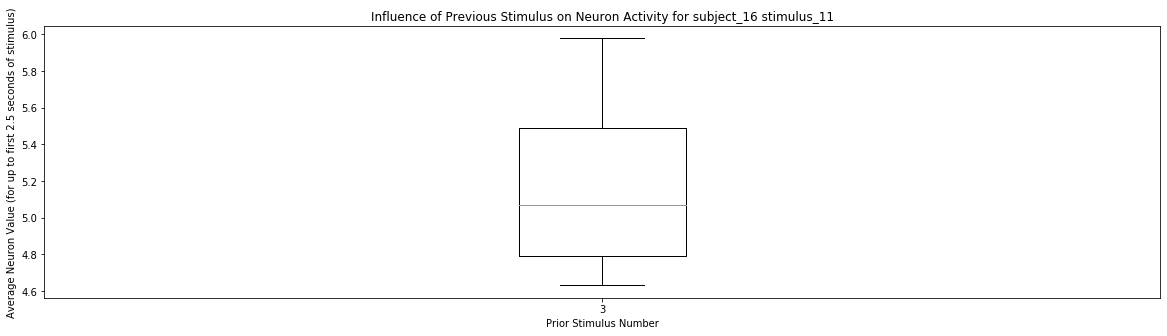

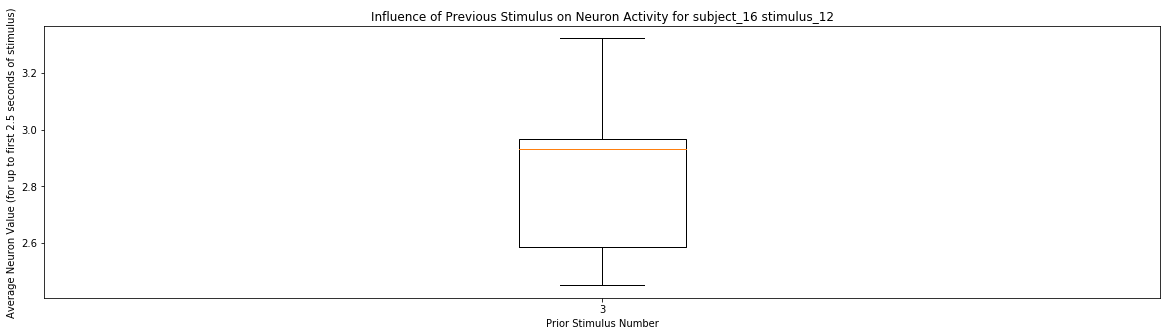

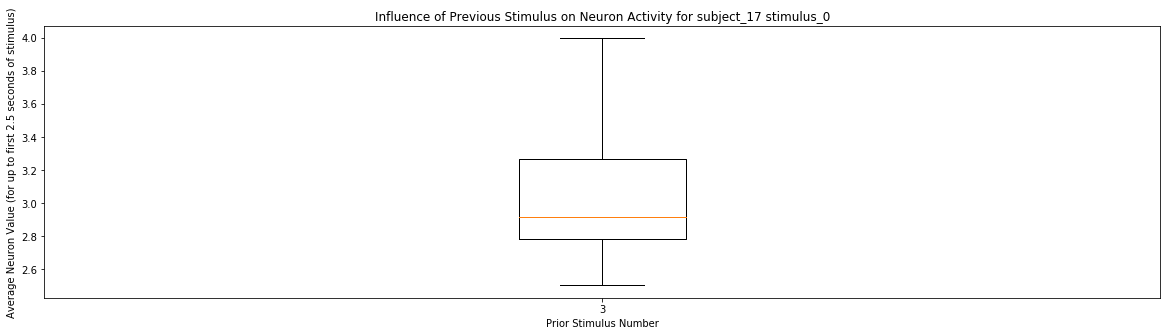

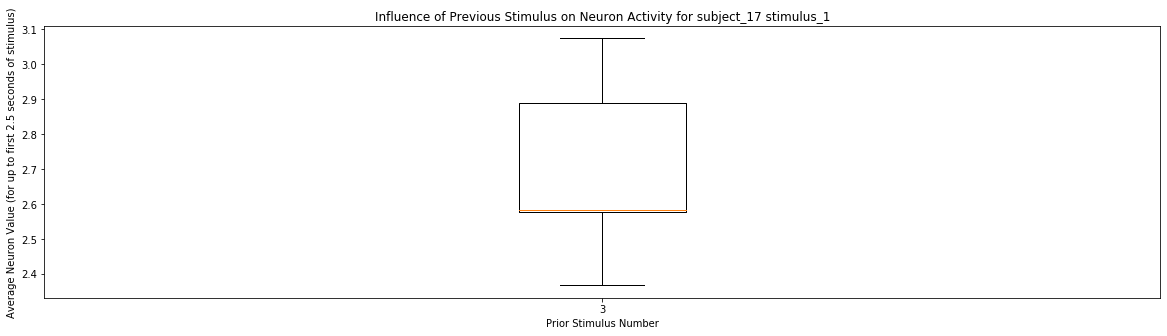

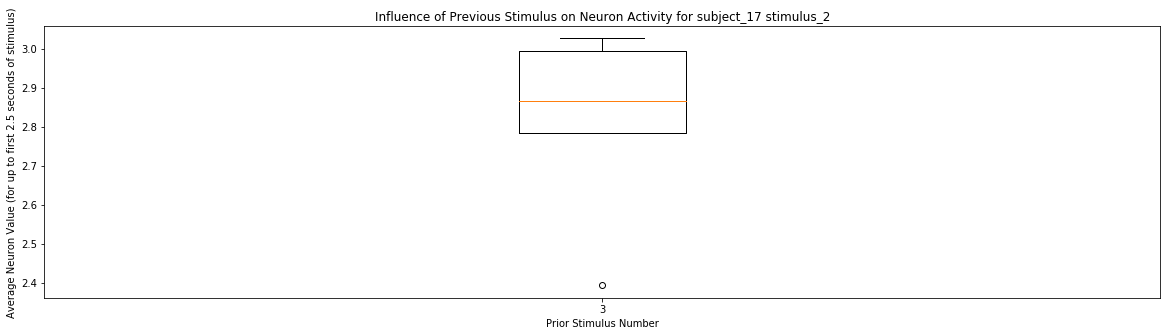

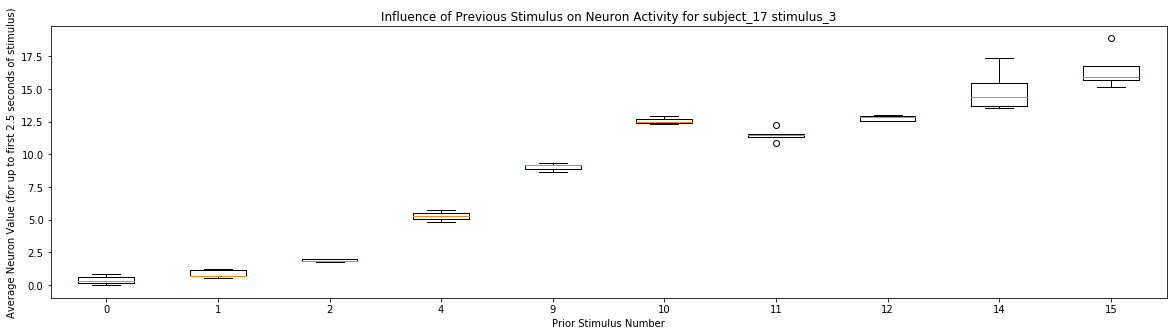

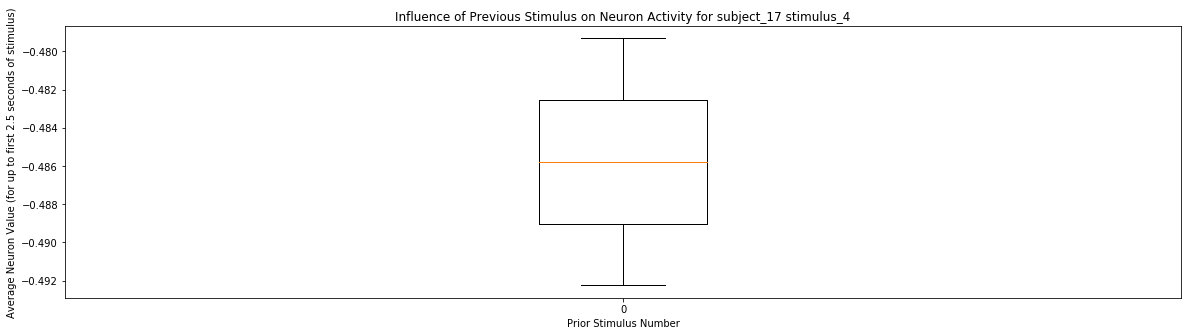

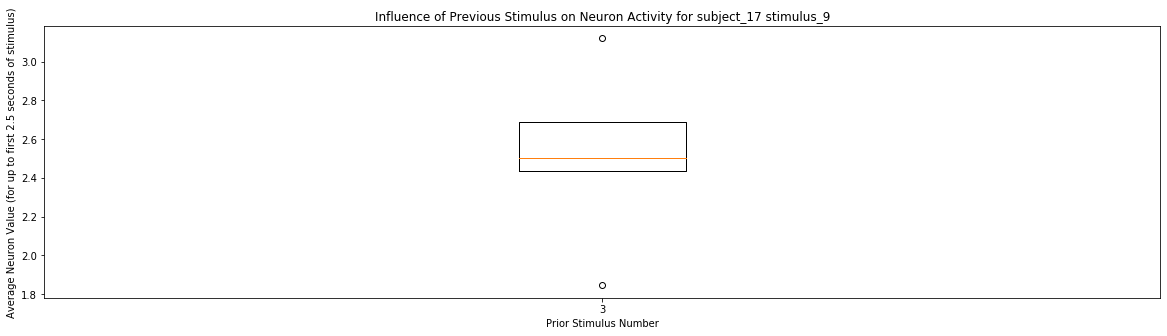

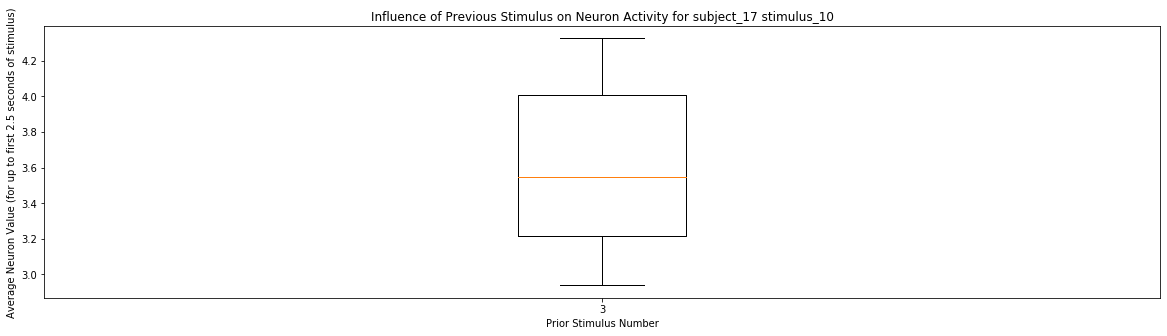

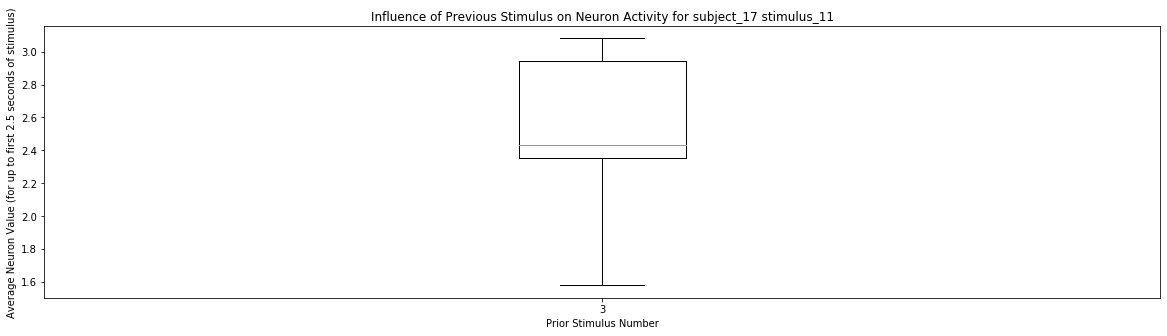

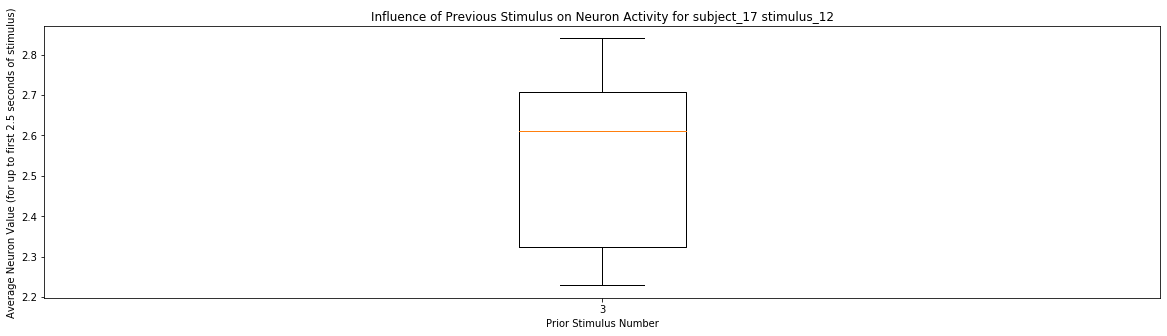

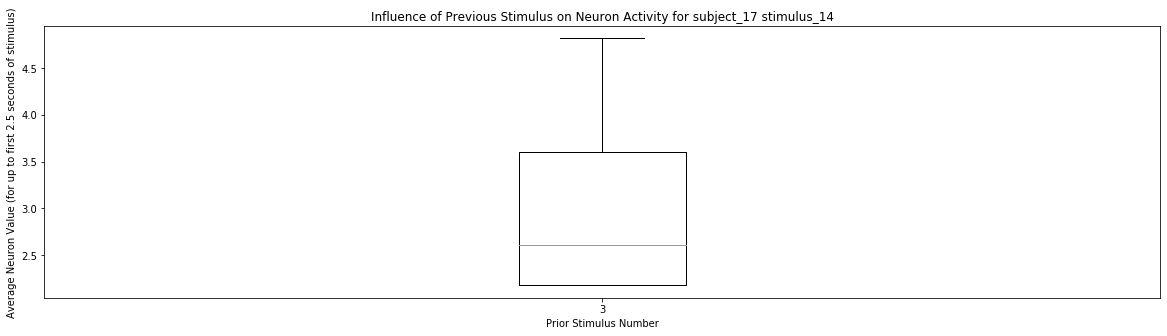

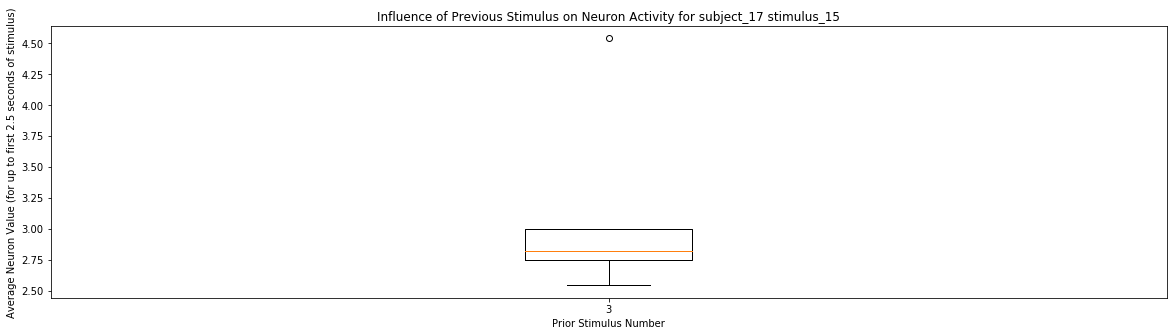

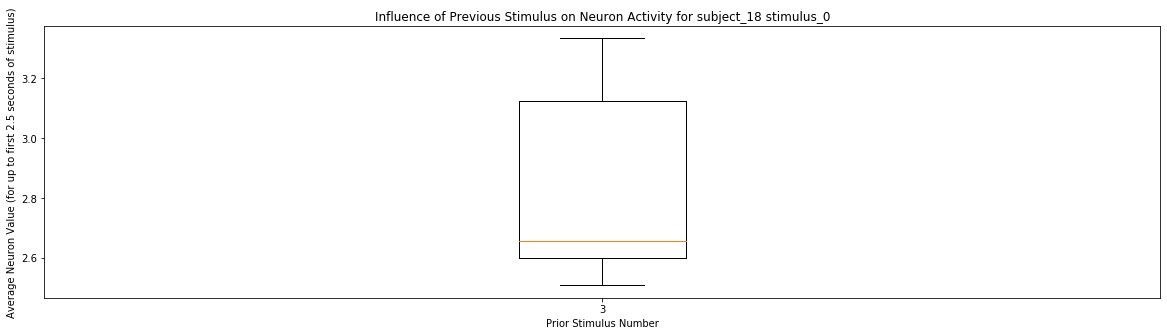

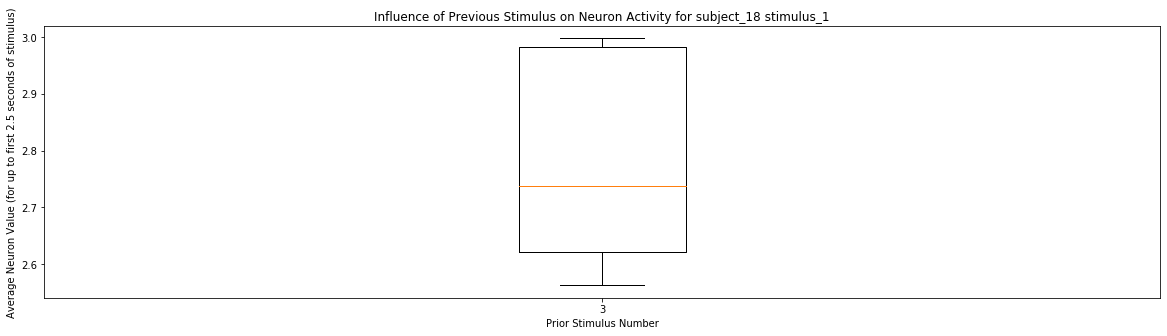

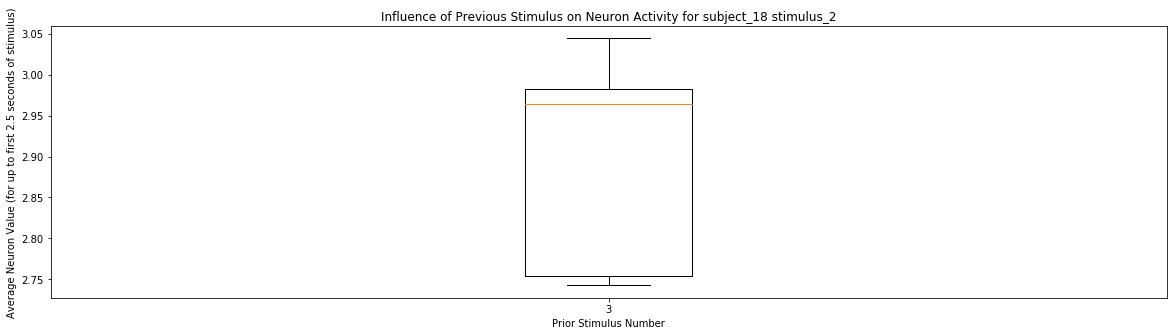

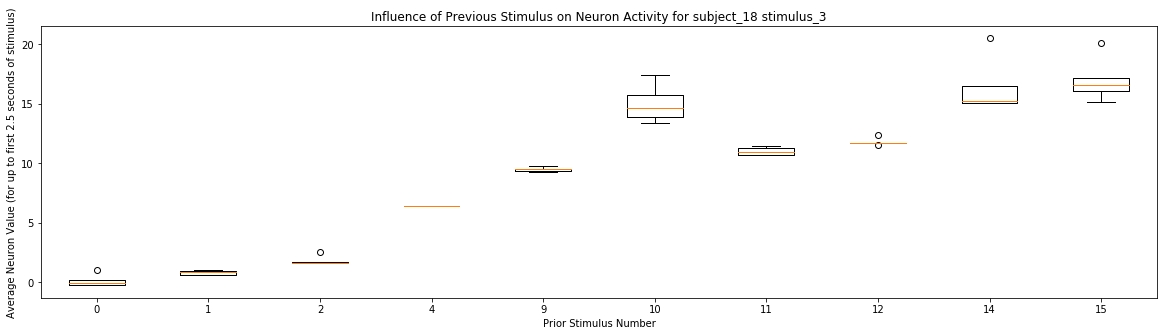

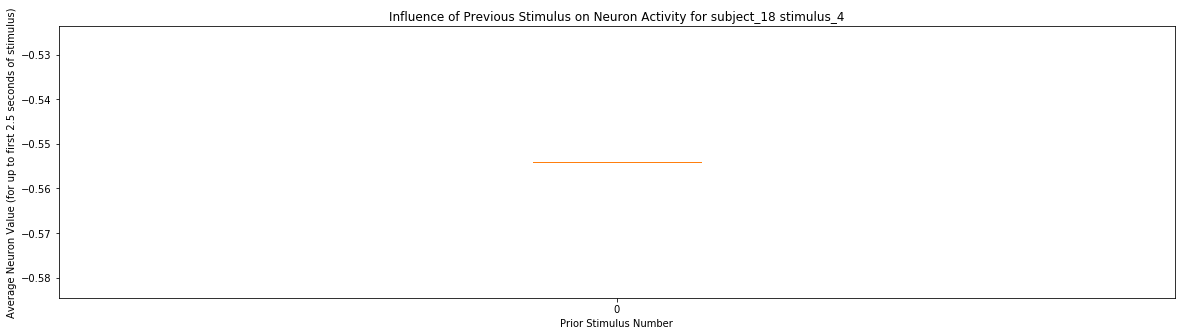

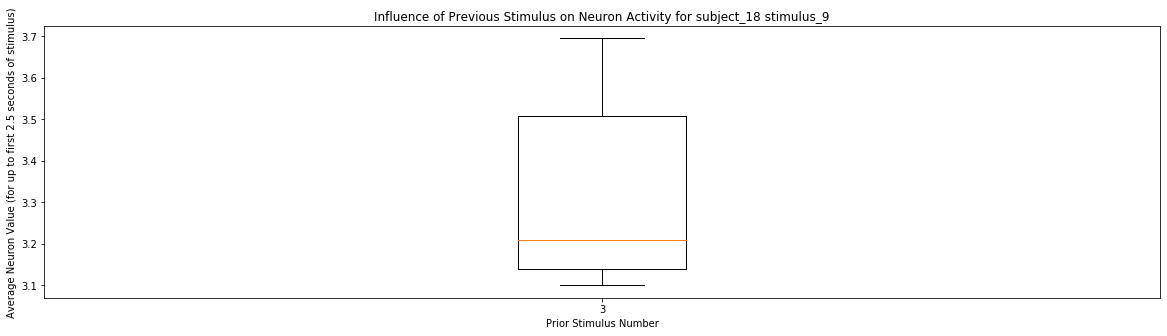

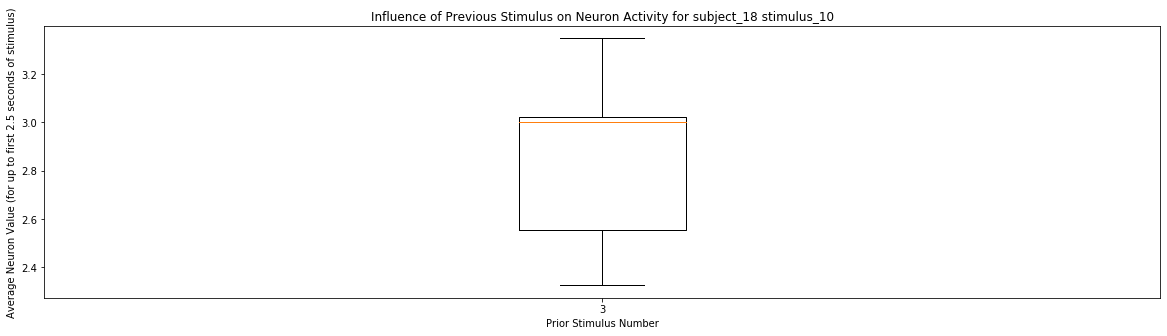

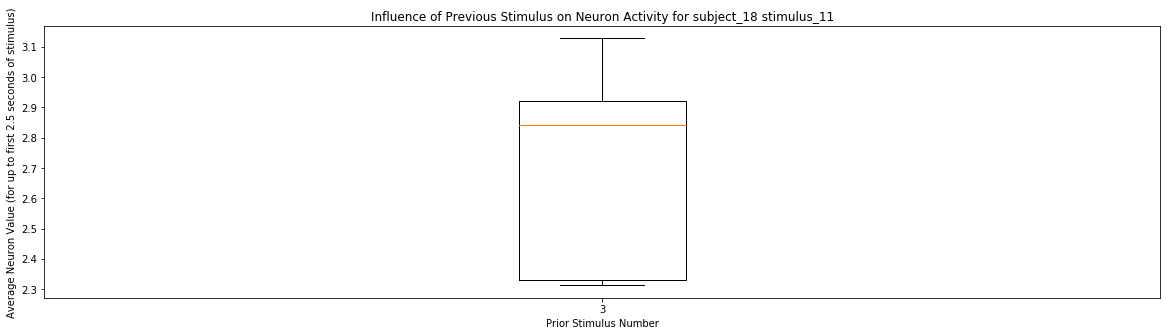

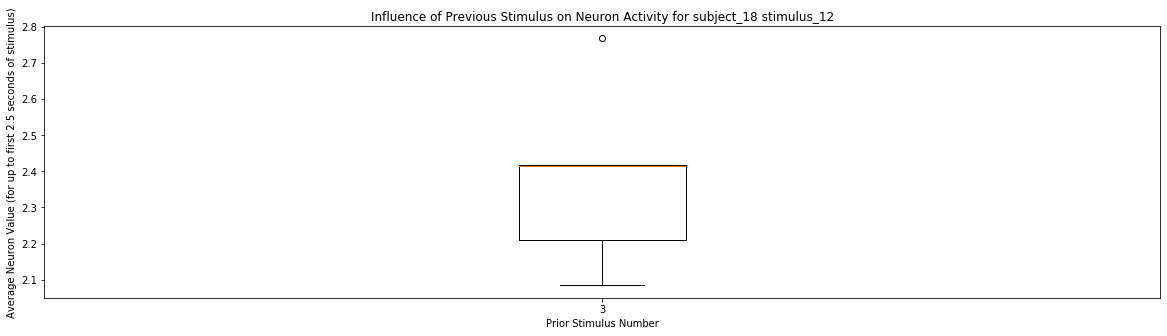

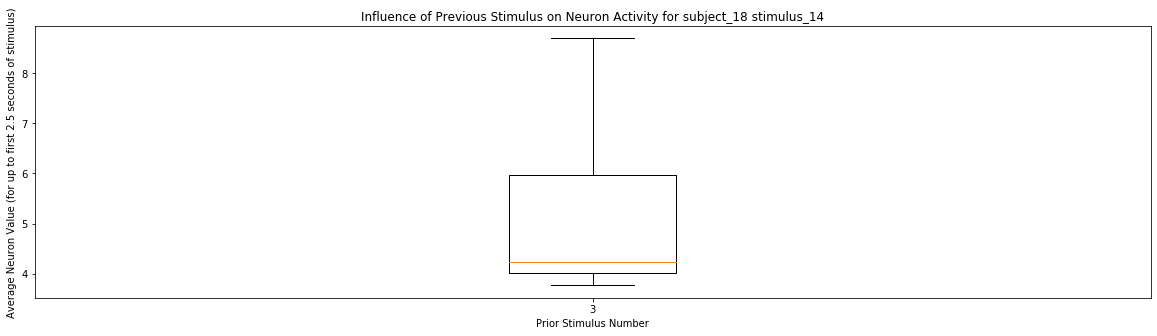

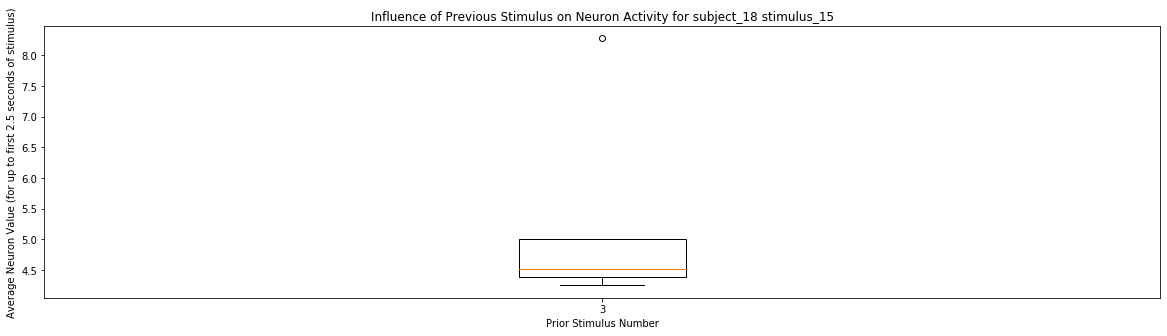

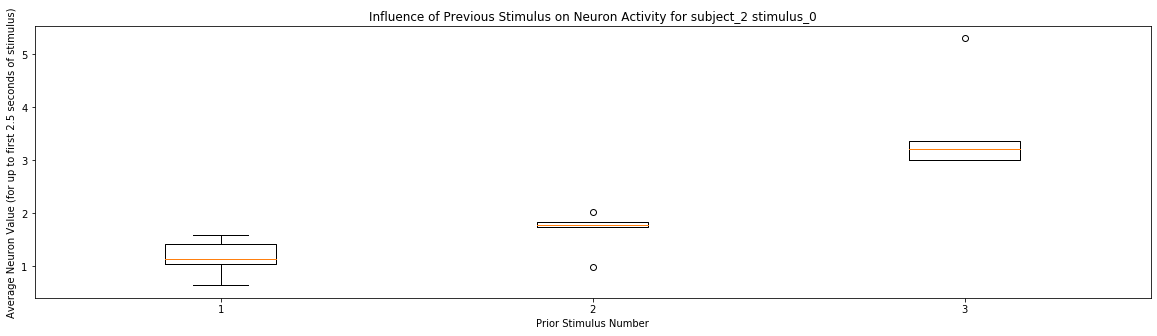

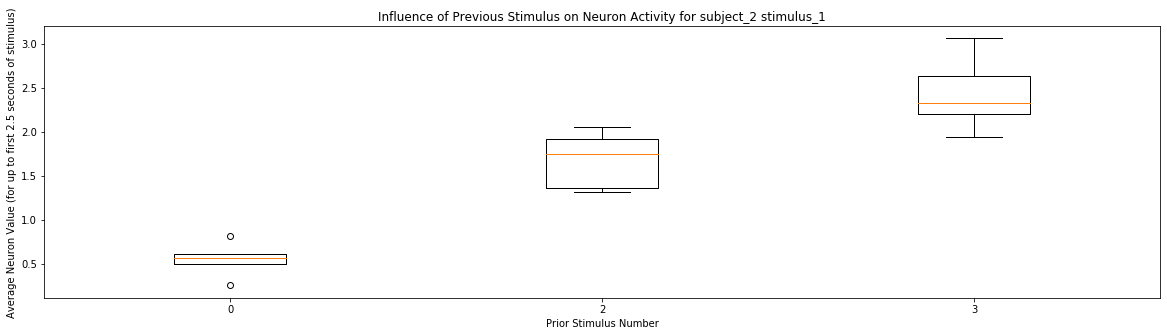

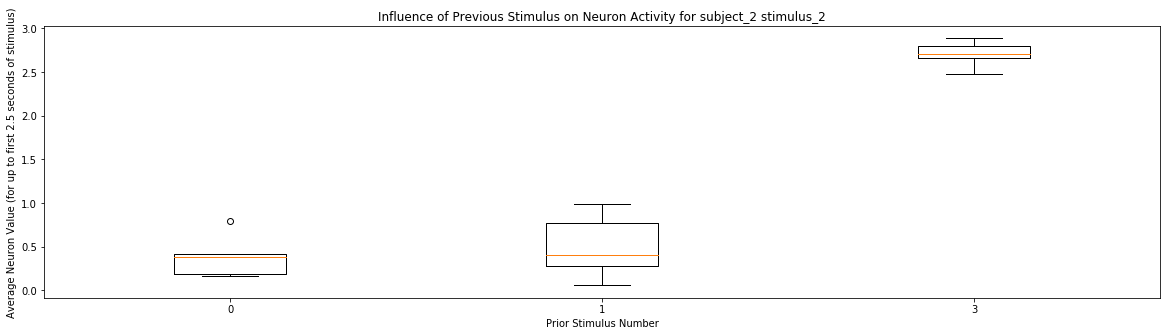

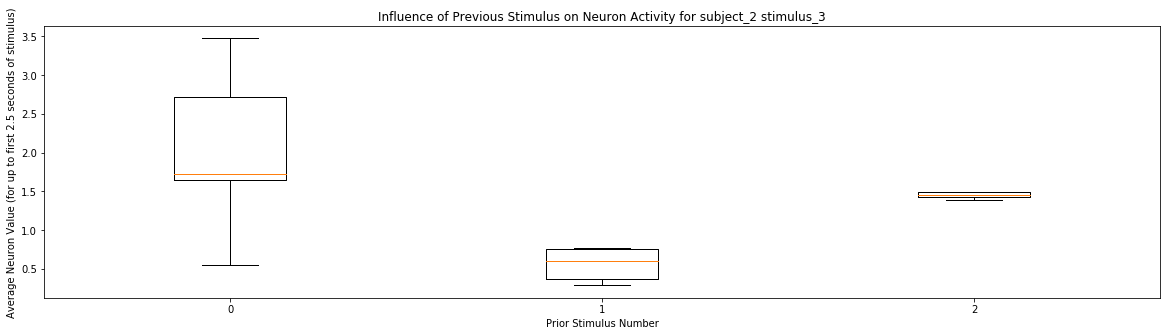

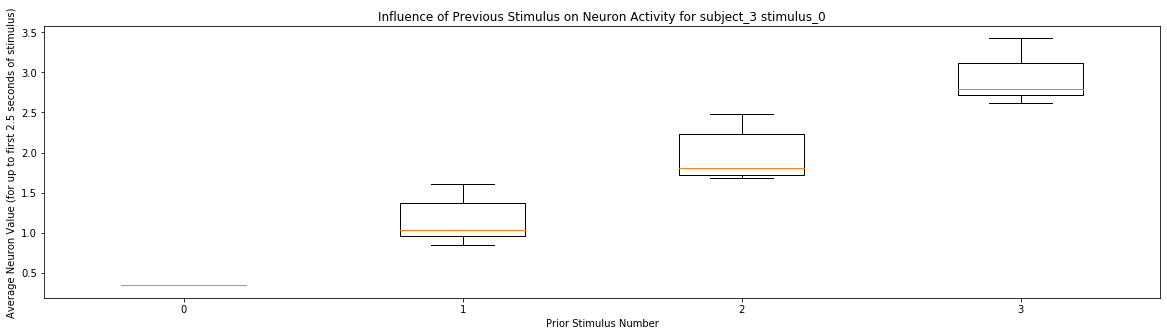

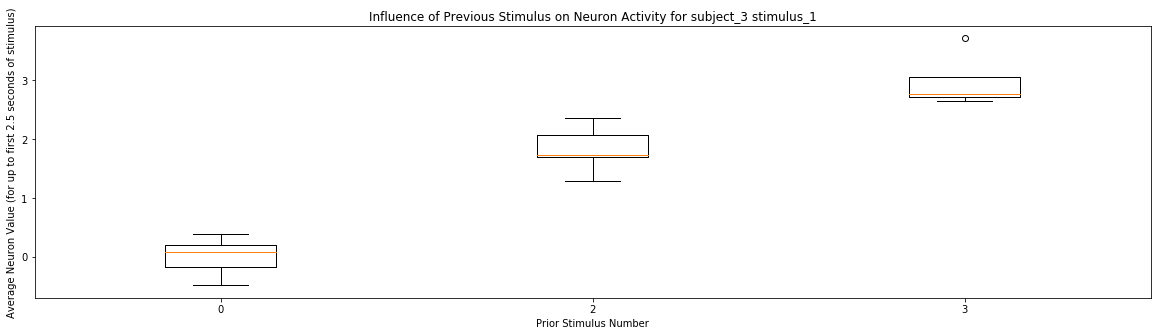

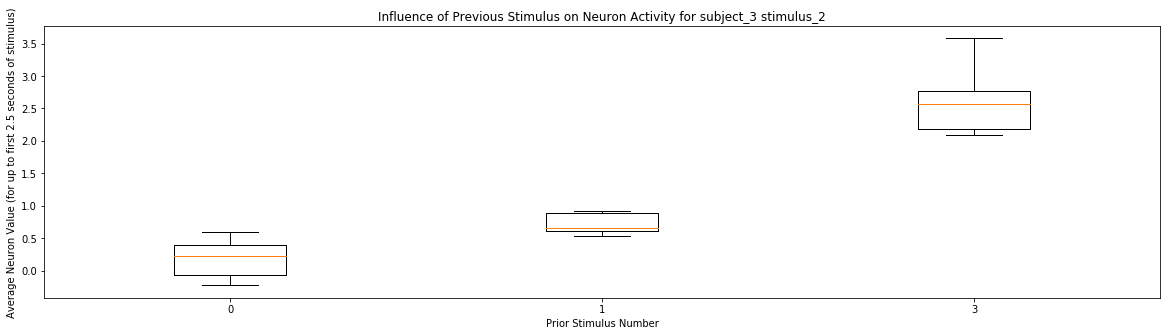

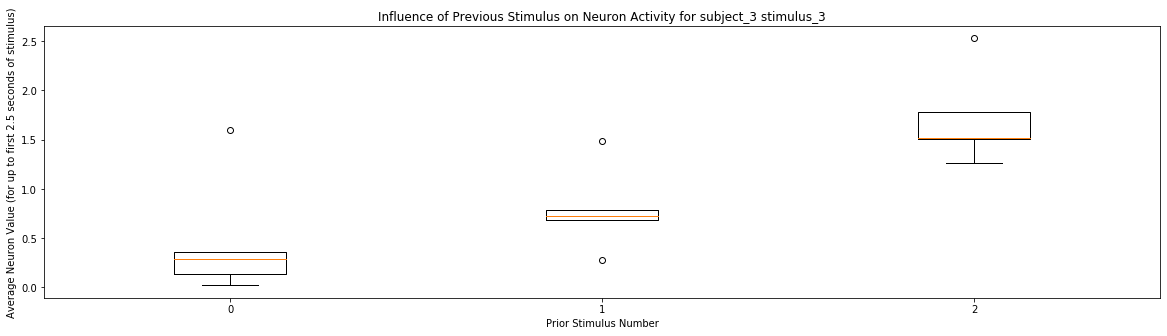

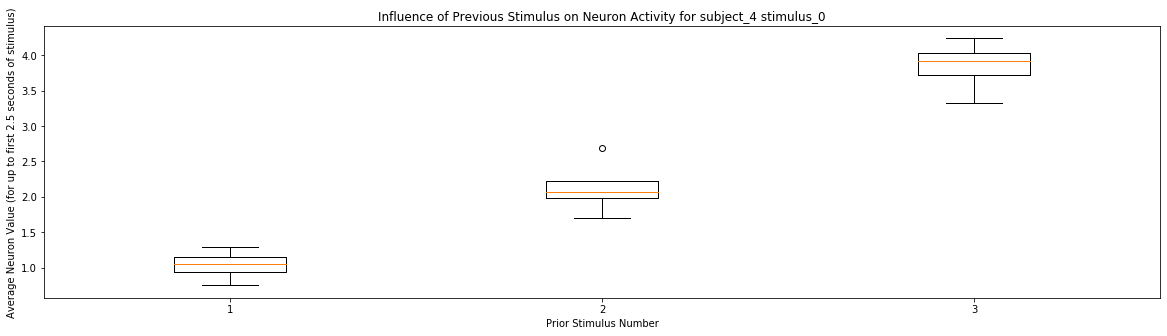

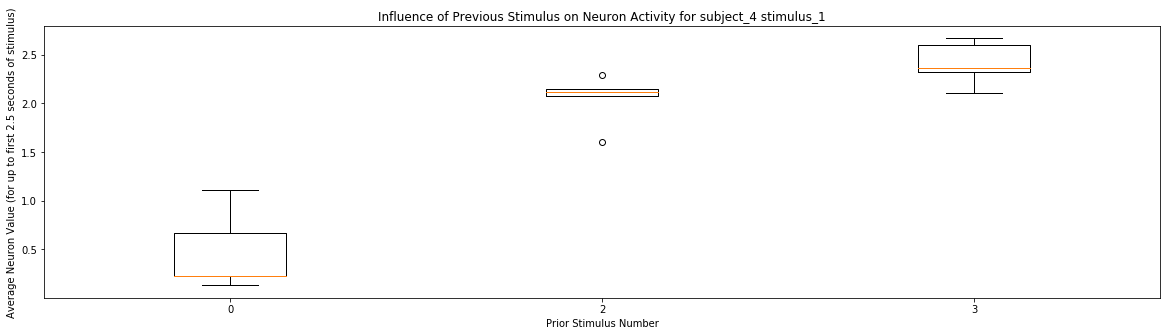

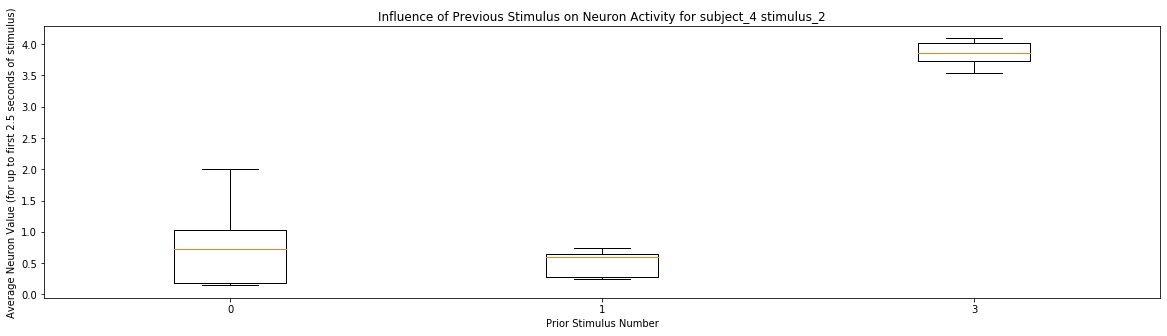

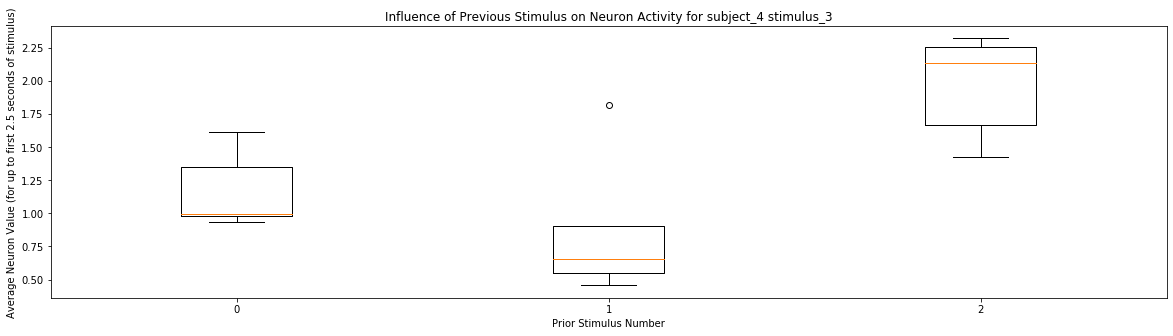

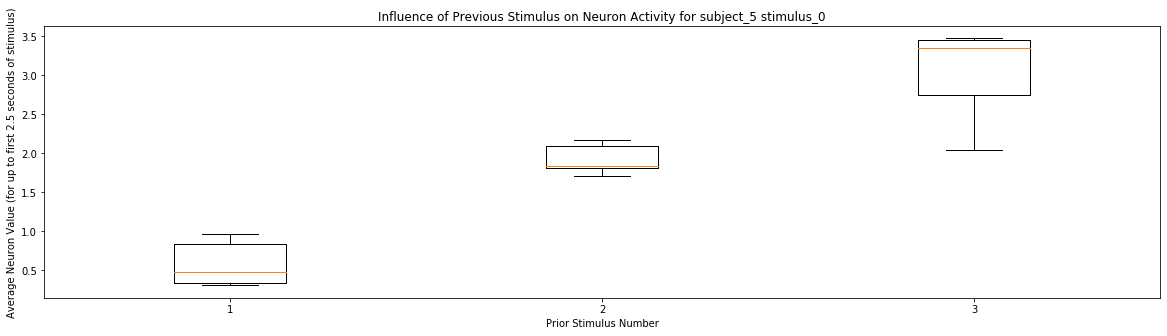

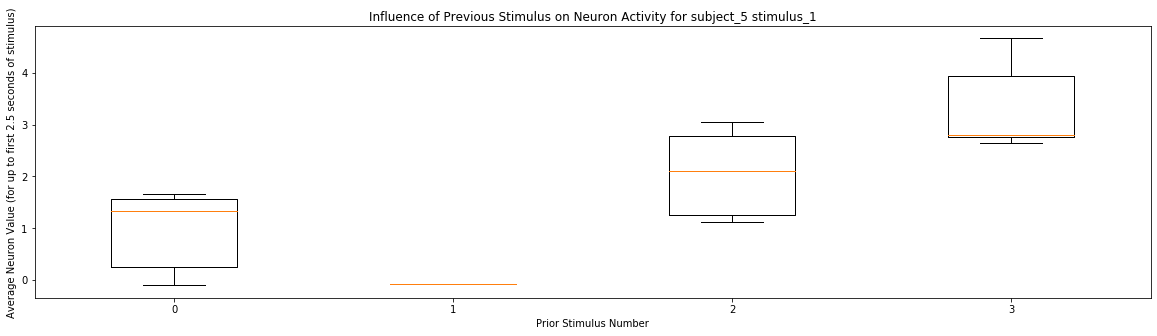

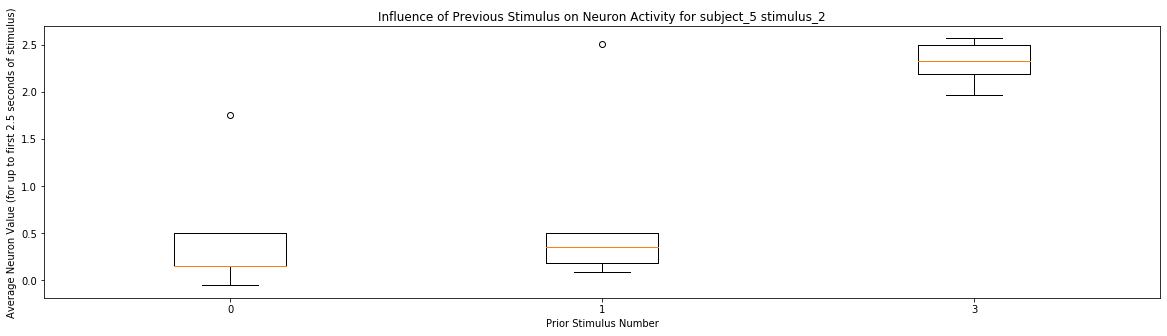

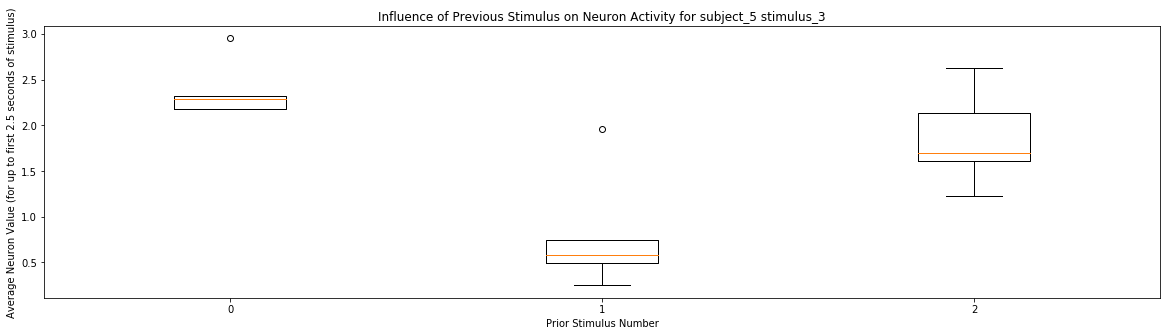

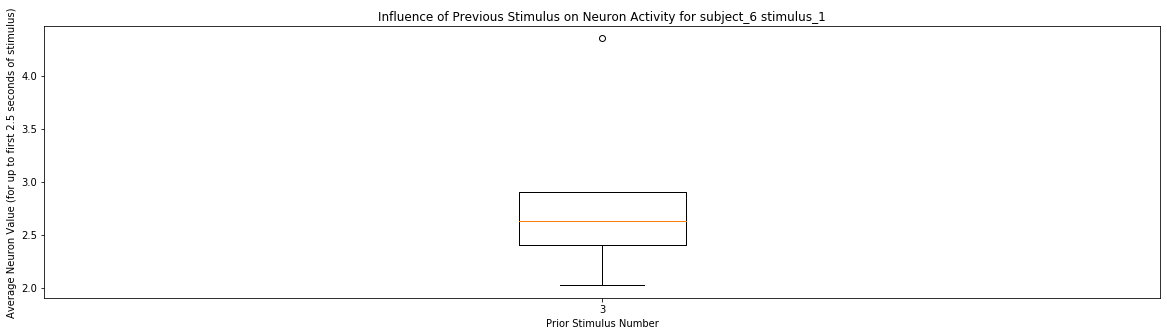

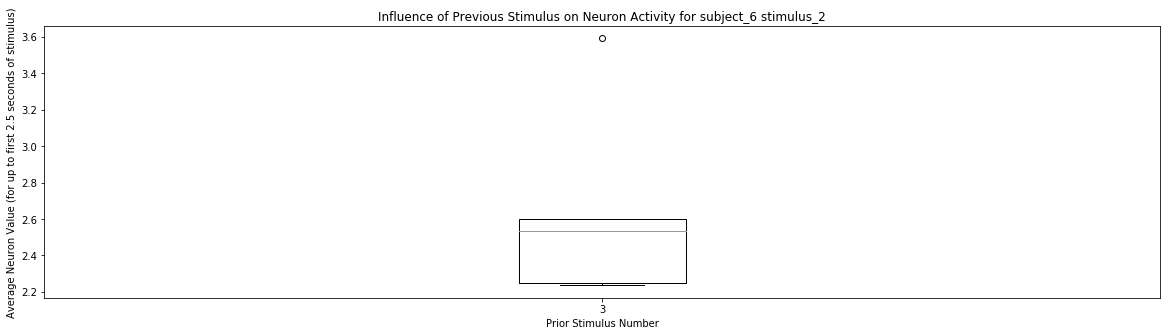

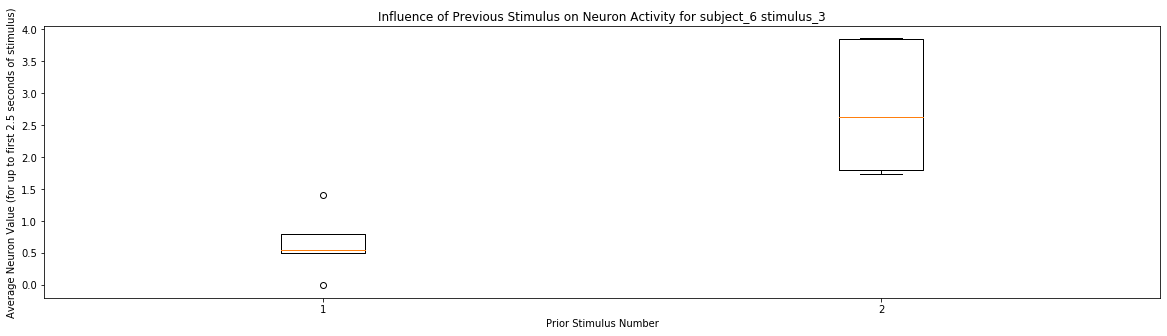

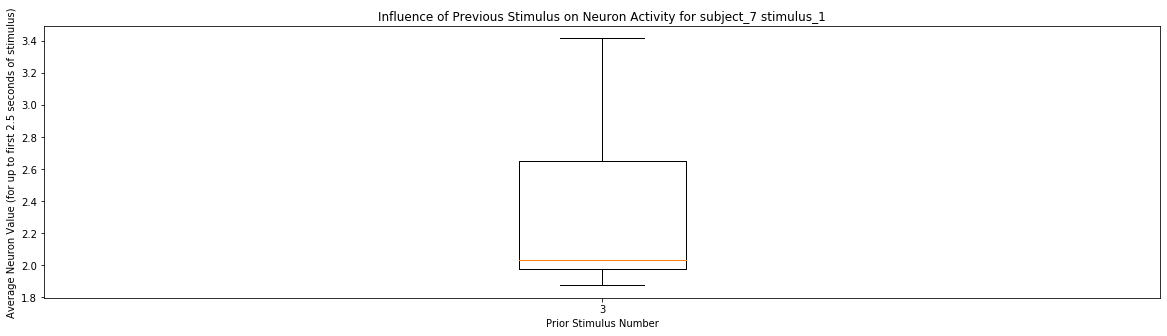

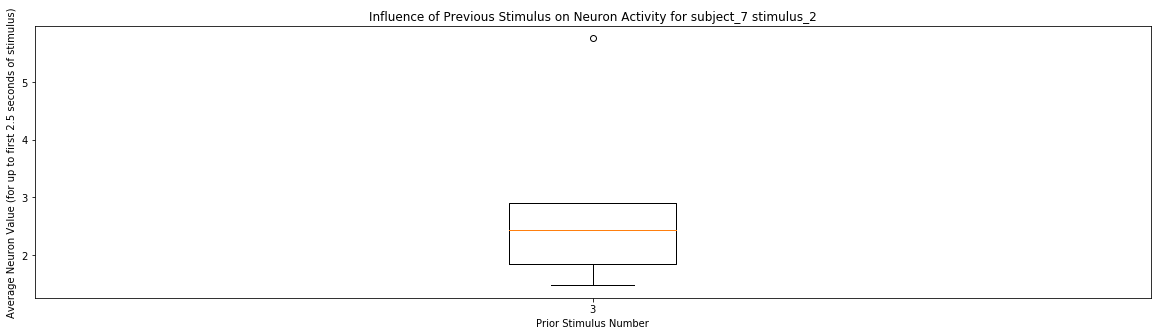

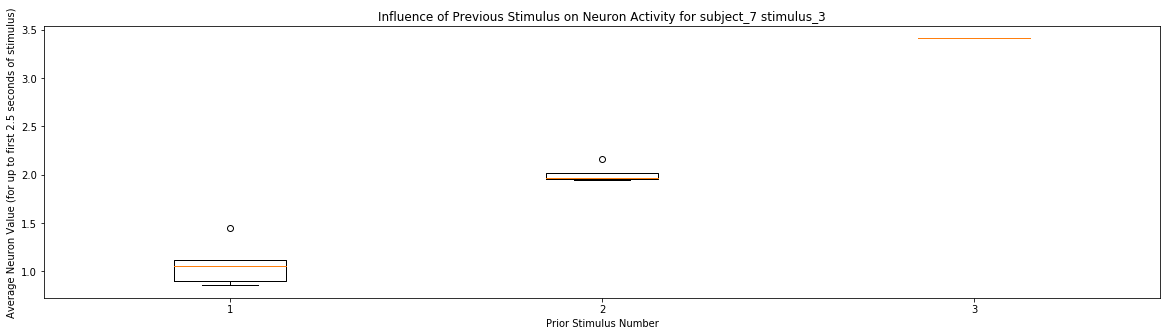

In [14]:
for stim in prev_stim_data:
    plot_prev_stim_data(stim['subject'], stim['stimulus'], stim['data'], stim['labels'])